<h1>DELE CA2</h1>
<h4>Names: Isaac Low Zu Le, Jonas Suah Siang Yu<h4>
<h4>Class: DAAA/FT/2A/03</h4>

<hr>
<h2>Step 1 Background Research</h2>

The original concept of a GAN was first introduced in the paper Generative Adversarial Networks by Ian Goodfellow in 2014. The key concept behind the GAN is to have two different networks, a generator and a discriminator, be pitted against each other to try and improve each other. Below are the functions of the generator and the discriminator.
<br>
<br>
####Components of a GAN
Generator: To try and generate fake data samples from random noise
<br>
Discriminator: try to distinguish wether the samples presented to it are real(from the dataset) or false(from the generator)
<br>
<br>
the formula for the Gan is givven as:
<br>
<br>
$$
\min_G \max_D V (D, G) = \mathbb{E}_{x \sim p_{\text{data}}(x)} [\log D(x)] + \mathbb{E}_{z \sim p_z(z)} [\log(1 - D(G(z)))]
$$
<br>
<br>
####Challenges of the gan and improvements:
<br>
<br>
1) Training instability: GANs suffer from training instability as the adverserial process is unstable and sensitive to collaspe
<br>
2) Mode collapse: the generator may only produce a certain type of data, causing modes in the data distribution
<br>
3) Evaluation metrics: It is hard to use evaluation metrics for quantifying the goodness of the generated images as it is very subjective wether the generated image is good or not.
<br>
<br>

####Different types of GANs
1. Vanilla GAN - the ooriginal Gan, consists of a simple generator and discriminator that are trained simultaneously in a two player minimax game
2. Deep Convolutional GAN (DCGAN)  - an improvement on the Vanilla GAN and the one shown in the lab. introduces convolutional and deconvolutional layers in the GAN to leverage spatial structures in the data
3. Conditional GAN (cGAN) - a GAN that takes in class labels on top of image data, which allows the GAN to create class specific images
4.  Wasserstein GAN (WGAN) - a GAN that aims to reduce unstable training and mode collapse by using Wasserstein distance as its loss function

<br>
<br>

####Applications of GANs
1. GANs are most popularly used for image generation, and can generate high quality images of faces, things and even artwork.
2. Text to image synthesis GANs can create images based on text inputs
3. Data augmentation GANs can also create extra data to augment datasets for machine learning tasks

<br>
<br>

####Current trends and future directions
GAN variations like styleGAN and BigGan are still state of the art whenn it comes to image generation and GANs are still used at a large scale to generate images andd other tasks. However, other generative frameworks are gaining in popularity and the most popular image image generation softwares use other arcchitechtures. An example would be DALL-E which uses a transformer architechture.

<br>
<br>

####Conclusion
GANs have revolutionised the field of generative modelling, and is an indespensible tool in creating new data samples. Despite its shortcomings, new research into the field of GANs continues to improve its performance in terms of stability, diversity and applicability.




###Backgound on the EMINST Dataset
The eminst dataset is an extention of the original MINST dataset and it contains a collection of hand written alphabets<br>
the images are in a 28x28 pixel format similar to the MINST dataset<br>
the images are more varied and contain more classes, making it moore challenging to train as compared to the originall MINST dataset.



What is a gan?
- a GAN (generative adverserial network) is a deep learning architechture that utilizes two models competeing against each other to generate new data from an training dataset. it is adverserial as it pits the two networks against each other, making them compete to produce better images.

If you are asked to generate images of a specific class, propose a way of doing it.
- one way to generate images from a specific class would be to use a cGan(a classification GAN model) that takes in label inputs on top of the images in order to generate images for a specific class. I will try this later

If you are asked to generate coloured images instead of black-and-white ones, do you think it would be easier or harder to produce better quality results?
- it would likely be harder as there are more variables at play given that there are three layers( red green and blue) to generate instead iof jjust black and white. another issue the model would have to tackle is the color consistency of the training dataset.

<hr>
<h2>Step 2: Exploratory Data Analysis and feature engineering</h2>
in this step we will focus on gaining insights into our training dataset and understand the data we are working with to train our model



In [1]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.1 MB/s eta 0:00:00


In [2]:
import os
import string
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import rotate
from scipy.linalg import sqrtm
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization, Activation, Reshape, UpSampling2D, Conv2D, Flatten, Dropout, Input, LeakyReLU, Concatenate
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.applications.inception_v3 import InceptionV3, preprocess_input
import keras_tuner as kt
import tensorflow as tf



# Load your CSV file into a pandas DataFrame
df = pd.read_csv('../content/drive/MyDrive/Colab Notebooks/emnist-letters-train.csv', header=None)



<h2>Exploratory data analysis</h2>


lets explore the data set and finding missing and null values

In [3]:
total_missing_values = df.isnull().sum().sum()
print("Total missing values in the DataFrame:", total_missing_values)


Total missing values in the DataFrame: 0


In [4]:
data_types = df.dtypes
print("Data types of columns:\n", data_types)


Data types of columns:
 0      int64
1      int64
2      int64
3      int64
4      int64
       ...  
780    int64
781    int64
782    int64
783    int64
784    int64
Length: 785, dtype: object


In [5]:
basic_statistics = df.describe()
print("Basic statistics:\n", basic_statistics)


Basic statistics:
                 0             1             2             3             4    \
count  99040.000000  99040.000000  99040.000000  99040.000000  99040.000000   
mean      12.018084     13.182553     13.182553     13.182553     13.182563   
std        8.367573     45.515594     45.515594     45.515594     45.515592   
min       -1.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      0.000000      0.000000      0.000000      0.000000   
50%       12.000000      0.000000      0.000000      0.000000      0.000000   
75%       19.000000      0.000000      0.000000      0.000000      0.000000   
max       26.000000    255.000000    255.000000    255.000000    255.000000   

                5             6             7             8             9    \
count  99040.000000  99040.000000  99040.000000  99040.000000  99040.000000   
mean      13.186127     13.197577     13.204645     13.201817     13.197920   
std       45.517474     45.53483

we can see that the dataframe does not contain any missing or null values, which is good and it contains 99040 different entries which is alot, so it would be hard to manually preprocess the data

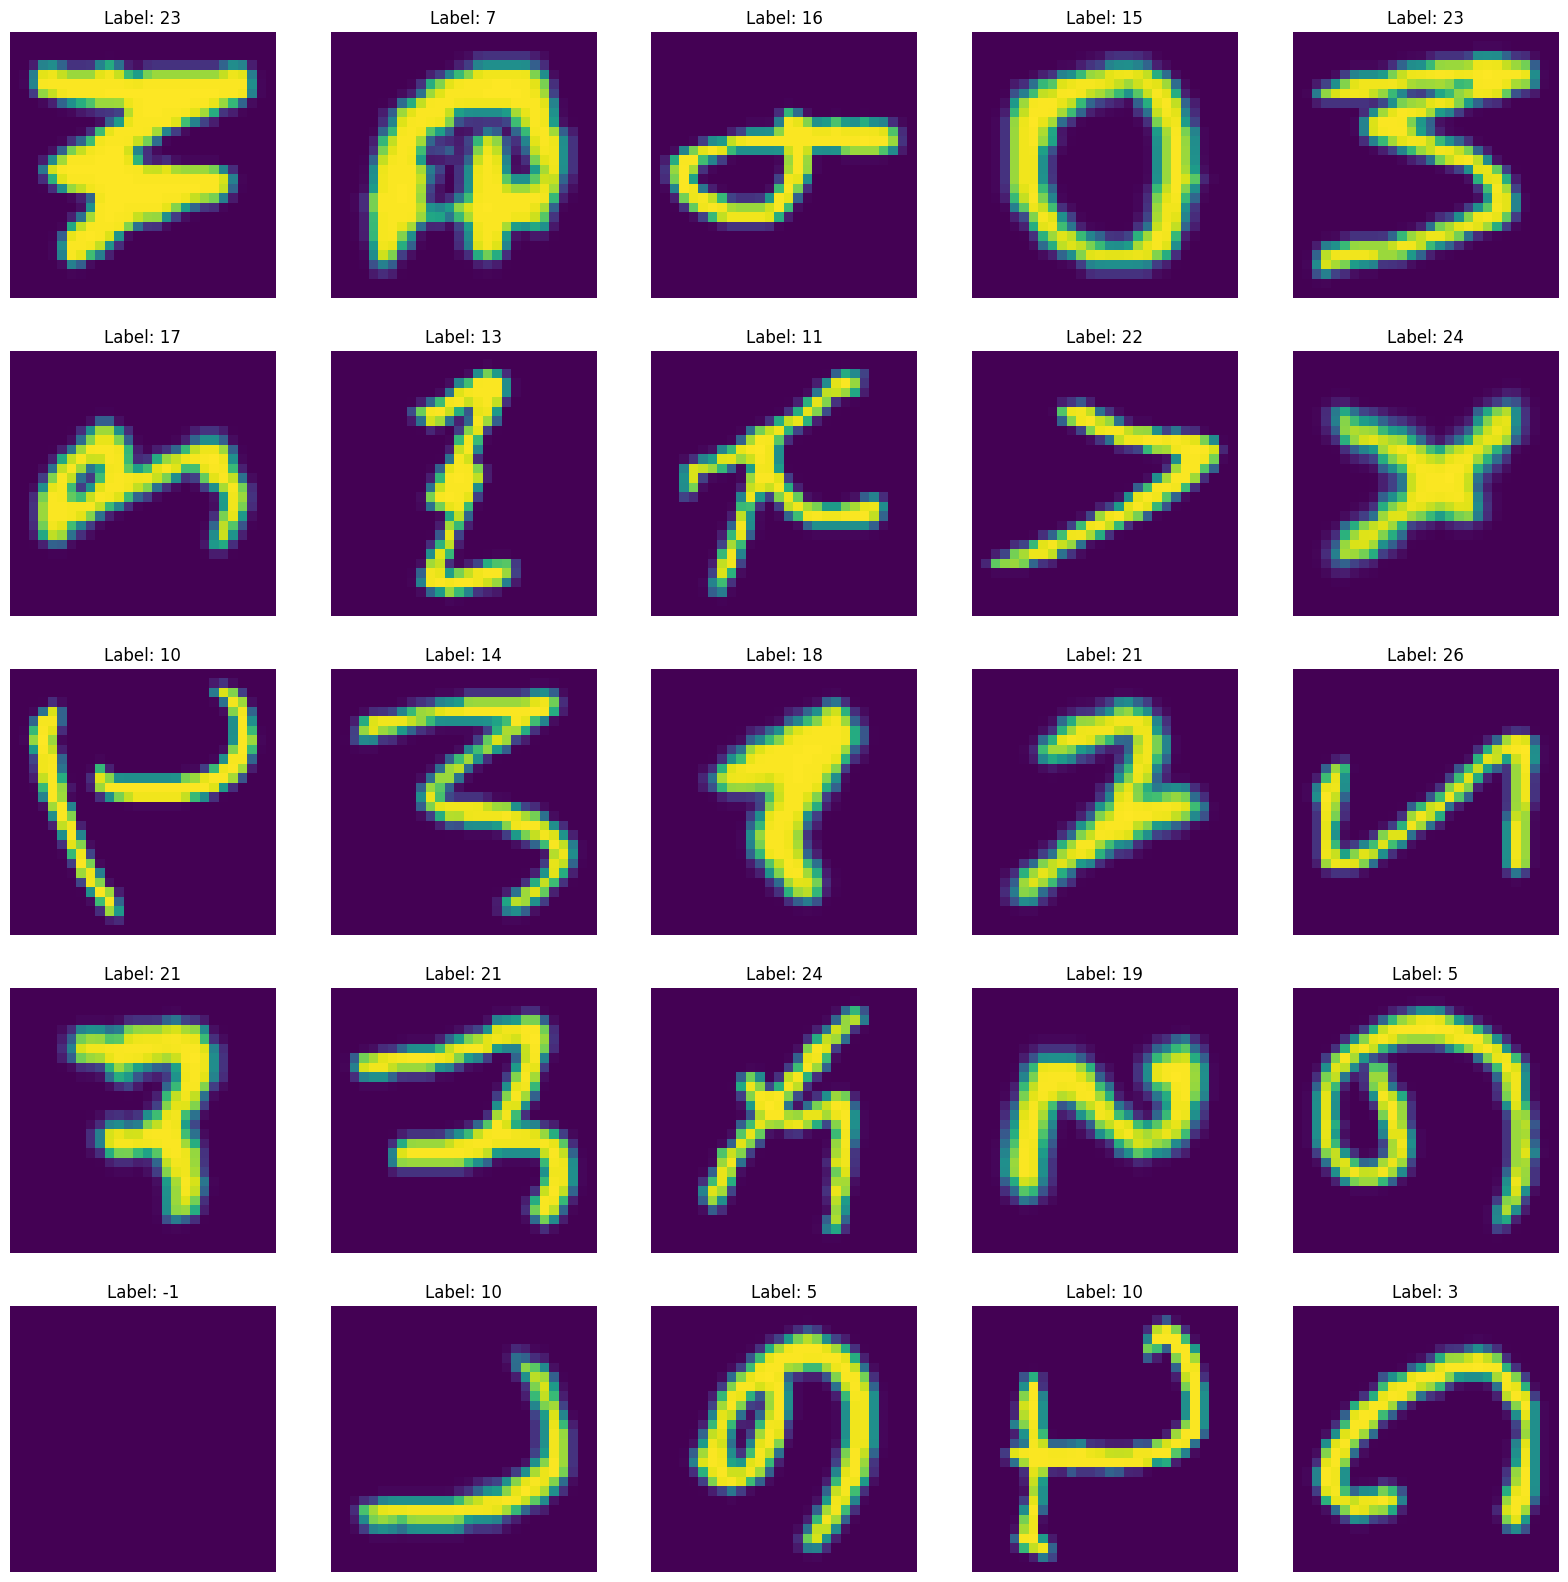

In [6]:


# Extract the first 25 rows of data
data = df.head(25)

# Separate the labels and pixel values
labels = data.iloc[:, 0]
images = data.iloc[:, 1:]

# Convert each image to a 28x28 array and display it
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    image = images.iloc[i].values.reshape(28, 28)
    ax.imshow(image)
    ax.set_title(f"Label: {labels.iloc[i]}")
    ax.axis('off')

plt.show()


Here we can see from the sample of the dataframe that the images are not oriented in the correct direction and are flipped. I will perform feature engineering to remedy this issue. another issue is that they are not black annd white. So in the importation process, i will be converting them to black and white as well

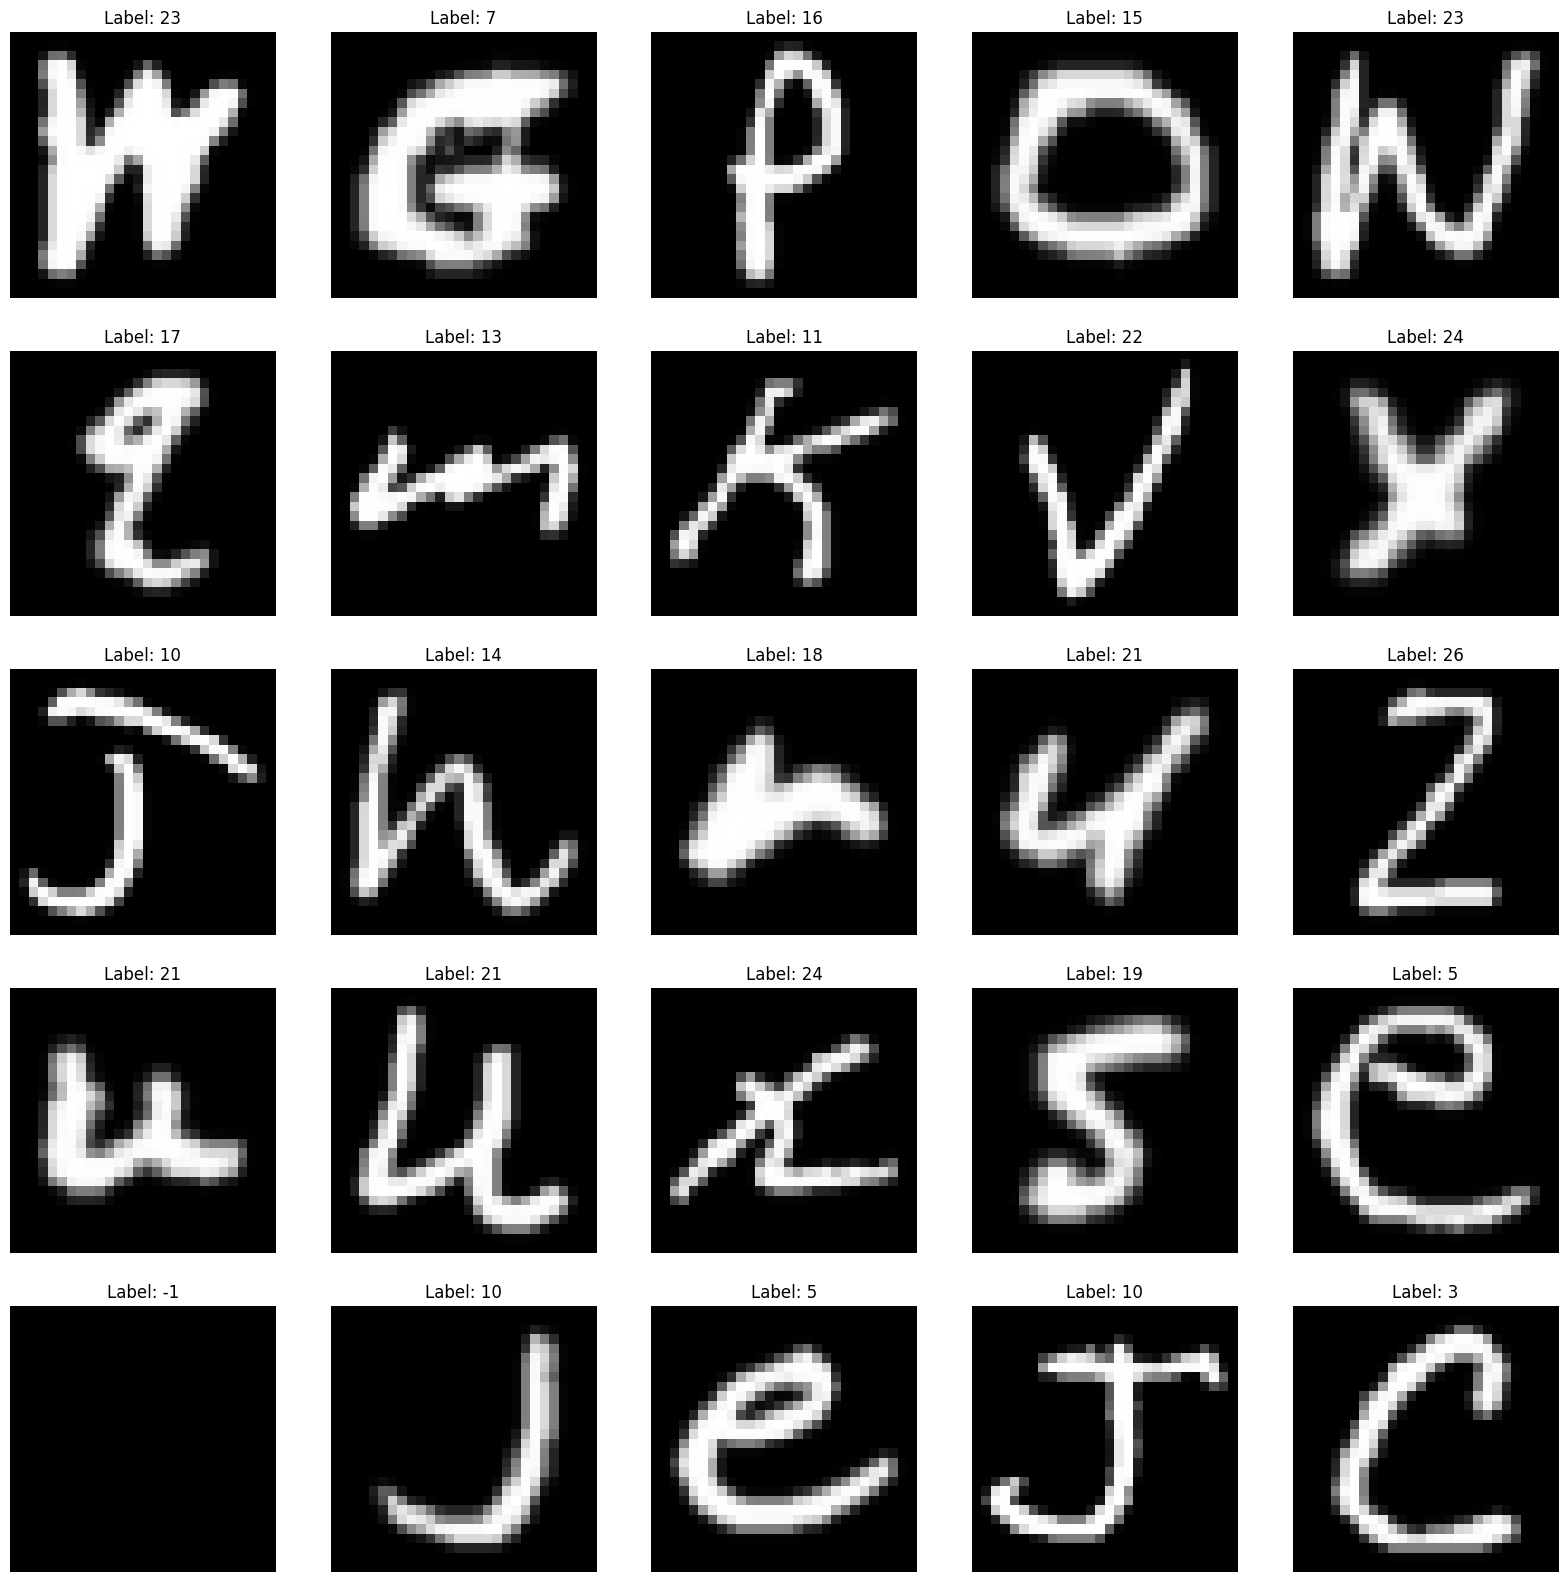

In [7]:

# Extract the first 25 rows of data
data = df.head(25)

# Separate the labels and pixel values
labels = data.iloc[:, 0]
images = data.iloc[:, 1:]

# Convert each image to a 28x28 array, rotate 270 degrees, flip, and display it in greyscale
fig, axes = plt.subplots(5, 5, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    image = images.iloc[i].values.reshape(28, 28)
    # Rotate the image 270 degrees and flip it
    rotated_image = rotate(image, 270)
    flipped_image = rotated_image[:, ::-1]
    # Display the image in greyscale
    ax.imshow(flipped_image, cmap='gray')
    ax.set_title(f"Label: {labels.iloc[i]}")
    ax.axis('off')

plt.show()


Here we can see the data after it has been rotated and flipped into the right orientation. We can see that label -1 is a blank image and through checking through the -1 file i realised that they are all either blank or one singular color. Since these do not provide any meaningful information to us, i will not be using them.

Here i will be saving the images in the correct orientation into a folder on google drive since i am using google colab and saving the bath so that i can use the images later.

In [28]:

# Function to map numeric labels to letters
label_to_letter = {i: chr(96 + i) for i in range(1, 27)}

# Function to delete existing label directories
def delete_label_directories(base_path):
    for label in label_to_letter.values():
        directory = os.path.join(base_path, f'label_{label}')
        if os.path.exists(directory):
            shutil.rmtree(directory)

# Function to create images from DataFrame and apply transformations
def create_images(df, base_path):
    folderlist = []

    # Delete existing label directories
    delete_label_directories(base_path)

    for index, row in df.iterrows():
        label = row[0]
        pixels = np.array(row[1:], dtype=np.uint8)

        # Reshape pixel values to a 28x28 image
        image_data = np.reshape(pixels, (28, 28))

        # Check if the image is not empty
        if np.any(image_data > 0):
            img = Image.fromarray(image_data)

            # Get letter label
            letter_label = label_to_letter.get(label, f'label_{label}')

            # Create the directory based on the letter label if it doesn't exist
            directory = os.path.join(base_path, f'label_{letter_label}')
            if not os.path.exists(directory):
                os.makedirs(directory)
                folderlist.append(directory)

            # Save the original image in the corresponding directory
            img_path = os.path.join(directory, f'image_{index}.png')
            img.save(img_path)

            # Open the saved image
            img_saved = Image.open(img_path)

            # Rotate the image by 90 degrees clockwise
            rotated_img = img_saved.rotate(270, expand=True)

            # Flip the image horizontally
            flipped_img = rotated_img.transpose(Image.FLIP_LEFT_RIGHT)

            # Save the rotated and flipped image back to the same path
            flipped_img.save(img_path)

    return folderlist



base_path = os.getcwd()
create_images(df, base_path)


['/content/label_w',
 '/content/label_g',
 '/content/label_p',
 '/content/label_o',
 '/content/label_q',
 '/content/label_m',
 '/content/label_k',
 '/content/label_v',
 '/content/label_x',
 '/content/label_j',
 '/content/label_n',
 '/content/label_r',
 '/content/label_u',
 '/content/label_z',
 '/content/label_s',
 '/content/label_e',
 '/content/label_c',
 '/content/label_y',
 '/content/label_b',
 '/content/label_h',
 '/content/label_d',
 '/content/label_t',
 '/content/label_i',
 '/content/label_f',
 '/content/label_l',
 '/content/label_a']

Here I am loading the images from the directory and storing them in variables so that i can use the images and the corresponding labels later for the model.

In [29]:


# Function to load images from directories
def load_images_from_directories(image_size=(28, 28)):
    images = []
    labels = []

    # Iterate through letter labels a-z
    for letter in string.ascii_lowercase:
        directory = f'label_{letter}'
        if os.path.exists(directory):
            for filename in os.listdir(directory):
                if filename.endswith('.png'):
                    img_path = os.path.join(directory, filename)
                    img = Image.open(img_path).resize(image_size)
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(letter)
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_from_directories()
images = images / 255.0

# Reshape images to have a channel dimension
images = np.reshape(images, (-1, 28, 28, 1))

# Encode labels as integers
label_to_index = {chr(i): idx for idx, i in enumerate(range(ord('a'), ord('z') + 1))}
labels = np.array([label_to_index[label] for label in labels])
labels = to_categorical(labels, num_classes=26)

# Split the data into training and testing sets
images, test_images, labels, test_labels = train_test_split(images, labels, test_size=0.05, stratify=labels)







In [10]:
import plotly.express as px
# Count the occurrences of each label
label_counts = np.sum(labels, axis=0)

# Create a pie chart using Plotly
label_names = [chr(i) for i in range(ord('a'), ord('z') + 1)]
fig = px.pie(values=label_counts, names=label_names, title='Label Distribution in Training Data')
fig.show()

Here we can see that thee distribution of the classes are fairly equal which is good as it means the images generated would not be too biased to one class.

This is to check if the final images of the training dataset are satisfactory. and fortunately they are. Here we can see one of each class and the lables do in fact correspond to the images being shown.

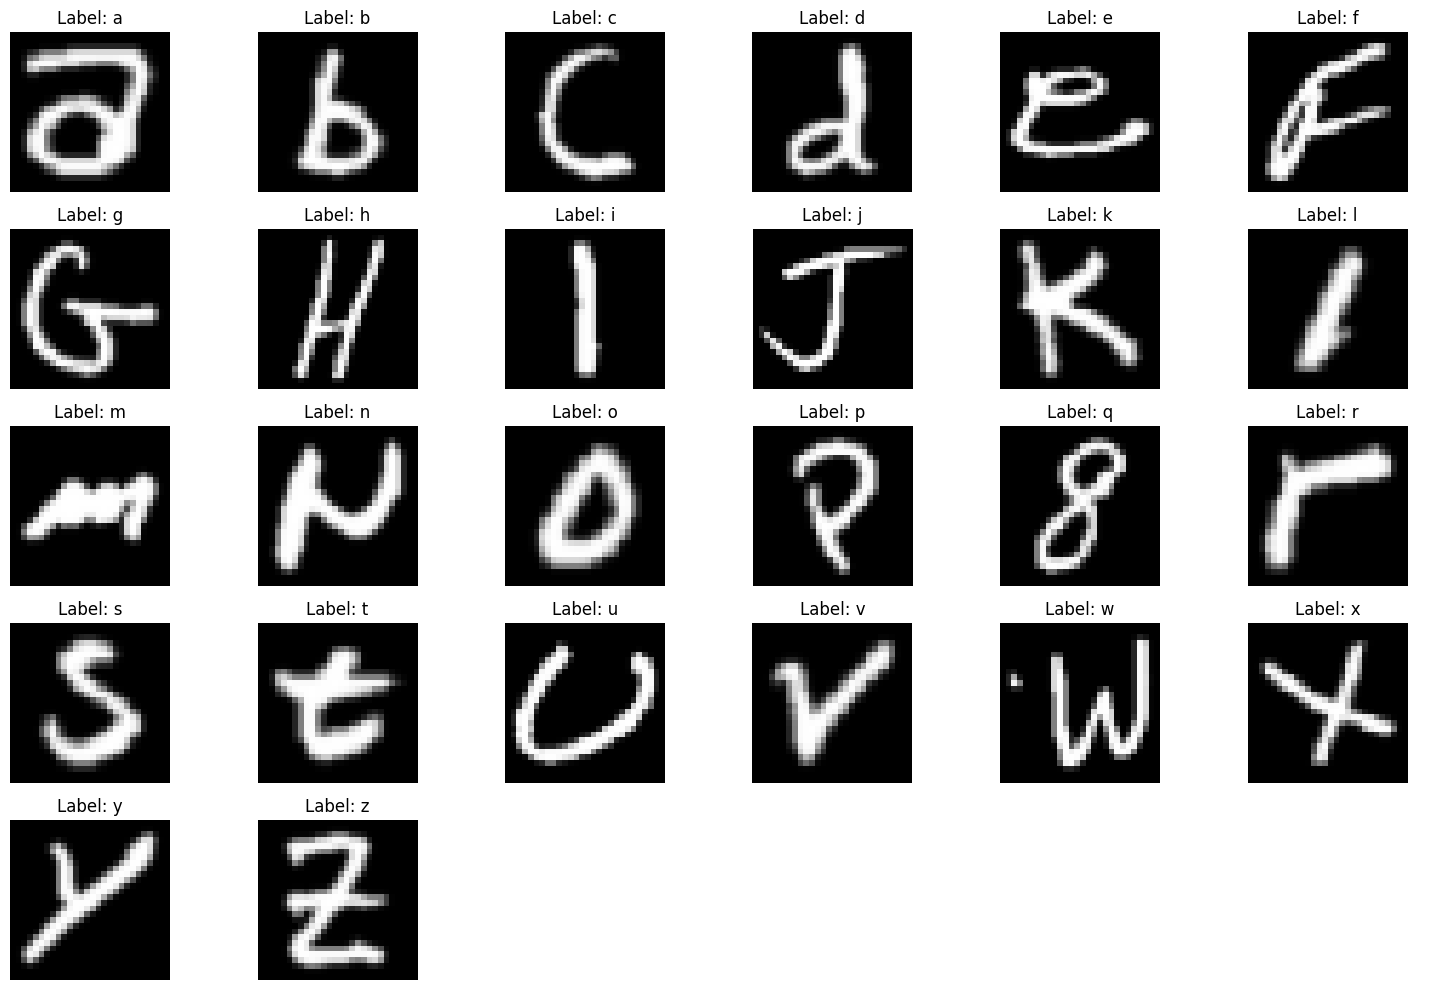

In [11]:
def display_one_image_per_class(images, labels):

    label_to_image = {}

    for label in string.ascii_lowercase:
        label_idx = label_to_index[label]

        idx = np.where(np.argmax(labels, axis=1) == label_idx)[0]
        if len(idx) > 0:
            label_to_image[label] = images[idx[0]]

    # Number of classes
    num_classes = len(label_to_image)
    # Create a figure to display images
    fig, axes = plt.subplots(5, 6, figsize=(15, 10))
    axes = axes.flatten()

    for ax, (label, img) in zip(axes, label_to_image.items()):
        ax.imshow(img.reshape(28, 28), cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')

    # Hide any unused subplots
    for i in range(num_classes, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


display_one_image_per_class(images, labels)

First i would be trying a CGAN. A CGAN is a GAN that takes in both labels and immage data as its input and is therefore able to generate images for specific classes. hopefully this will create better images for each class as the images are not being confused together by the GAN

####Step 3: application of GAN and explanation of architechture

4/4 [==============================] - 0s 14ms/step
Saving and displaying images for epoch 0
1/1 [==============================] - 0s 140ms/step


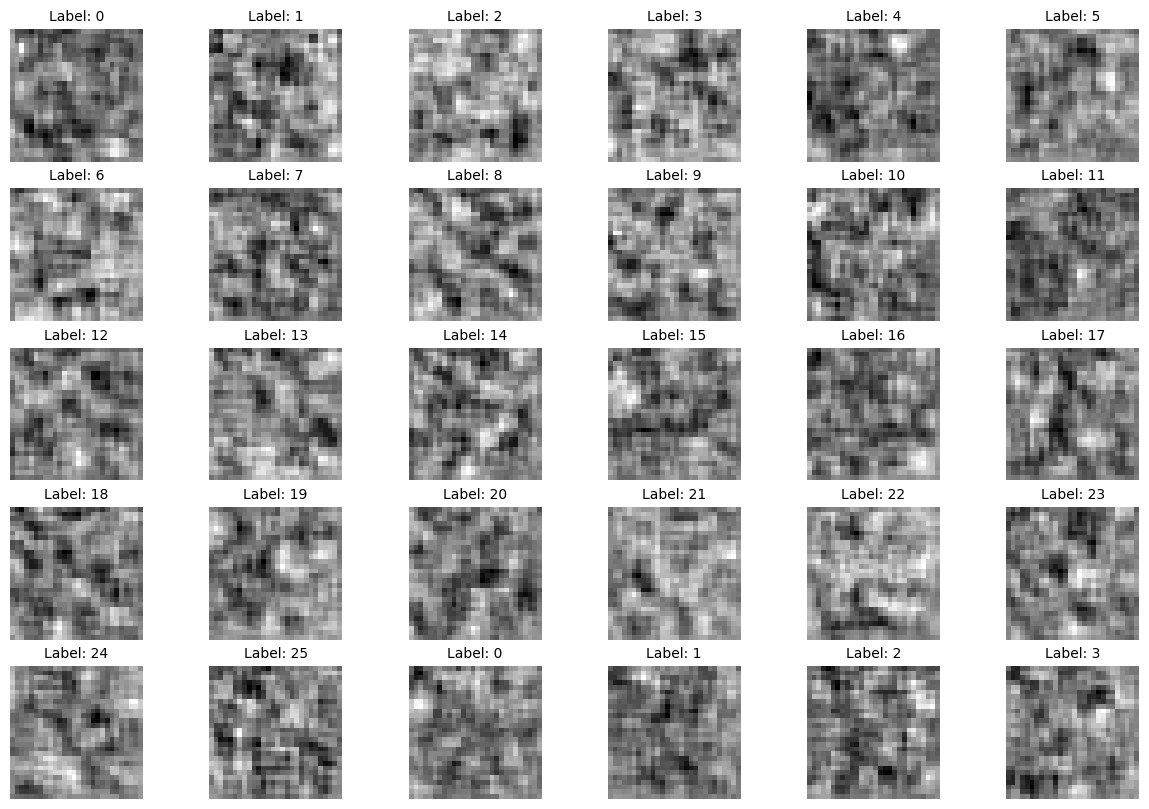

Epoch 0 Batch 0/659
D Loss Real: 0.8865
D Loss Fake: 0.6779
G Loss: 0.9118
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 1/659
D Loss Real: 0.6019
D Loss Fake: 0.6962
G Loss: 0.8628
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 2/659
D Loss Real: 0.3858
D Loss Fake: 0.7548
G Loss: 0.7471
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 3/659
D Loss Real: 0.2876
D Loss Fake: 0.8009
G Loss: 0.6262
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 4/659
D Loss Real: 0.2311
D Loss Fake: 0.8681
G Loss: 0.4681
4/4 [==============================] - 0s 12ms/step
Epoch 0 Batch 5/659
D Loss Real: 0.2329
D Loss Fake: 0.8890
G Loss: 0.4110
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 6/659
D Loss Real: 0.1897
D Loss Fake: 0.8784
G Loss: 0.3430
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 7/659
D Loss Real: 0.1954
D Loss Fake: 0.8529
G Loss: 0.4036
4/4 [==============================]

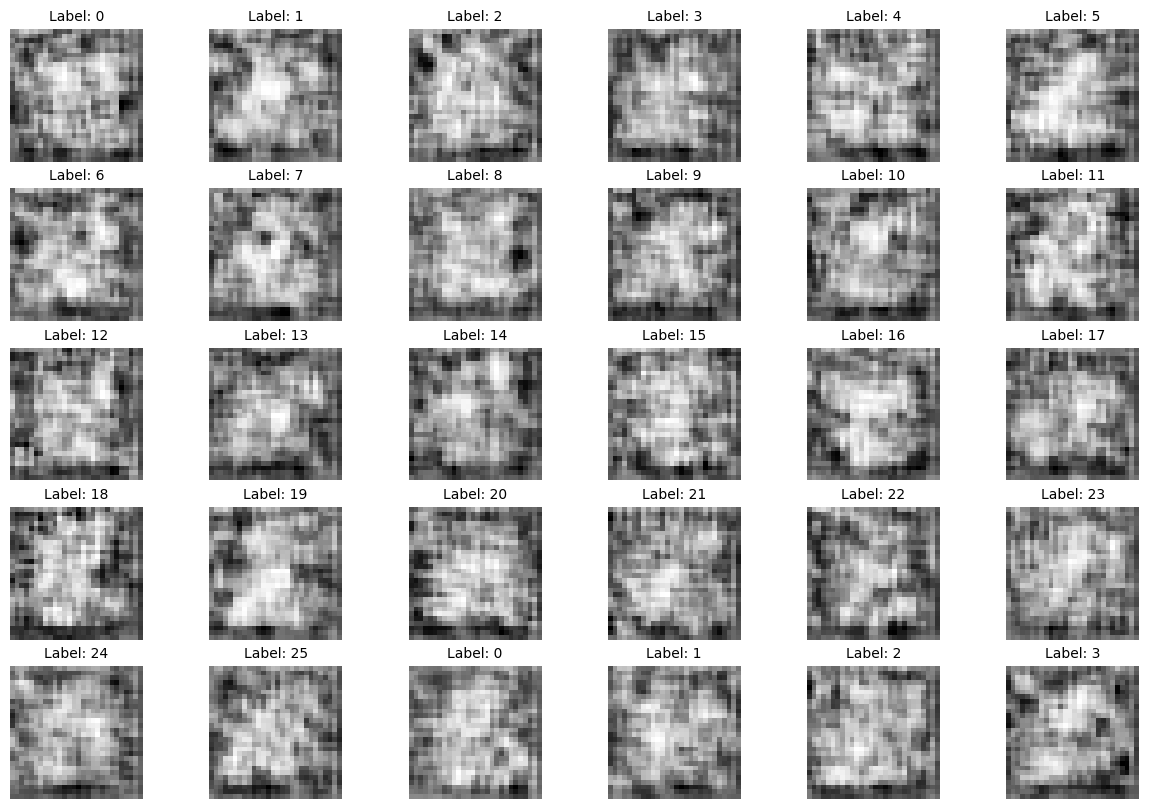

Epoch 0 Batch 100/659
D Loss Real: 0.3688
D Loss Fake: 0.6669
G Loss: 0.2741
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 101/659
D Loss Real: 0.4019
D Loss Fake: 0.6872
G Loss: 0.2880
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 102/659
D Loss Real: 0.4783
D Loss Fake: 0.7643
G Loss: 0.3263
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 103/659
D Loss Real: 0.5417
D Loss Fake: 0.4398
G Loss: 0.2983
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 104/659
D Loss Real: 0.6089
D Loss Fake: 0.3808
G Loss: 0.2134
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 105/659
D Loss Real: 0.5654
D Loss Fake: 0.4434
G Loss: 0.1735
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 106/659
D Loss Real: 0.4866
D Loss Fake: 0.4761
G Loss: 0.1503
4/4 [==============================] - 0s 12ms/step
Epoch 0 Batch 107/659
D Loss Real: 0.4521
D Loss Fake: 0.5607
G Loss: 0.1373
4/4 [===============

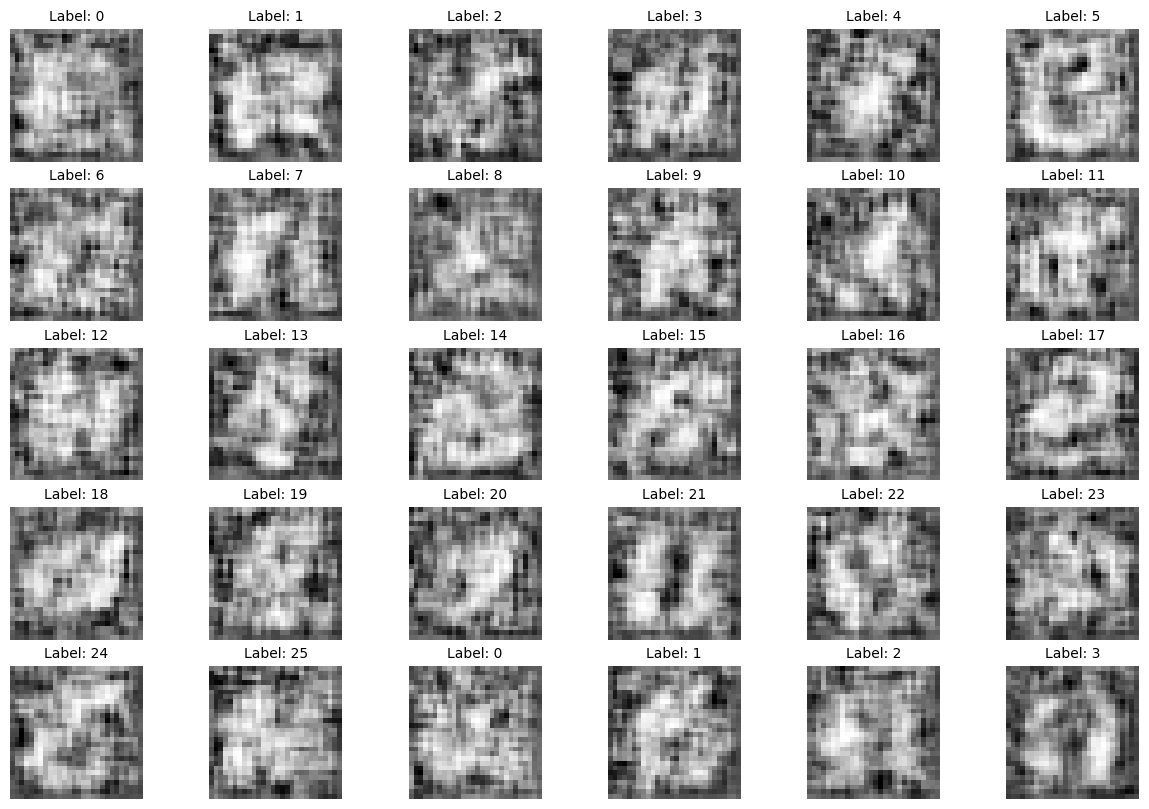

Epoch 0 Batch 200/659
D Loss Real: 0.7106
D Loss Fake: 0.4632
G Loss: 0.6816
4/4 [==============================] - 0s 11ms/step
Epoch 0 Batch 201/659
D Loss Real: 0.7190
D Loss Fake: 0.7135
G Loss: 0.6727
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 202/659
D Loss Real: 0.6906
D Loss Fake: 0.7047
G Loss: 0.7230
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 203/659
D Loss Real: 0.7141
D Loss Fake: 0.5029
G Loss: 0.7203
4/4 [==============================] - 0s 12ms/step
Epoch 0 Batch 204/659
D Loss Real: 0.7442
D Loss Fake: 0.3330
G Loss: 0.6922
4/4 [==============================] - 0s 14ms/step
Epoch 0 Batch 205/659
D Loss Real: 0.6770
D Loss Fake: 0.3872
G Loss: 0.6262
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 206/659
D Loss Real: 0.6572
D Loss Fake: 0.5364
G Loss: 0.6604
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 207/659
D Loss Real: 0.6689
D Loss Fake: 0.7836
G Loss: 0.6471
4/4 [===============

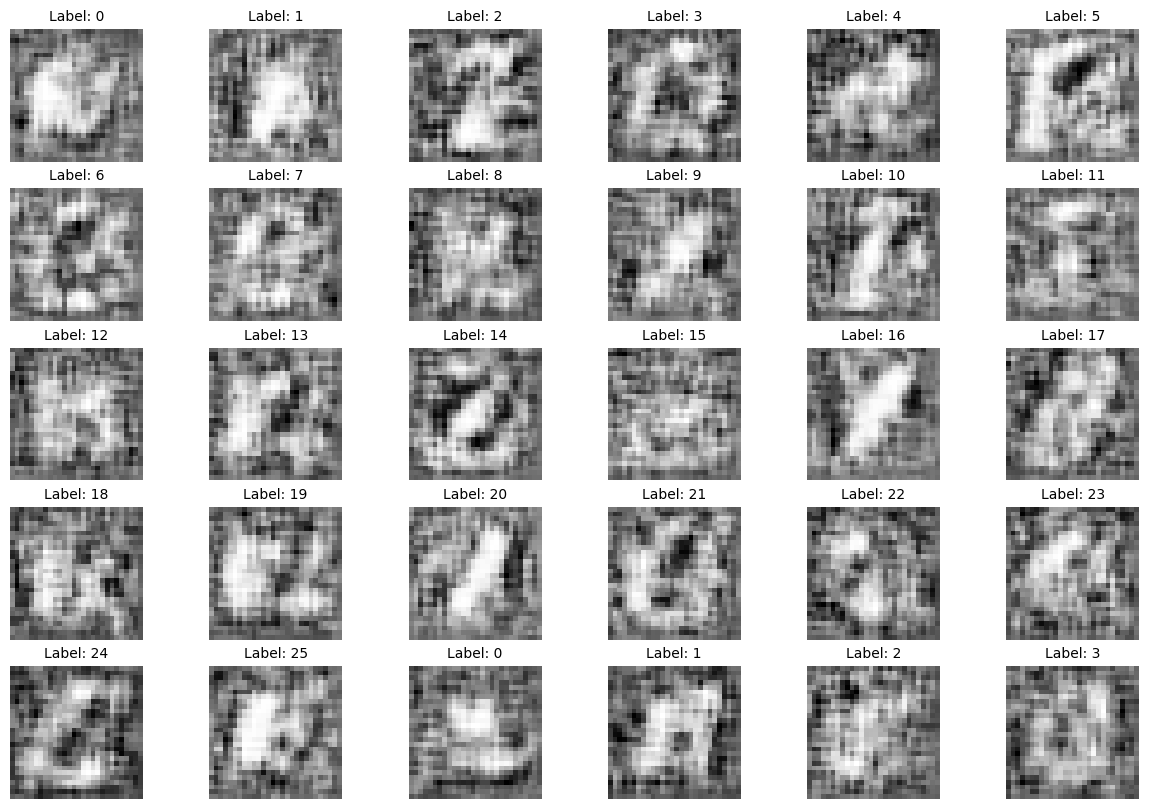

Epoch 0 Batch 300/659
D Loss Real: 0.7034
D Loss Fake: 0.6491
G Loss: 0.8059
4/4 [==============================] - 0s 14ms/step
Epoch 0 Batch 301/659
D Loss Real: 0.7099
D Loss Fake: 0.6364
G Loss: 0.7913
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 302/659
D Loss Real: 0.7076
D Loss Fake: 0.4646
G Loss: 0.8651
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 303/659
D Loss Real: 0.6980
D Loss Fake: 0.5873
G Loss: 0.8133
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 304/659
D Loss Real: 0.6819
D Loss Fake: 0.6663
G Loss: 0.8004
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 305/659
D Loss Real: 0.7110
D Loss Fake: 0.7337
G Loss: 0.7806
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 306/659
D Loss Real: 0.6832
D Loss Fake: 0.7053
G Loss: 0.7535
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 307/659
D Loss Real: 0.6994
D Loss Fake: 0.6968
G Loss: 0.6624
4/4 [===============

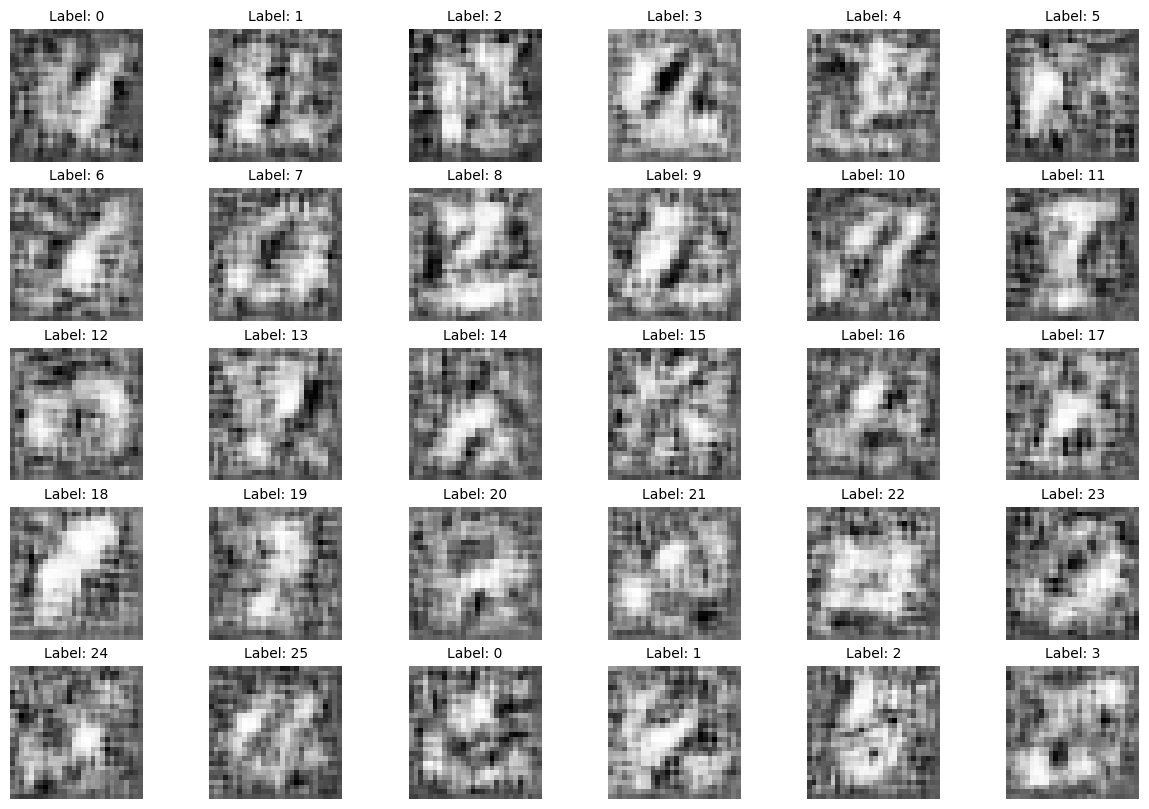

Epoch 0 Batch 400/659
D Loss Real: 0.6654
D Loss Fake: 0.6633
G Loss: 0.8369
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 401/659
D Loss Real: 0.6413
D Loss Fake: 0.4811
G Loss: 0.7521
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 402/659
D Loss Real: 0.6348
D Loss Fake: 0.5167
G Loss: 0.7450
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 403/659
D Loss Real: 0.6946
D Loss Fake: 0.5957
G Loss: 0.7939
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 404/659
D Loss Real: 0.6681
D Loss Fake: 0.6701
G Loss: 0.7301
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 405/659
D Loss Real: 0.6284
D Loss Fake: 0.6026
G Loss: 0.7311
4/4 [==============================] - 0s 14ms/step
Epoch 0 Batch 406/659
D Loss Real: 0.6279
D Loss Fake: 0.7679
G Loss: 0.7384
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 407/659
D Loss Real: 0.5964
D Loss Fake: 0.7344
G Loss: 0.7251
4/4 [===============

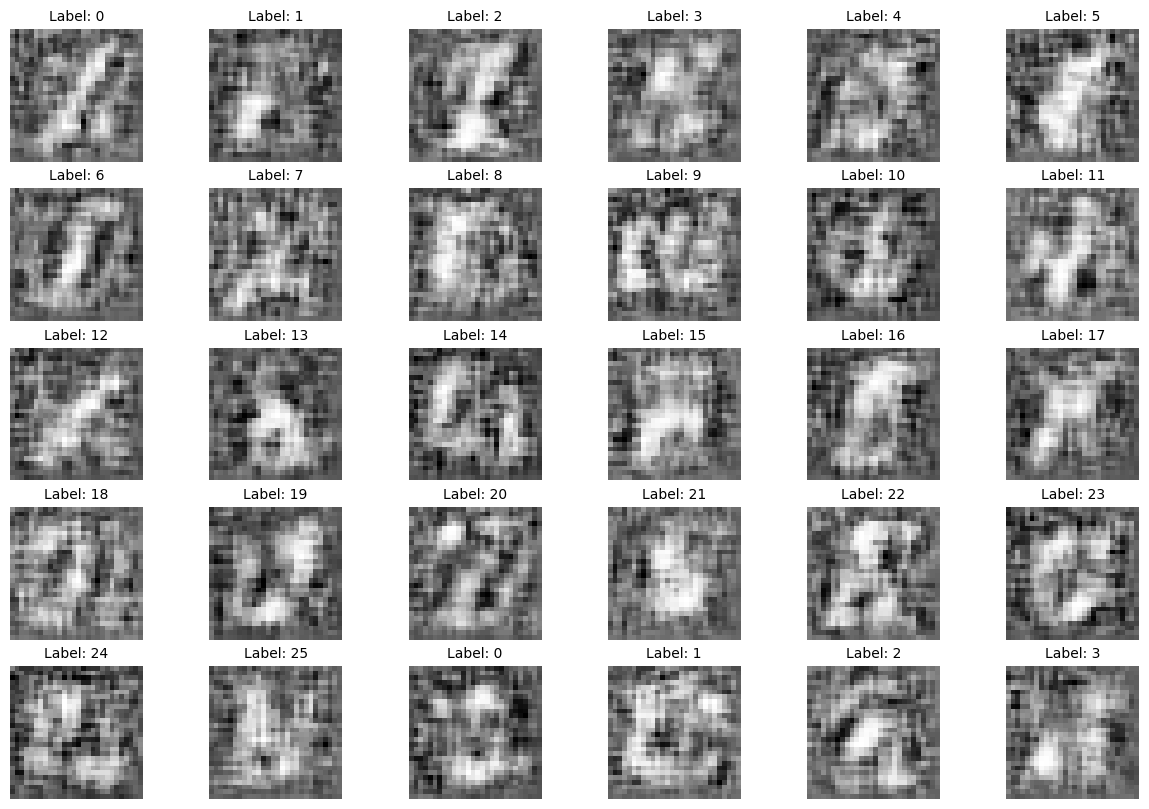

Epoch 0 Batch 500/659
D Loss Real: 0.5142
D Loss Fake: 0.7514
G Loss: 0.6314
4/4 [==============================] - 0s 10ms/step
Epoch 0 Batch 501/659
D Loss Real: 0.4905
D Loss Fake: 0.4472
G Loss: 0.6359
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 502/659
D Loss Real: 0.4678
D Loss Fake: 0.5612
G Loss: 0.6834
4/4 [==============================] - 0s 12ms/step
Epoch 0 Batch 503/659
D Loss Real: 0.4917
D Loss Fake: 0.7406
G Loss: 0.7562
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 504/659
D Loss Real: 0.6015
D Loss Fake: 0.5943
G Loss: 0.6928
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 505/659
D Loss Real: 0.5607
D Loss Fake: 0.5203
G Loss: 0.7408
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 506/659
D Loss Real: 0.5392
D Loss Fake: 0.5909
G Loss: 0.6831
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 507/659
D Loss Real: 0.5301
D Loss Fake: 0.7117
G Loss: 0.6573
4/4 [===============

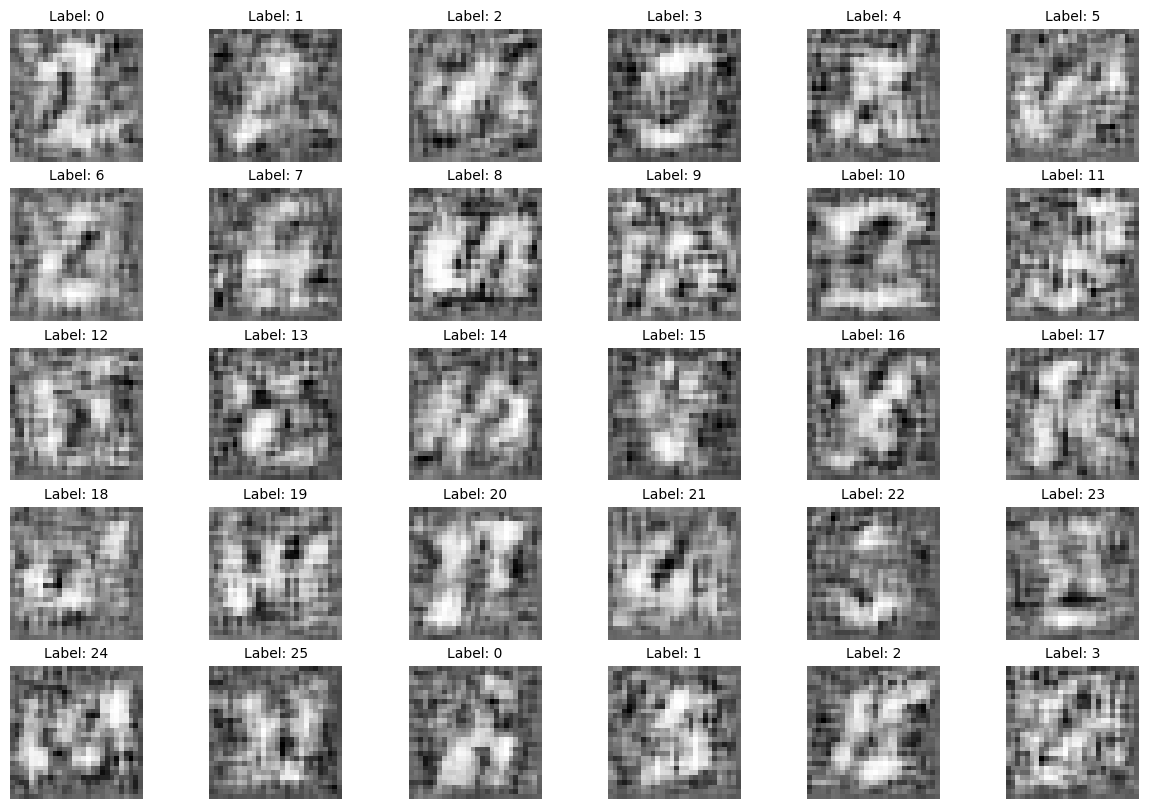

Epoch 0 Batch 600/659
D Loss Real: 0.4687
D Loss Fake: 0.6165
G Loss: 0.8288
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 601/659
D Loss Real: 0.4628
D Loss Fake: 0.7836
G Loss: 0.9349
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 602/659
D Loss Real: 0.4969
D Loss Fake: 0.6616
G Loss: 0.7293
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 603/659
D Loss Real: 0.5058
D Loss Fake: 0.7503
G Loss: 0.7998
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 604/659
D Loss Real: 0.4984
D Loss Fake: 0.7096
G Loss: 1.0860
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 605/659
D Loss Real: 0.5391
D Loss Fake: 0.7325
G Loss: 1.3321
4/4 [==============================] - 0s 26ms/step
Epoch 0 Batch 606/659
D Loss Real: 0.5073
D Loss Fake: 0.4657
G Loss: 1.7649
4/4 [==============================] - 0s 13ms/step
Epoch 0 Batch 607/659
D Loss Real: 0.5675
D Loss Fake: 0.2172
G Loss: 0.9932
4/4 [===============

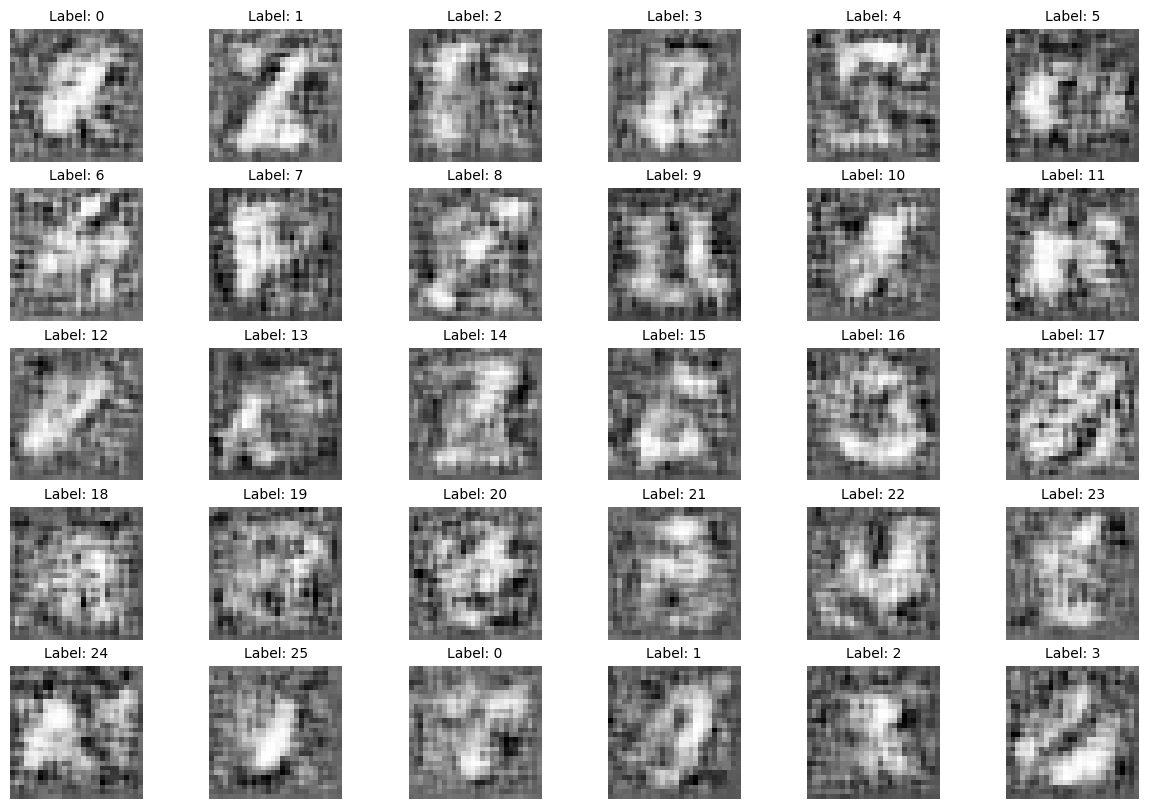

Epoch 1 Batch 0/659
D Loss Real: 0.5196
D Loss Fake: 0.6771
G Loss: 1.1217
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 1/659
D Loss Real: 0.5549
D Loss Fake: 0.6565
G Loss: 1.1906
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 2/659
D Loss Real: 0.5393
D Loss Fake: 0.4871
G Loss: 1.1724
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 3/659
D Loss Real: 0.5444
D Loss Fake: 0.3408
G Loss: 0.9484
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 4/659
D Loss Real: 0.5304
D Loss Fake: 0.3518
G Loss: 0.9138
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 5/659
D Loss Real: 0.5142
D Loss Fake: 0.7474
G Loss: 0.8444
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 6/659
D Loss Real: 0.5077
D Loss Fake: 0.7490
G Loss: 0.9169
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 7/659
D Loss Real: 0.4816
D Loss Fake: 0.7502
G Loss: 0.9328
4/4 [==============================]

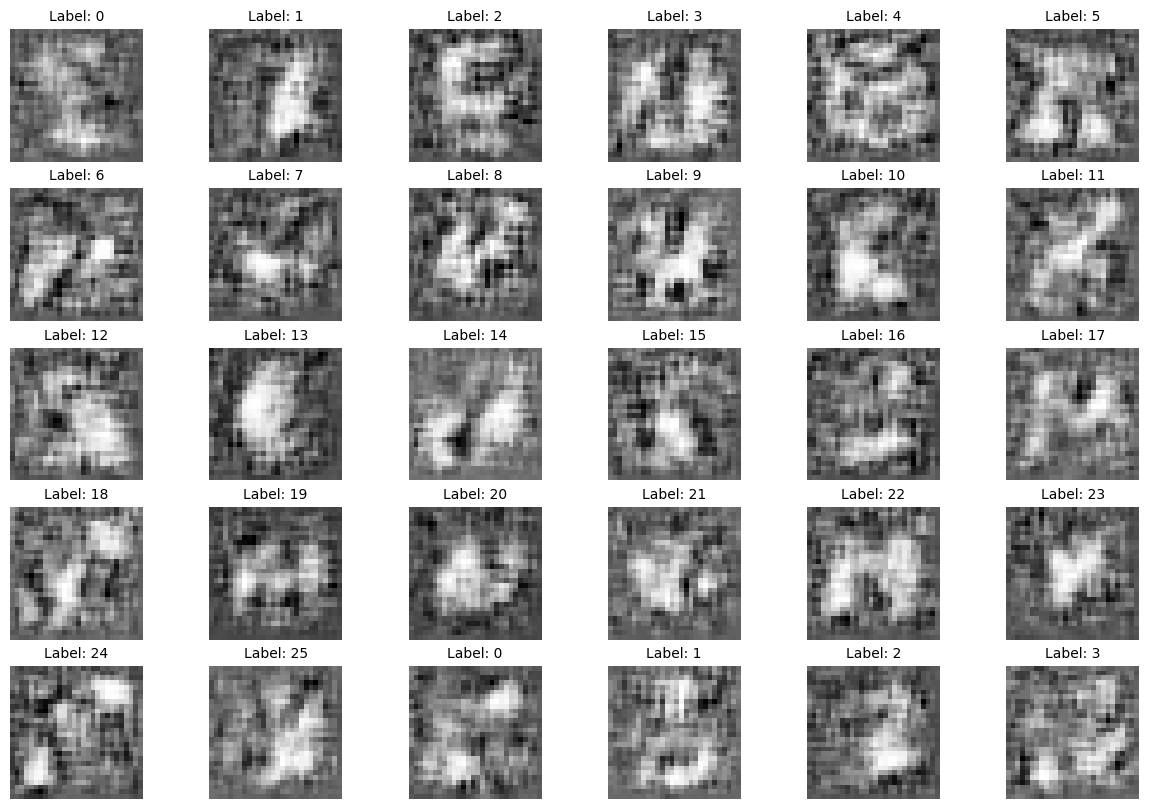

Epoch 1 Batch 100/659
D Loss Real: 0.4106
D Loss Fake: 0.7509
G Loss: 0.7620
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 101/659
D Loss Real: 0.4585
D Loss Fake: 0.6156
G Loss: 0.8126
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 102/659
D Loss Real: 0.4446
D Loss Fake: 0.1552
G Loss: 0.7096
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 103/659
D Loss Real: 0.3878
D Loss Fake: 0.1261
G Loss: 0.6692
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 104/659
D Loss Real: 0.3868
D Loss Fake: 0.9070
G Loss: 0.8480
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 105/659
D Loss Real: 0.4096
D Loss Fake: 0.7799
G Loss: 0.7898
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 106/659
D Loss Real: 0.4129
D Loss Fake: 0.3945
G Loss: 0.8183
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 107/659
D Loss Real: 0.5319
D Loss Fake: 0.3364
G Loss: 0.9061
4/4 [===============

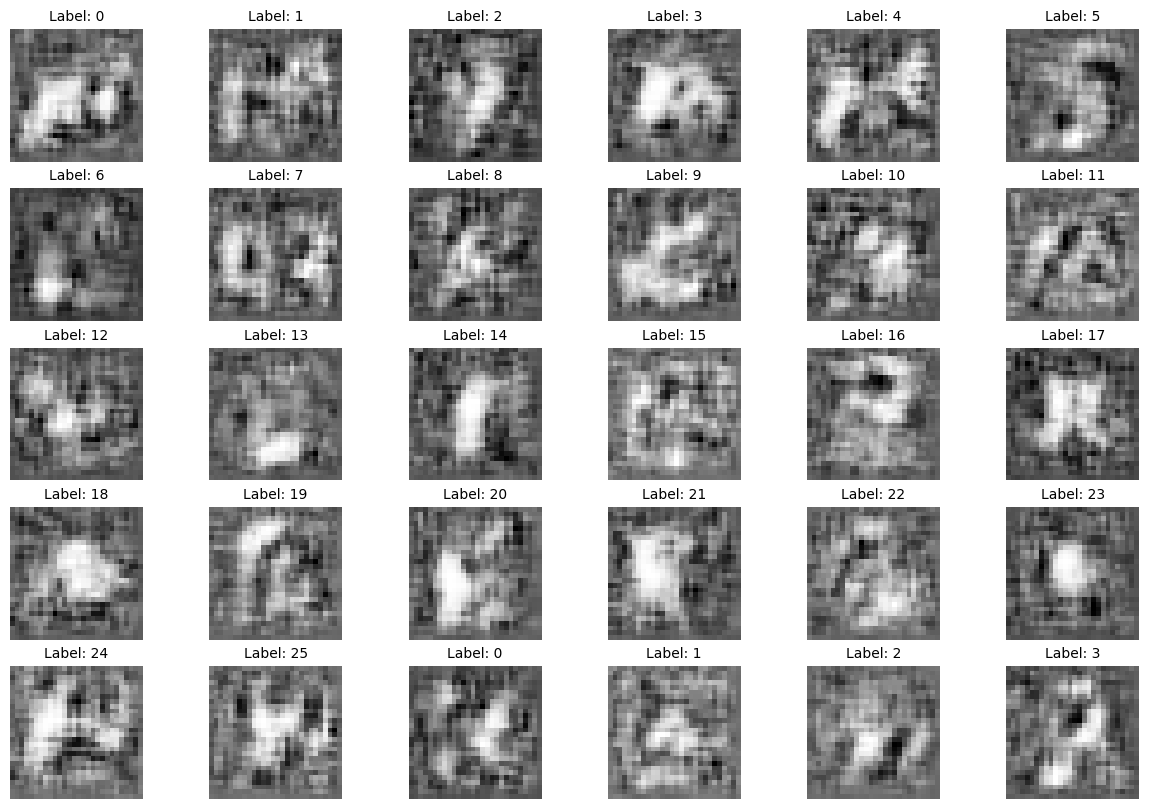

Epoch 1 Batch 200/659
D Loss Real: 0.4777
D Loss Fake: 0.6217
G Loss: 0.9681
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 201/659
D Loss Real: 0.4467
D Loss Fake: 0.4468
G Loss: 0.8195
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 202/659
D Loss Real: 0.4293
D Loss Fake: 0.2149
G Loss: 0.6858
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 203/659
D Loss Real: 0.4214
D Loss Fake: 0.2384
G Loss: 0.8244
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 204/659
D Loss Real: 0.4094
D Loss Fake: 0.6745
G Loss: 0.7665
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 205/659
D Loss Real: 0.3981
D Loss Fake: 0.8412
G Loss: 0.7874
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 206/659
D Loss Real: 0.3826
D Loss Fake: 0.7738
G Loss: 0.8474
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 207/659
D Loss Real: 0.4068
D Loss Fake: 0.7618
G Loss: 0.8553
4/4 [===============

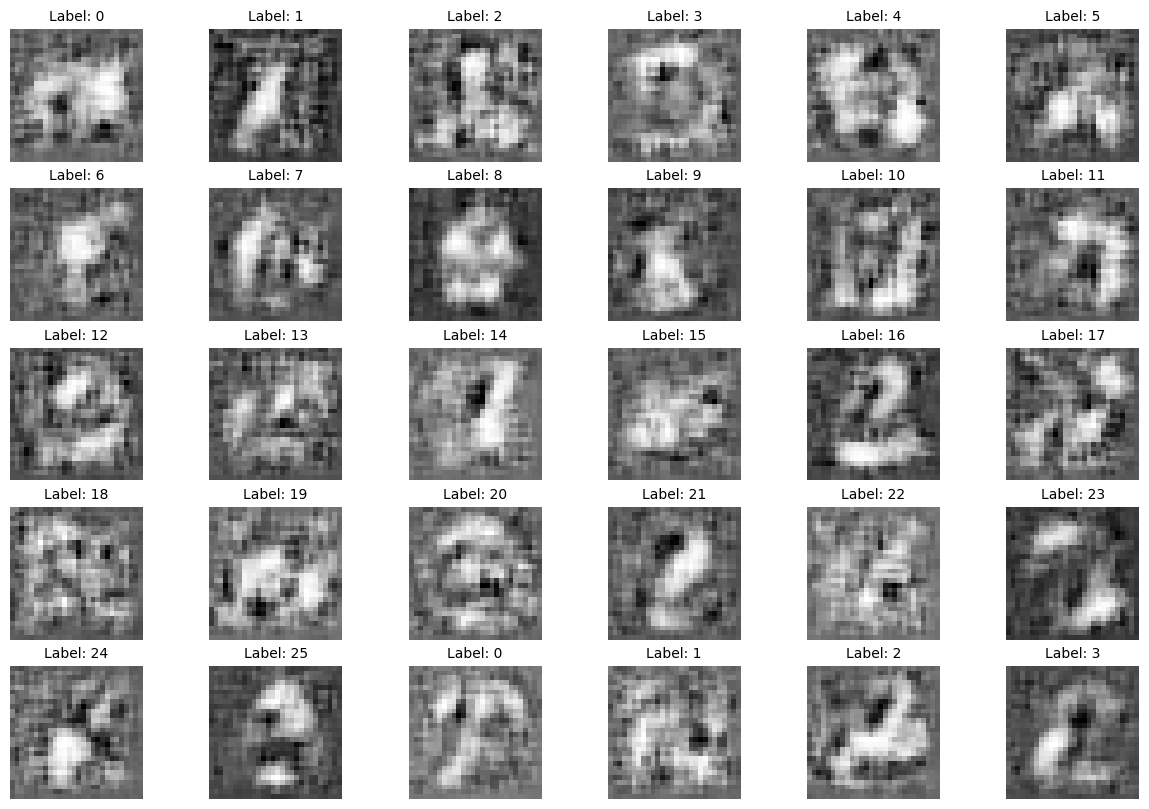

Epoch 1 Batch 300/659
D Loss Real: 0.4313
D Loss Fake: 0.3286
G Loss: 0.8245
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 301/659
D Loss Real: 0.4132
D Loss Fake: 0.5131
G Loss: 0.7451
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 302/659
D Loss Real: 0.4474
D Loss Fake: 0.7200
G Loss: 0.7036
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 303/659
D Loss Real: 0.4282
D Loss Fake: 0.8129
G Loss: 0.8706
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 304/659
D Loss Real: 0.4139
D Loss Fake: 0.6928
G Loss: 1.0475
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 305/659
D Loss Real: 0.3816
D Loss Fake: 0.6480
G Loss: 1.1661
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 306/659
D Loss Real: 0.4483
D Loss Fake: 0.3855
G Loss: 1.5814
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 307/659
D Loss Real: 0.4775
D Loss Fake: 0.6158
G Loss: 0.9537
4/4 [===============

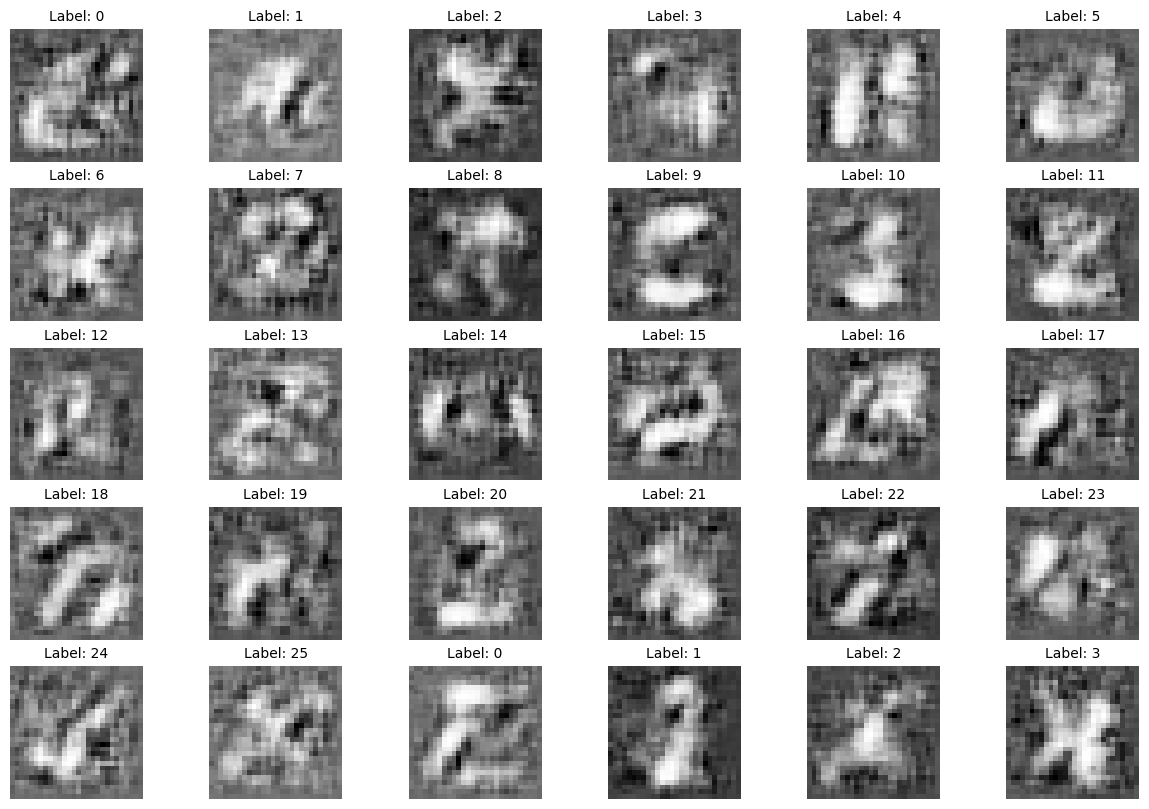

Epoch 1 Batch 400/659
D Loss Real: 0.3578
D Loss Fake: 0.7976
G Loss: 0.9226
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 401/659
D Loss Real: 0.4533
D Loss Fake: 0.6910
G Loss: 0.9273
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 402/659
D Loss Real: 0.5299
D Loss Fake: 0.6510
G Loss: 0.9417
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 403/659
D Loss Real: 0.4348
D Loss Fake: 0.3642
G Loss: 0.9170
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 404/659
D Loss Real: 0.4937
D Loss Fake: 0.2150
G Loss: 0.8826
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 405/659
D Loss Real: 0.4212
D Loss Fake: 0.2028
G Loss: 0.7863
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 406/659
D Loss Real: 0.4270
D Loss Fake: 0.8410
G Loss: 0.8204
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 407/659
D Loss Real: 0.3422
D Loss Fake: 0.3776
G Loss: 0.7862
4/4 [===============

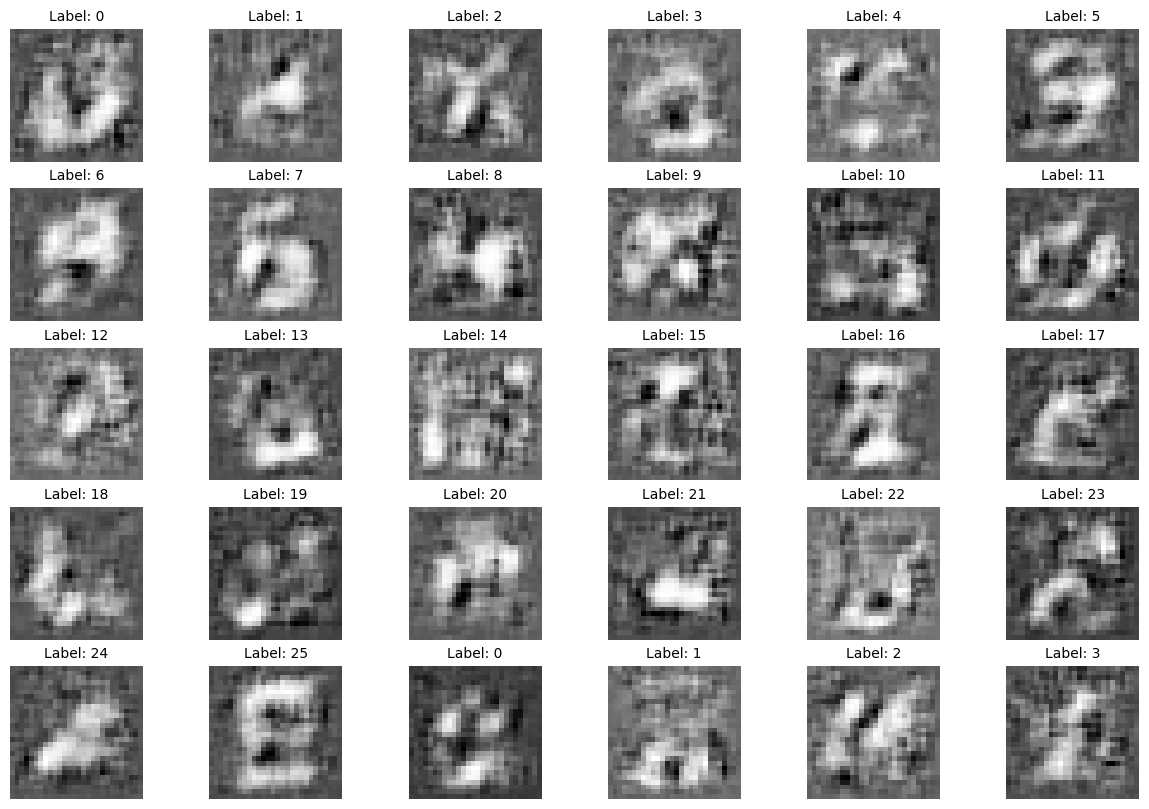

Epoch 1 Batch 500/659
D Loss Real: 0.4290
D Loss Fake: 0.6476
G Loss: 1.1272
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 501/659
D Loss Real: 0.4686
D Loss Fake: 0.5678
G Loss: 0.9617
4/4 [==============================] - 0s 19ms/step
Epoch 1 Batch 502/659
D Loss Real: 0.4443
D Loss Fake: 0.6428
G Loss: 0.9096
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 503/659
D Loss Real: 0.4873
D Loss Fake: 0.4738
G Loss: 0.9956
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 504/659
D Loss Real: 0.5154
D Loss Fake: 0.3369
G Loss: 0.8474
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 505/659
D Loss Real: 0.4898
D Loss Fake: 0.2119
G Loss: 0.8080
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 506/659
D Loss Real: 0.3932
D Loss Fake: 0.1841
G Loss: 0.6479
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 507/659
D Loss Real: 0.3105
D Loss Fake: 0.5647
G Loss: 0.7022
4/4 [===============

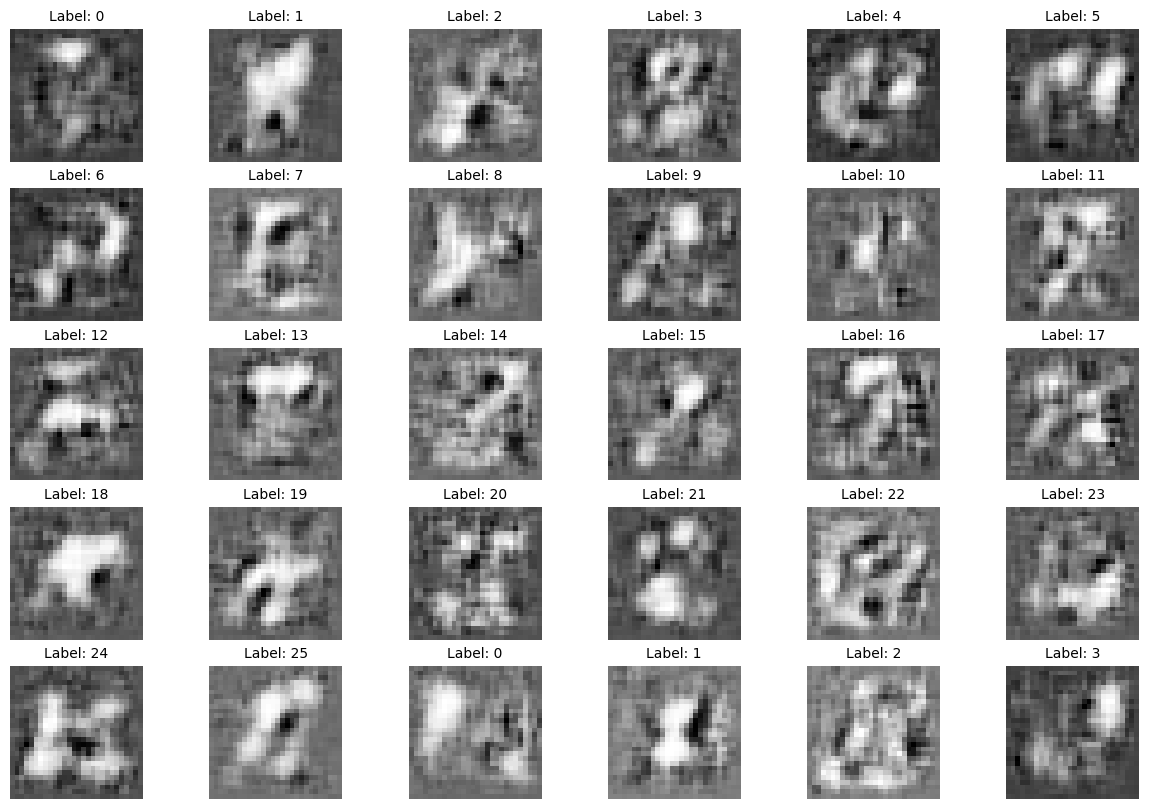

Epoch 1 Batch 600/659
D Loss Real: 0.5218
D Loss Fake: 0.1107
G Loss: 1.0271
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 601/659
D Loss Real: 0.3225
D Loss Fake: 0.7911
G Loss: 0.8899
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 602/659
D Loss Real: 0.3560
D Loss Fake: 0.2569
G Loss: 0.7807
4/4 [==============================] - 0s 14ms/step
Epoch 1 Batch 603/659
D Loss Real: 0.3936
D Loss Fake: 0.4571
G Loss: 0.8285
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 604/659
D Loss Real: 0.4565
D Loss Fake: 0.2832
G Loss: 0.7504
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 605/659
D Loss Real: 0.3878
D Loss Fake: 0.4922
G Loss: 0.8632
4/4 [==============================] - 0s 13ms/step
Epoch 1 Batch 606/659
D Loss Real: 0.3666
D Loss Fake: 0.7542
G Loss: 0.6714
4/4 [==============================] - 0s 12ms/step
Epoch 1 Batch 607/659
D Loss Real: 0.3324
D Loss Fake: 0.8615
G Loss: 0.9787
4/4 [===============

In [18]:
# Parameters
noise_dim = 100
num_classes = 26
width, height, channel = 28, 28, 1
batch_size = 64
epochs = 5
steps_per_epoch = None
gen_optimizer = Adam(0.0002, 0.5)
disc_optimizer = Adam(0.0002, 0.5)

# Update steps_per_epoch based on the dataset
steps_per_epoch = images.shape[0] // batch_size

# Generator model
def buildGenerator():
    noise_input = Input(shape=(noise_dim,))
    label_input = Input(shape=(num_classes,))
    combined_input = Concatenate()([noise_input, label_input])

    x = Dense(1024)(combined_input)
    x = BatchNormalization(momentum=0.8)(x)
    x = Activation("relu")(x)
    x = Dense(6272)(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = Activation("relu")(x)
    x = Reshape((7, 7, 128))(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (2, 2), padding='same', kernel_initializer=RandomNormal(0, 0.02))(x)
    x = BatchNormalization(momentum=0.8)(x)
    x = LeakyReLU(0.2)(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(channel, (3, 3), padding='same', activation="tanh", kernel_initializer=RandomNormal(0, 0.02))(x)

    model = Model([noise_input, label_input], x)
    return model

# Discriminator model
def buildDiscriminator():
    image_input = Input(shape=(width, height, channel))
    label_input = Input(shape=(num_classes,))

    x = Flatten()(image_input)
    x = Concatenate()([x, label_input])

    x = Dense(512)(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.5)(x)
    x = Dense(256)(x)
    x = LeakyReLU(0.2)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)

    model = Model([image_input, label_input], x)
    model.compile(loss='binary_crossentropy', optimizer=disc_optimizer, metrics=['accuracy'])
    return model

# Function to build and compile the GAN model
def build_gan(generator, discriminator):
    noise = Input(shape=(noise_dim,))
    label = Input(shape=(num_classes,))
    fake_data = generator([noise, label])
    discriminator.trainable = False
    output = discriminator([fake_data, label])
    gan = Model([noise, label], output)
    gan.compile(loss='binary_crossentropy', optimizer=gen_optimizer, metrics=['accuracy'])
    return gan

# Function to save and display images
def save_and_display_images(epoch, generator, latent_dim, num_classes, save_interval=100):
    print(f"Saving and displaying images for epoch {epoch}")

    r, c = 5, 6  # Grid dimensions for 26 images
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    labels = np.eye(num_classes)[np.arange(r * c) % num_classes]

    gen_imgs = generator.predict([noise, labels])
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c, figsize=(15, 10))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            # Add label below the image
            axs[i, j].set_title(f"Label: {np.argmax(labels[cnt])}", fontsize=10)
            cnt += 1

    if not os.path.exists('gan_images'):
        os.makedirs('gan_images')
    fig.savefig(f"gan_images/gan_generated_image_{epoch}.png")
    plt.show()
    plt.close()

# Training function
def train_gan(generator, discriminator, gan, epochs, batch_size, images):
    steps_per_epoch = images.shape[0] // batch_size
    for epoch in range(epochs):
        for batch in range(steps_per_epoch):
            # Generate noise and labels
            noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
            labels = np.eye(num_classes)[np.random.randint(0, num_classes, batch_size)]

            # Generate fake images
            fake_data = generator.predict([noise, labels])

            # Select random real images and labels
            real_data = images[np.random.randint(0, images.shape[0], size=batch_size)]
            real_labels = labels

            # Create labels for the discriminator
            disc_labels_real = np.ones(batch_size)
            disc_labels_fake = np.zeros(batch_size)

            # Train the discriminator on real data
            d_loss_real = discriminator.train_on_batch([real_data, real_labels], disc_labels_real)
            # Train the discriminator on fake data
            d_loss_fake = discriminator.train_on_batch([fake_data, labels], disc_labels_fake)

            # Train the generator
            noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
            labels = np.eye(num_classes)[np.random.randint(0, num_classes, batch_size)]
            valid_labels = np.ones(batch_size)
            g_loss = gan.train_on_batch([noise, labels], valid_labels)

            if batch % 100 == 0:
                save_and_display_images(epoch, generator, noise_dim, num_classes)

            # Extract loss and accuracy values
            d_loss_real_value = d_loss_real[0]
            d_loss_fake_value = d_loss_fake[0]
            g_loss_value = g_loss[0]

            print(f"Epoch {epoch} Batch {batch}/{steps_per_epoch}")
            print(f"D Loss Real: {d_loss_real_value:.4f}")
            print(f"D Loss Fake: {d_loss_fake_value:.4f}")
            print(f"G Loss: {g_loss_value:.4f}")

# Initialize and compile models
generator = buildGenerator()
discriminator = buildDiscriminator()
gan = build_gan(generator, discriminator)

# Start training
train_gan(generator, discriminator, gan, epochs=2, batch_size=128, images=images)

https://www.kaggle.com/code/zhoulingyan0228/generating-mnist-gan

OOF unfortunately the results from the cGAN are extremely poor so i would not be using it for hyperparameter tuning or model improvement. this may be due to the fact that by making the model train on just a subset of the data(its respective class) the model may not have enough information to effectively learn to generate images from.

the next GAN we will be creating would be a DCGAN which is similar to the one shown in the lab. A DCGAN/ Vanilla gan is a gan that just generate images that are similar to the images provided to it in the dataset, with little regard wether they are of a particular class or not. Though this is useful for simple generation tasks, it is unable to create images of a specific class.

This model has a generator and a discriminator, with the generator having a dense layer that takes in noise as well to prevent overfitting, a normalisation layer to make sure the images have a value between 1 and 0 and a momentum of 0.8 a higgher monmentum gives higher weight to past statistics compared to current, followed by a relu layer that applies a function to

4/4 [==============================] - 0s 4ms/step
Saving and displaying images for epoch 0
1/1 [==============================] - 0s 139ms/step


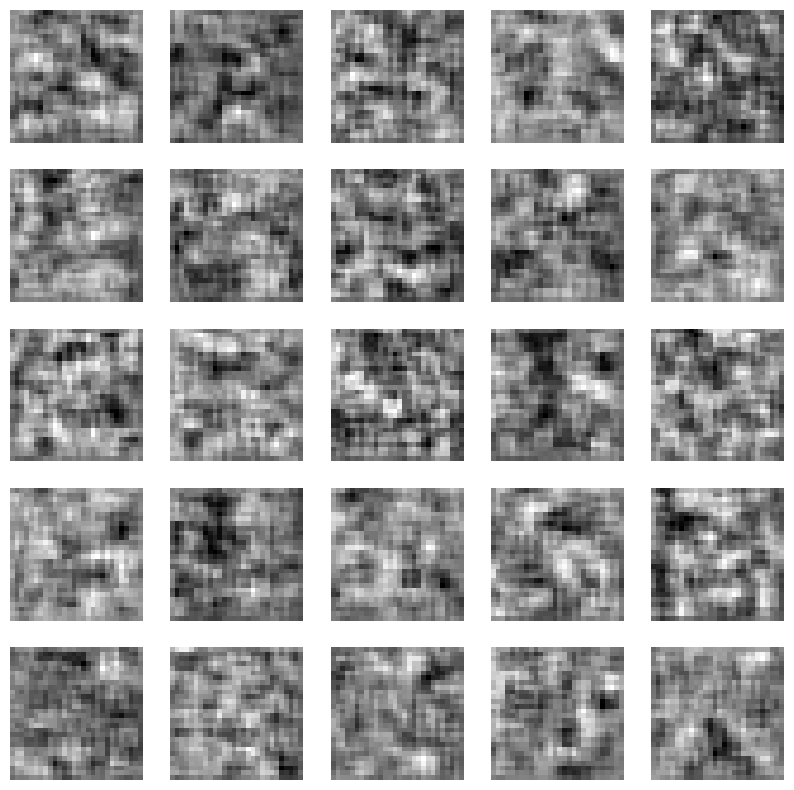

4/4 [==============================] - 0s 42ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 11290447.1252
Kernel Inception Distance: -3770.3572
Epoch 0 Batch 0/659
D Loss Real: 0.7038, D Accuracy Real: 0.5371
D Loss Fake: 0.6947, D Accuracy Fake: 0.5002
G Loss: 0.6772, G Accuracy: 0.5022
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 1/659
D Loss Real: 0.6357, D Accuracy Real: 0.5830
D Loss Fake: 0.6996, D Accuracy Fake: 0.4962
G Loss: 0.6445, G Accuracy: 0.5085
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 2/659
D Loss Real: 0.5722, D Accuracy Real: 0.6456
D Loss Fake: 0.7145, D Accuracy Fake: 0.4865
G Loss: 0.5817, G Accuracy: 0.5207
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 3/659
D Loss Real: 0.4996, D Accuracy Real: 0.7127
D Loss Fake: 0.7430, D Accuracy Fake: 0.4710
G Loss: 0.4852, G

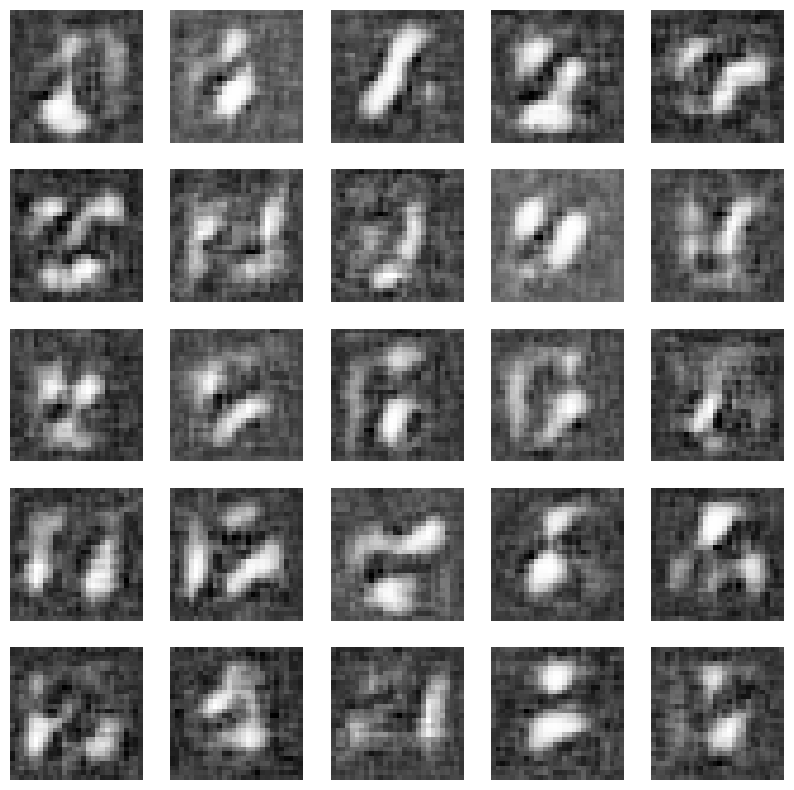

4/4 [==============================] - 0s 47ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 42ms/step
Frechet Inception Distance: 2370293.2922
Kernel Inception Distance: -496.6416
Epoch 0 Batch 100/659
D Loss Real: 0.4998, D Accuracy Real: 0.6626
D Loss Fake: 0.5993, D Accuracy Fake: 0.7218
G Loss: 1.2707, G Accuracy: 0.2867
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 101/659
D Loss Real: 0.5016, D Accuracy Real: 0.6659
D Loss Fake: 0.5621, D Accuracy Fake: 0.7177
G Loss: 1.2796, G Accuracy: 0.2872
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 102/659
D Loss Real: 0.5055, D Accuracy Real: 0.6837
D Loss Fake: 0.5566, D Accuracy Fake: 0.7064
G Loss: 1.2116, G Accuracy: 0.3156
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 103/659
D Loss Real: 0.5041, D Accuracy Real: 0.6520
D Loss Fake: 0.5823, D Accuracy Fake: 0.7120
G Loss: 1.2

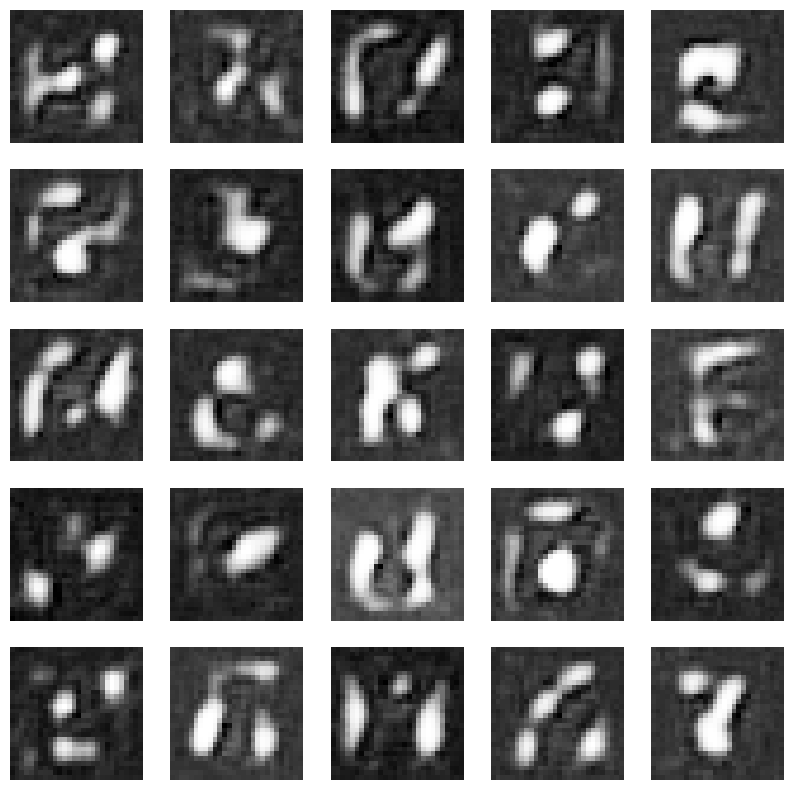

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 2114366.3610
Kernel Inception Distance: -393.2534
Epoch 0 Batch 200/659
D Loss Real: 0.4860, D Accuracy Real: 0.6282
D Loss Fake: 0.5264, D Accuracy Fake: 0.7949
G Loss: 1.6190, G Accuracy: 0.1988
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 201/659
D Loss Real: 0.5596, D Accuracy Real: 0.7009
D Loss Fake: 0.5476, D Accuracy Fake: 0.7448
G Loss: 1.3312, G Accuracy: 0.2575
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 202/659
D Loss Real: 0.4489, D Accuracy Real: 0.6687
D Loss Fake: 0.5169, D Accuracy Fake: 0.7872
G Loss: 1.5186, G Accuracy: 0.2282
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 203/659
D Loss Real: 0.4887, D Accuracy Real: 0.6792
D Loss Fake: 0.5097, D Accuracy Fake: 0.7868
G Loss: 1.5

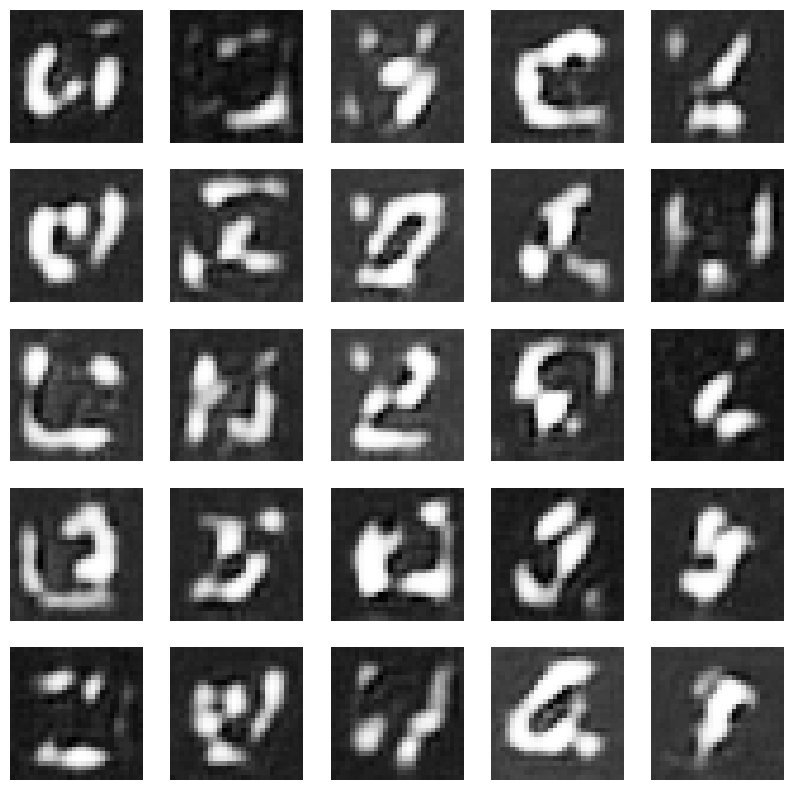

4/4 [==============================] - 0s 46ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 45ms/step
Frechet Inception Distance: 1133747.9450
Kernel Inception Distance: -108.5435
Epoch 0 Batch 300/659
D Loss Real: 0.5403, D Accuracy Real: 0.6068
D Loss Fake: 0.6013, D Accuracy Fake: 0.8028
G Loss: 1.7028, G Accuracy: 0.1934
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 301/659
D Loss Real: 0.5735, D Accuracy Real: 0.6208
D Loss Fake: 0.5412, D Accuracy Fake: 0.8001
G Loss: 1.6480, G Accuracy: 0.1979
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 302/659
D Loss Real: 0.5598, D Accuracy Real: 0.6638
D Loss Fake: 0.5585, D Accuracy Fake: 0.7780
G Loss: 1.4790, G Accuracy: 0.2230
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 303/659
D Loss Real: 0.5131, D Accuracy Real: 0.6352
D Loss Fake: 0.5255, D Accuracy Fake: 0.7971
G Loss: 1.6

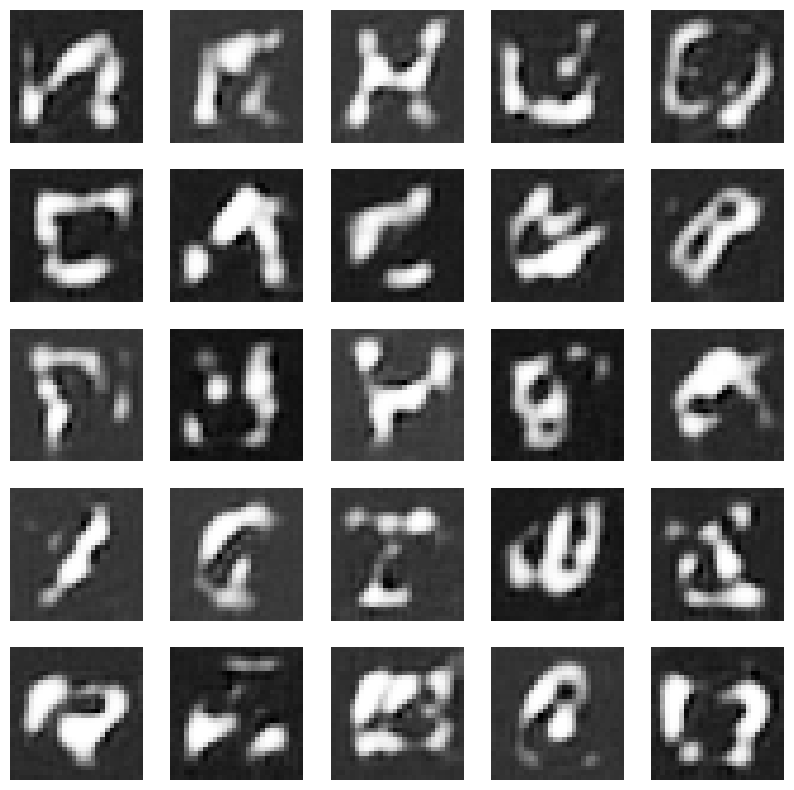

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 44ms/step
Frechet Inception Distance: 942041.7240
Kernel Inception Distance: -96.5430
Epoch 0 Batch 400/659
D Loss Real: 0.5866, D Accuracy Real: 0.6414
D Loss Fake: 0.5429, D Accuracy Fake: 0.7997
G Loss: 1.6749, G Accuracy: 0.2048
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 401/659
D Loss Real: 0.5613, D Accuracy Real: 0.6527
D Loss Fake: 0.5310, D Accuracy Fake: 0.7956
G Loss: 1.6152, G Accuracy: 0.2049
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 402/659
D Loss Real: 0.5223, D Accuracy Real: 0.6874
D Loss Fake: 0.4951, D Accuracy Fake: 0.8014
G Loss: 1.5598, G Accuracy: 0.2252
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 403/659
D Loss Real: 0.5538, D Accuracy Real: 0.6269
D Loss Fake: 0.6136, D Accuracy Fake: 0.7908
G Loss: 1.594

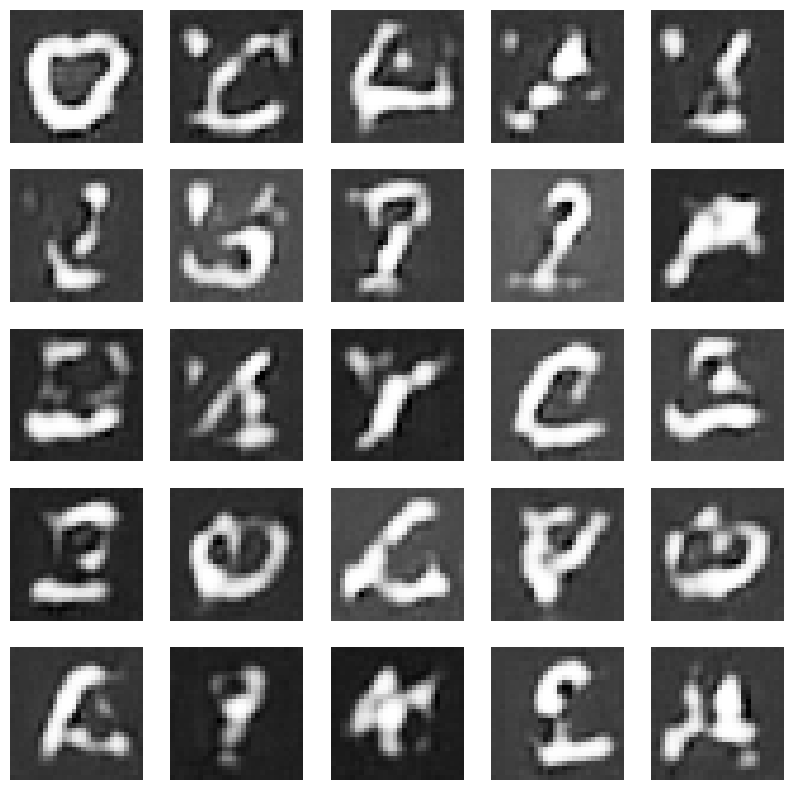

4/4 [==============================] - 0s 44ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 45ms/step
Frechet Inception Distance: 850920.4050
Kernel Inception Distance: -84.5054
Epoch 0 Batch 500/659
D Loss Real: 0.5263, D Accuracy Real: 0.6518
D Loss Fake: 0.4622, D Accuracy Fake: 0.8175
G Loss: 1.7274, G Accuracy: 0.1801
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 501/659
D Loss Real: 0.5916, D Accuracy Real: 0.6874
D Loss Fake: 0.4984, D Accuracy Fake: 0.7840
G Loss: 1.6504, G Accuracy: 0.2415
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 502/659
D Loss Real: 0.4927, D Accuracy Real: 0.6038
D Loss Fake: 0.5703, D Accuracy Fake: 0.8199
G Loss: 1.8594, G Accuracy: 0.1618
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 503/659
D Loss Real: 0.6213, D Accuracy Real: 0.6881
D Loss Fake: 0.4568, D Accuracy Fake: 0.7861
G Loss: 1.662

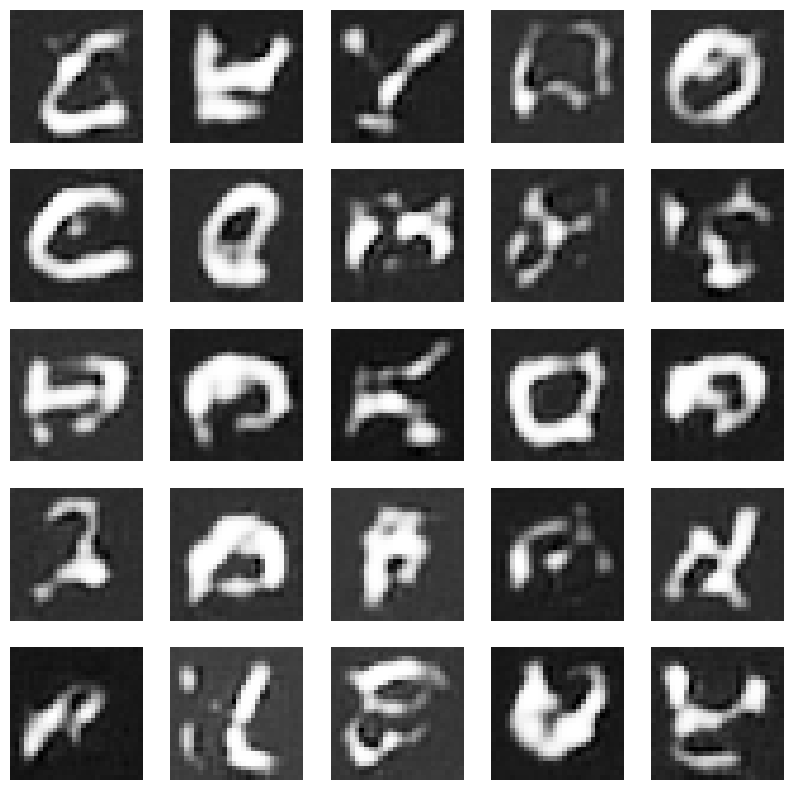

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 44ms/step
Frechet Inception Distance: 968863.3130
Kernel Inception Distance: -103.2510
Epoch 0 Batch 600/659
D Loss Real: 0.5386, D Accuracy Real: 0.6805
D Loss Fake: 0.4678, D Accuracy Fake: 0.7993
G Loss: 1.7434, G Accuracy: 0.2205
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 601/659
D Loss Real: 0.5341, D Accuracy Real: 0.6624
D Loss Fake: 0.5080, D Accuracy Fake: 0.8029
G Loss: 1.6445, G Accuracy: 0.1903
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 602/659
D Loss Real: 0.6058, D Accuracy Real: 0.6679
D Loss Fake: 0.5186, D Accuracy Fake: 0.7797
G Loss: 1.6017, G Accuracy: 0.2338
4/4 [==============================] - 0s 4ms/step
Epoch 0 Batch 603/659
D Loss Real: 0.5530, D Accuracy Real: 0.6403
D Loss Fake: 0.5409, D Accuracy Fake: 0.7960
G Loss: 1.71

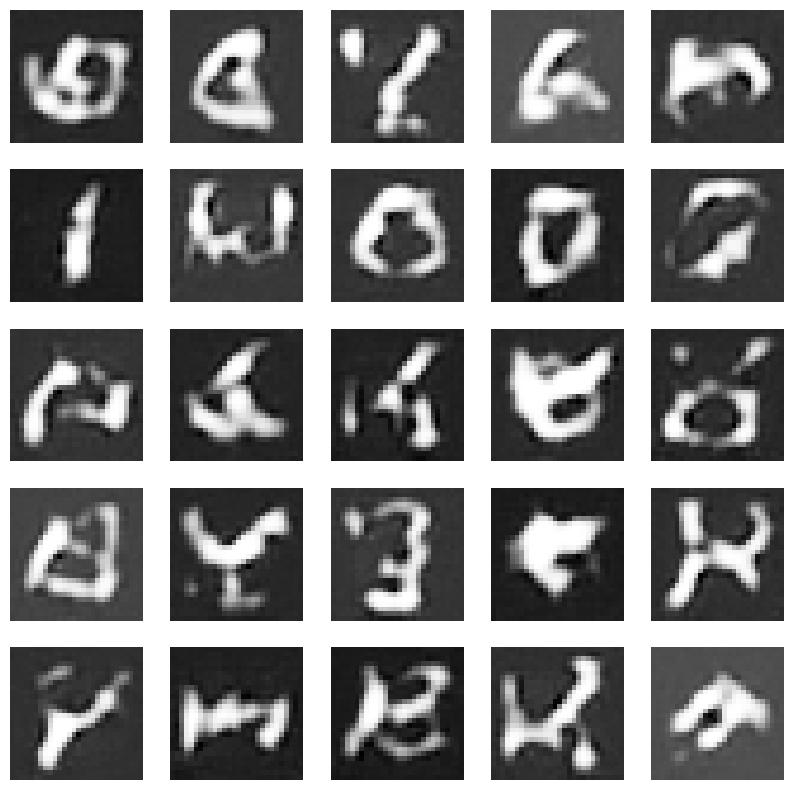

4/4 [==============================] - 0s 44ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 817915.3451
Kernel Inception Distance: -79.4229
Epoch 1 Batch 0/659
D Loss Real: 0.6139, D Accuracy Real: 0.6541
D Loss Fake: 0.5108, D Accuracy Fake: 0.7924
G Loss: 1.6594, G Accuracy: 0.2132
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 1/659
D Loss Real: 0.5361, D Accuracy Real: 0.6905
D Loss Fake: 0.4775, D Accuracy Fake: 0.7885
G Loss: 1.6553, G Accuracy: 0.2323
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 2/659
D Loss Real: 0.5395, D Accuracy Real: 0.6628
D Loss Fake: 0.5169, D Accuracy Fake: 0.7953
G Loss: 1.6437, G Accuracy: 0.2122
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 3/659
D Loss Real: 0.5888, D Accuracy Real: 0.6659
D Loss Fake: 0.5219, D Accuracy Fake: 0.7856
G Loss: 1.6315, G Acc

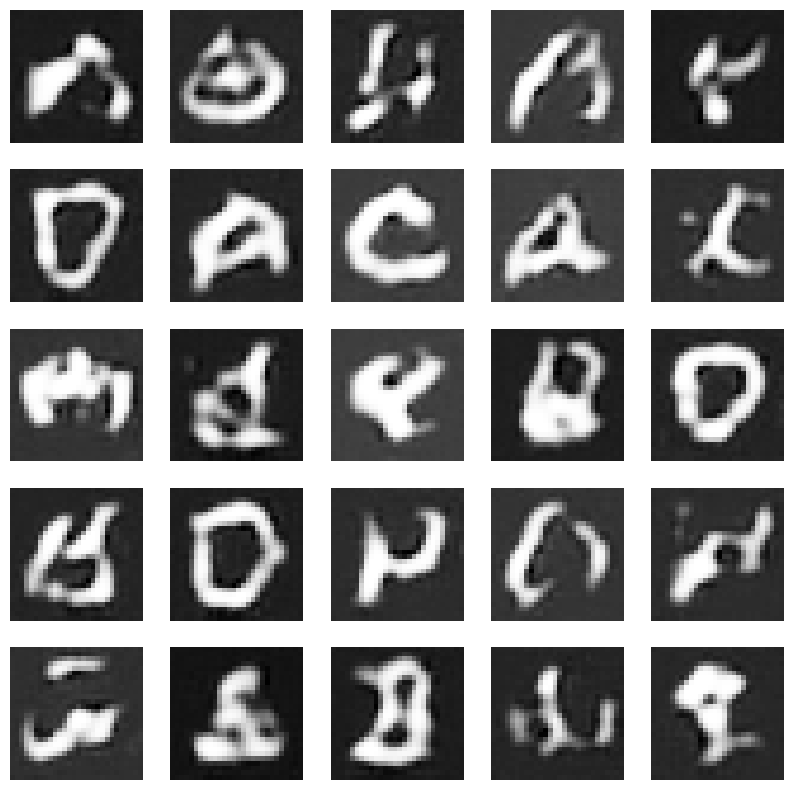

4/4 [==============================] - 0s 45ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 45ms/step
Frechet Inception Distance: 1008619.8557
Kernel Inception Distance: -114.5405
Epoch 1 Batch 100/659
D Loss Real: 0.5743, D Accuracy Real: 0.6510
D Loss Fake: 0.5514, D Accuracy Fake: 0.7677
G Loss: 1.5712, G Accuracy: 0.2411
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 101/659
D Loss Real: 0.5056, D Accuracy Real: 0.6699
D Loss Fake: 0.5067, D Accuracy Fake: 0.7921
G Loss: 1.6671, G Accuracy: 0.2050
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 102/659
D Loss Real: 0.5880, D Accuracy Real: 0.6847
D Loss Fake: 0.4896, D Accuracy Fake: 0.7722
G Loss: 1.5721, G Accuracy: 0.2467
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 103/659
D Loss Real: 0.5220, D Accuracy Real: 0.6513
D Loss Fake: 0.5316, D Accuracy Fake: 0.7972
G Loss: 1.6

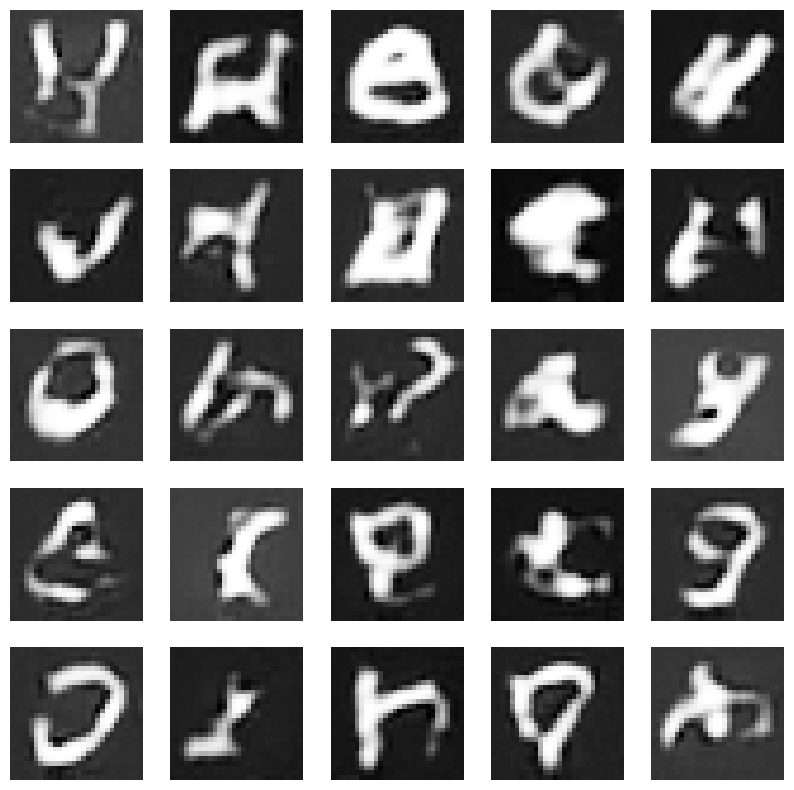

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 948654.2099
Kernel Inception Distance: -115.2466
Epoch 1 Batch 200/659
D Loss Real: 0.5975, D Accuracy Real: 0.6475
D Loss Fake: 0.5358, D Accuracy Fake: 0.7774
G Loss: 1.5911, G Accuracy: 0.2215
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 201/659
D Loss Real: 0.5288, D Accuracy Real: 0.6831
D Loss Fake: 0.4774, D Accuracy Fake: 0.7910
G Loss: 1.7019, G Accuracy: 0.2210
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 202/659
D Loss Real: 0.5741, D Accuracy Real: 0.6550
D Loss Fake: 0.5307, D Accuracy Fake: 0.7832
G Loss: 1.6269, G Accuracy: 0.2063
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 203/659
D Loss Real: 0.5819, D Accuracy Real: 0.6727
D Loss Fake: 0.5131, D Accuracy Fake: 0.7780
G Loss: 1.60

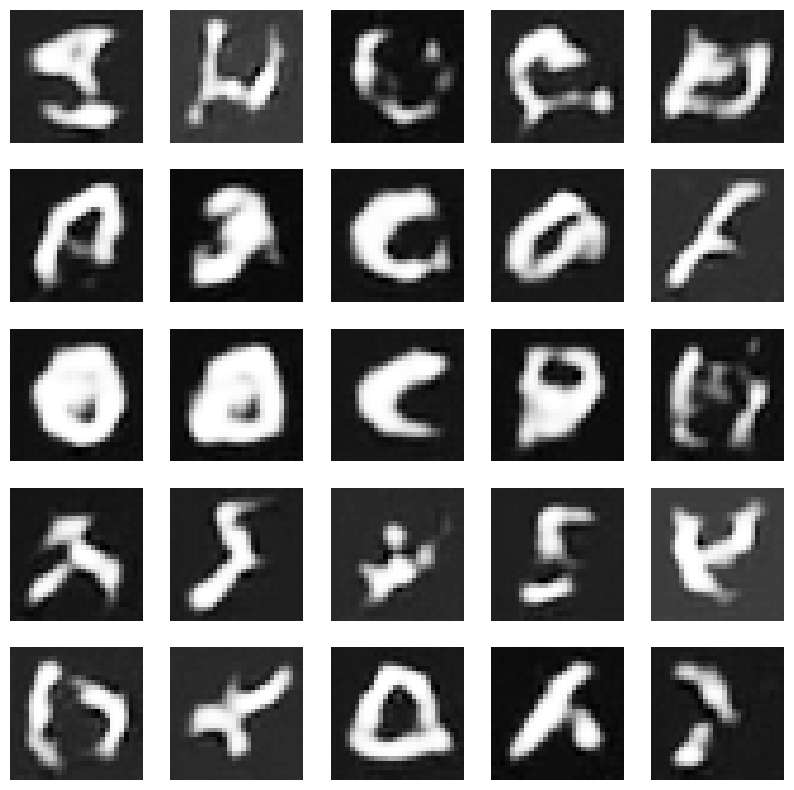

4/4 [==============================] - 0s 42ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 44ms/step
Frechet Inception Distance: 977727.3957
Kernel Inception Distance: -136.1929
Epoch 1 Batch 300/659
D Loss Real: 0.5409, D Accuracy Real: 0.7077
D Loss Fake: 0.4481, D Accuracy Fake: 0.7968
G Loss: 1.6147, G Accuracy: 0.2408
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 301/659
D Loss Real: 0.5575, D Accuracy Real: 0.6642
D Loss Fake: 0.5210, D Accuracy Fake: 0.7922
G Loss: 1.5613, G Accuracy: 0.1997
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 302/659
D Loss Real: 0.5413, D Accuracy Real: 0.6873
D Loss Fake: 0.4590, D Accuracy Fake: 0.8051
G Loss: 1.8106, G Accuracy: 0.1987
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 303/659
D Loss Real: 0.5907, D Accuracy Real: 0.6897
D Loss Fake: 0.5053, D Accuracy Fake: 0.7726
G Loss: 1.52

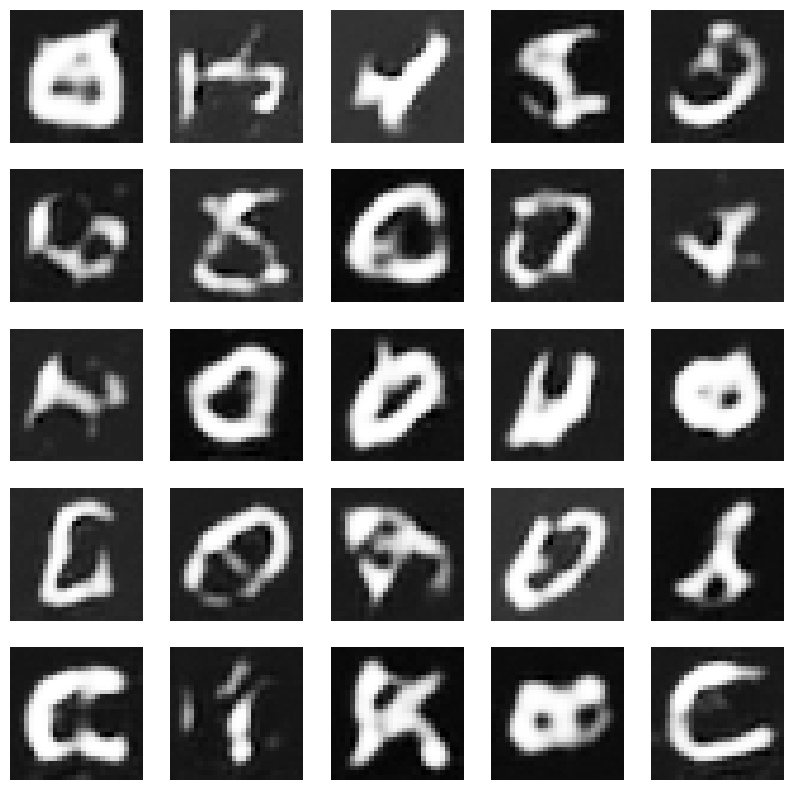

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 1000508.6246
Kernel Inception Distance: -138.2803
Epoch 1 Batch 400/659
D Loss Real: 0.5864, D Accuracy Real: 0.6433
D Loss Fake: 0.5660, D Accuracy Fake: 0.7672
G Loss: 1.5095, G Accuracy: 0.2112
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 401/659
D Loss Real: 0.5781, D Accuracy Real: 0.6835
D Loss Fake: 0.4500, D Accuracy Fake: 0.7843
G Loss: 1.6948, G Accuracy: 0.2217
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 402/659
D Loss Real: 0.5671, D Accuracy Real: 0.6934
D Loss Fake: 0.5173, D Accuracy Fake: 0.7667
G Loss: 1.5466, G Accuracy: 0.2378
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 403/659
D Loss Real: 0.5179, D Accuracy Real: 0.6612
D Loss Fake: 0.5084, D Accuracy Fake: 0.7956
G Loss: 1.6

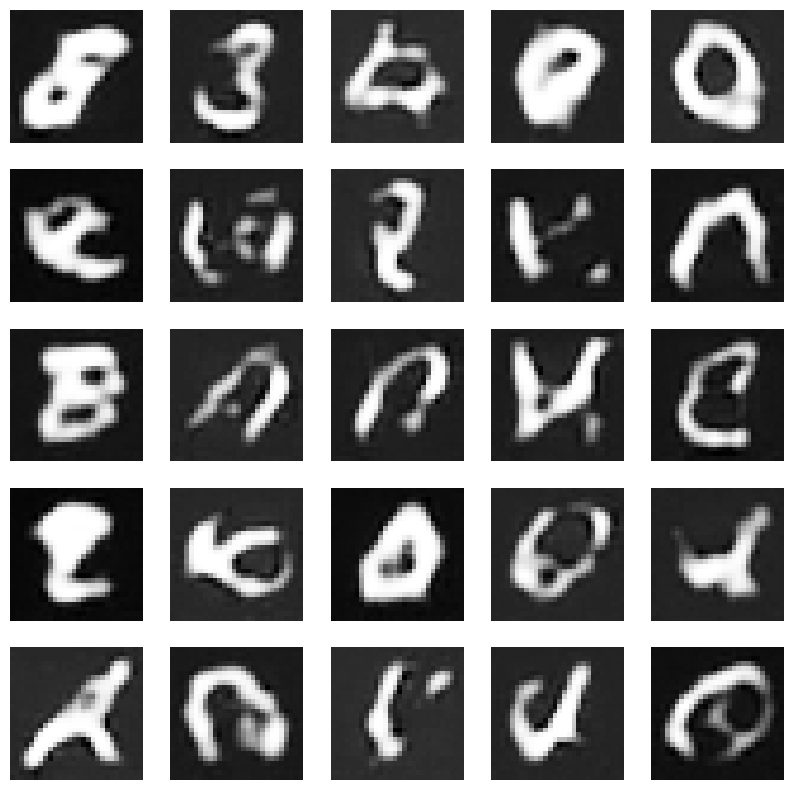

4/4 [==============================] - 0s 44ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 953613.5896
Kernel Inception Distance: -129.4727
Epoch 1 Batch 500/659
D Loss Real: 0.5796, D Accuracy Real: 0.6838
D Loss Fake: 0.4895, D Accuracy Fake: 0.7765
G Loss: 1.5840, G Accuracy: 0.2212
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 501/659
D Loss Real: 0.5182, D Accuracy Real: 0.6874
D Loss Fake: 0.4745, D Accuracy Fake: 0.7973
G Loss: 1.6859, G Accuracy: 0.2341
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 502/659
D Loss Real: 0.6076, D Accuracy Real: 0.6763
D Loss Fake: 0.5177, D Accuracy Fake: 0.7672
G Loss: 1.4907, G Accuracy: 0.2406
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 503/659
D Loss Real: 0.5537, D Accuracy Real: 0.6840
D Loss Fake: 0.4750, D Accuracy Fake: 0.7848
G Loss: 1.57

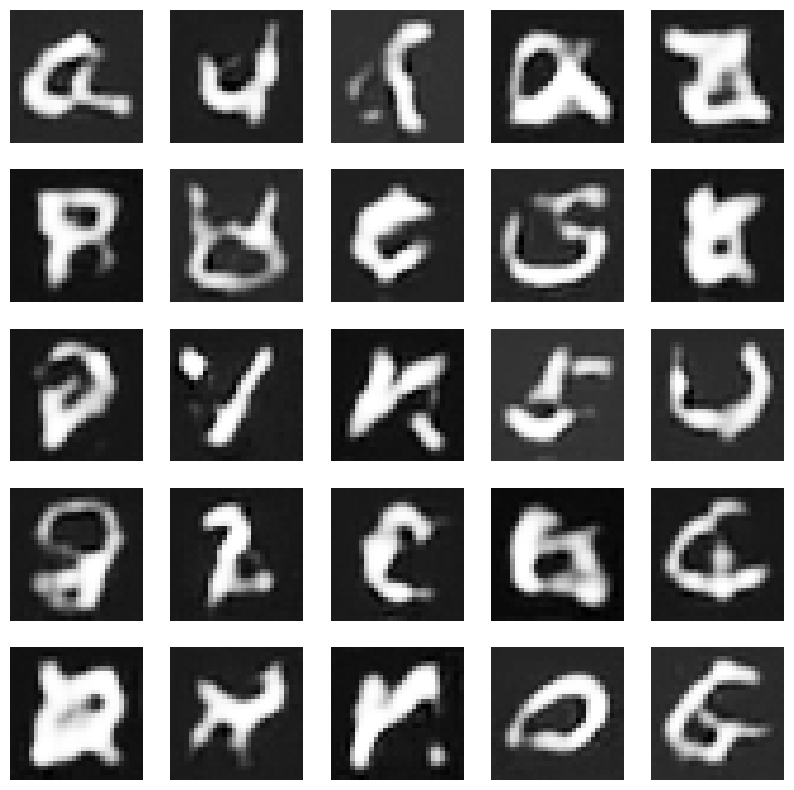

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 1000824.3016
Kernel Inception Distance: -129.3828
Epoch 1 Batch 600/659
D Loss Real: 0.6058, D Accuracy Real: 0.7055
D Loss Fake: 0.4162, D Accuracy Fake: 0.8010
G Loss: 1.6729, G Accuracy: 0.2307
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 601/659
D Loss Real: 0.5372, D Accuracy Real: 0.7184
D Loss Fake: 0.4831, D Accuracy Fake: 0.7849
G Loss: 1.6417, G Accuracy: 0.2333
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 602/659
D Loss Real: 0.5971, D Accuracy Real: 0.6487
D Loss Fake: 0.5538, D Accuracy Fake: 0.7781
G Loss: 1.5739, G Accuracy: 0.1898
4/4 [==============================] - 0s 4ms/step
Epoch 1 Batch 603/659
D Loss Real: 0.5621, D Accuracy Real: 0.7027
D Loss Fake: 0.4329, D Accuracy Fake: 0.7975
G Loss: 1.6

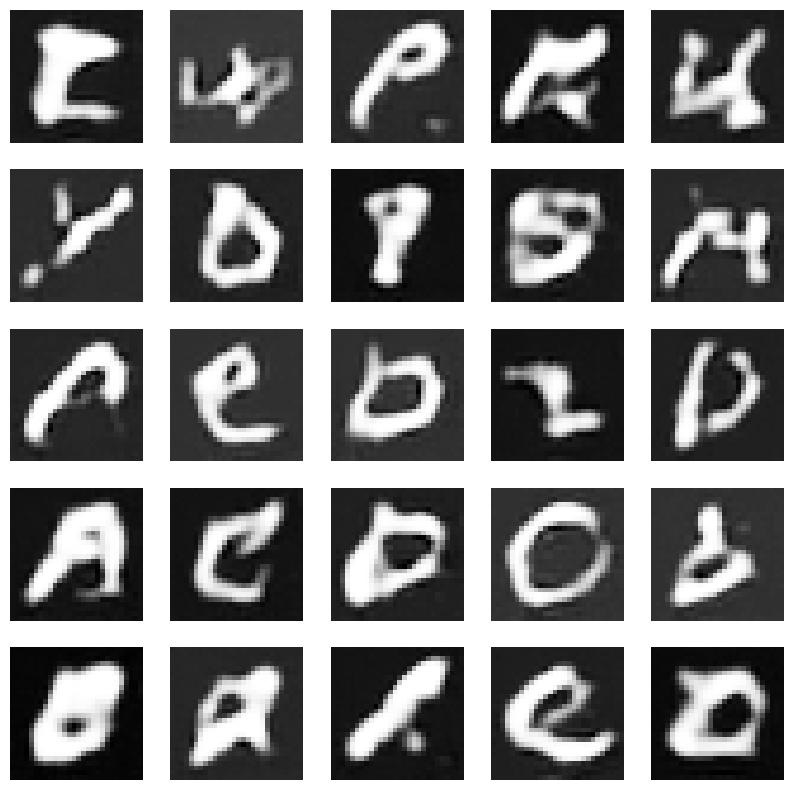

4/4 [==============================] - 0s 42ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 822209.9127
Kernel Inception Distance: -99.6143
Epoch 2 Batch 0/659
D Loss Real: 0.5963, D Accuracy Real: 0.7111
D Loss Fake: 0.4243, D Accuracy Fake: 0.7872
G Loss: 1.5061, G Accuracy: 0.1987
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 1/659
D Loss Real: 0.5949, D Accuracy Real: 0.6888
D Loss Fake: 0.5121, D Accuracy Fake: 0.7715
G Loss: 1.4183, G Accuracy: 0.2967
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 2/659
D Loss Real: 0.5060, D Accuracy Real: 0.6104
D Loss Fake: 0.5777, D Accuracy Fake: 0.7908
G Loss: 1.6954, G Accuracy: 0.1548
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 3/659
D Loss Real: 0.5935, D Accuracy Real: 0.7363
D Loss Fake: 0.3951, D Accuracy Fake: 0.7954
G Loss: 1.4785, G Acc

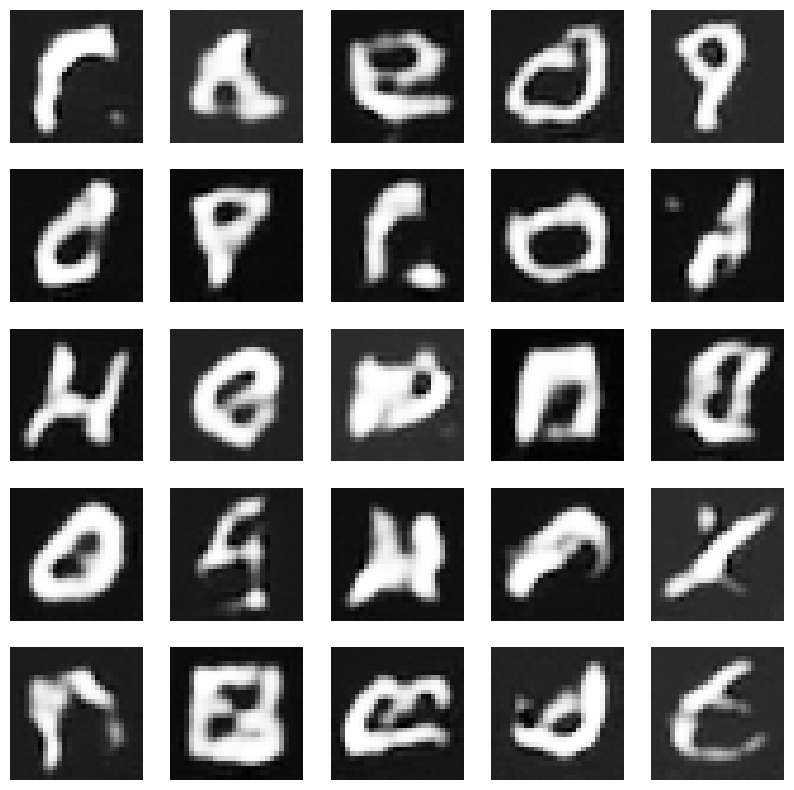

4/4 [==============================] - 0s 44ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 1040389.5099
Kernel Inception Distance: -126.7124
Epoch 2 Batch 100/659
D Loss Real: 0.5336, D Accuracy Real: 0.7024
D Loss Fake: 0.4809, D Accuracy Fake: 0.7890
G Loss: 1.6652, G Accuracy: 0.2395
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 101/659
D Loss Real: 0.5241, D Accuracy Real: 0.6816
D Loss Fake: 0.4804, D Accuracy Fake: 0.8052
G Loss: 1.6881, G Accuracy: 0.1801
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 102/659
D Loss Real: 0.6440, D Accuracy Real: 0.6917
D Loss Fake: 0.4758, D Accuracy Fake: 0.7719
G Loss: 1.6084, G Accuracy: 0.2466
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 103/659
D Loss Real: 0.5767, D Accuracy Real: 0.6653
D Loss Fake: 0.5223, D Accuracy Fake: 0.7835
G Loss: 1.6

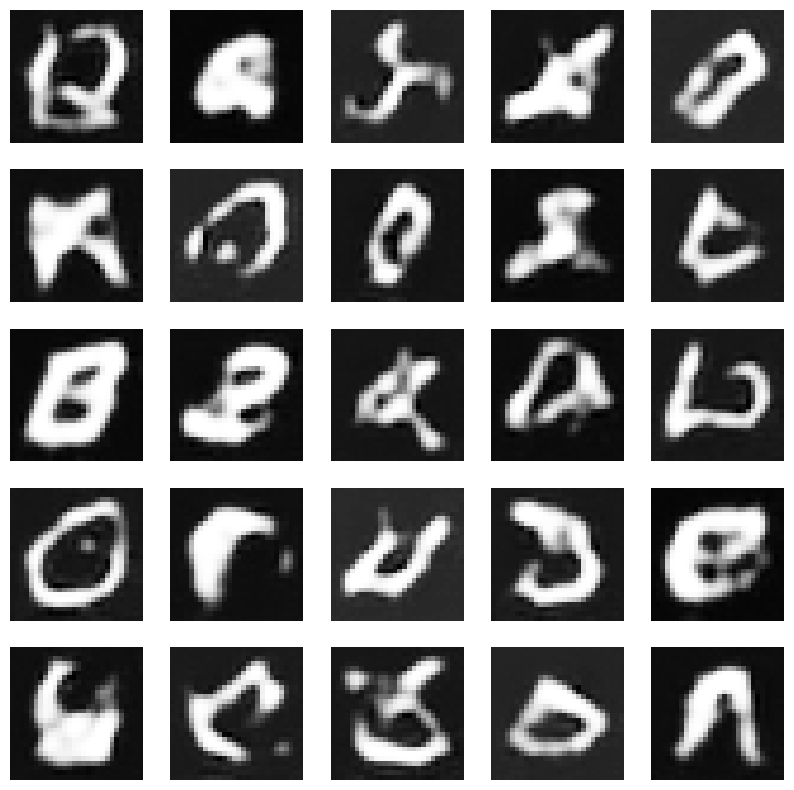

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 953713.1734
Kernel Inception Distance: -138.3472
Epoch 2 Batch 200/659
D Loss Real: 0.6111, D Accuracy Real: 0.6706
D Loss Fake: 0.4979, D Accuracy Fake: 0.7778
G Loss: 1.5646, G Accuracy: 0.2359
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 201/659
D Loss Real: 0.5502, D Accuracy Real: 0.6675
D Loss Fake: 0.5249, D Accuracy Fake: 0.7927
G Loss: 1.6895, G Accuracy: 0.1840
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 202/659
D Loss Real: 0.5126, D Accuracy Real: 0.7260
D Loss Fake: 0.4203, D Accuracy Fake: 0.8095
G Loss: 1.7982, G Accuracy: 0.2181
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 203/659
D Loss Real: 0.6095, D Accuracy Real: 0.6771
D Loss Fake: 0.5298, D Accuracy Fake: 0.7708
G Loss: 1.52

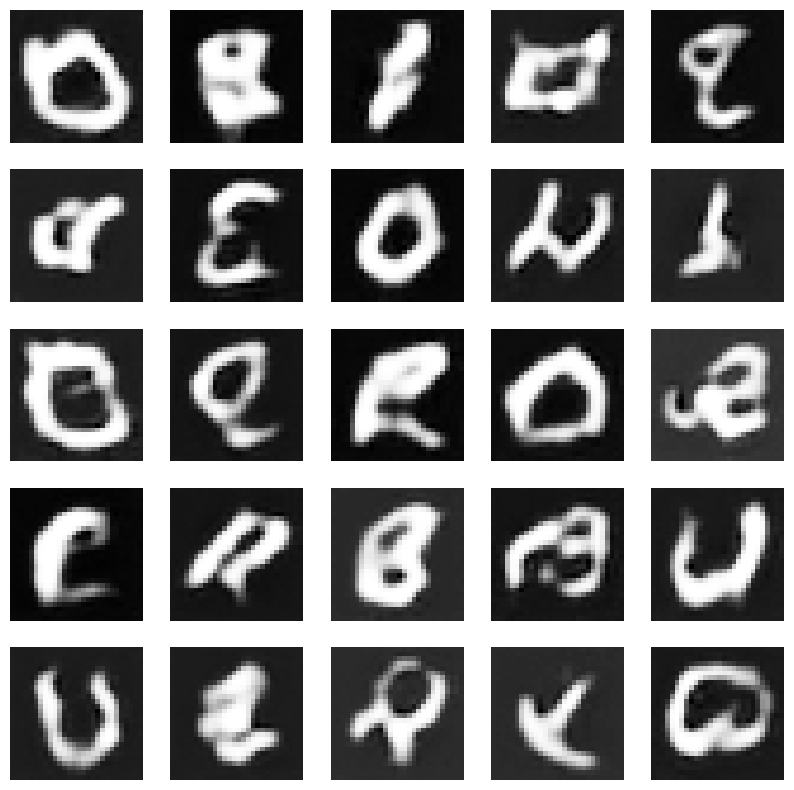

4/4 [==============================] - 0s 45ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 42ms/step
Frechet Inception Distance: 977643.1634
Kernel Inception Distance: -151.2969
Epoch 2 Batch 300/659
D Loss Real: 0.5395, D Accuracy Real: 0.6670
D Loss Fake: 0.4904, D Accuracy Fake: 0.7885
G Loss: 1.5052, G Accuracy: 0.1613
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 301/659
D Loss Real: 0.5412, D Accuracy Real: 0.7423
D Loss Fake: 0.4044, D Accuracy Fake: 0.8166
G Loss: 1.5828, G Accuracy: 0.2184
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 302/659
D Loss Real: 0.5402, D Accuracy Real: 0.7317
D Loss Fake: 0.4700, D Accuracy Fake: 0.7813
G Loss: 1.5298, G Accuracy: 0.2635
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 303/659
D Loss Real: 0.4775, D Accuracy Real: 0.7157
D Loss Fake: 0.4546, D Accuracy Fake: 0.8127
G Loss: 1.62

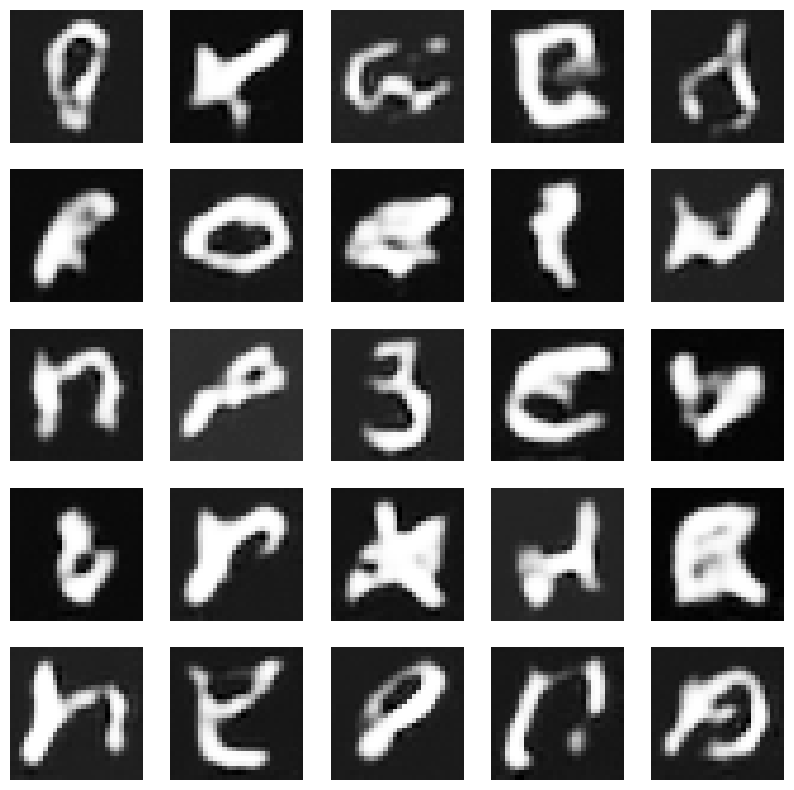

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 42ms/step
Frechet Inception Distance: 1235414.6119
Kernel Inception Distance: -220.3970
Epoch 2 Batch 400/659
D Loss Real: 0.5419, D Accuracy Real: 0.6737
D Loss Fake: 0.4869, D Accuracy Fake: 0.8151
G Loss: 1.7063, G Accuracy: 0.2119
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 401/659
D Loss Real: 0.6032, D Accuracy Real: 0.7106
D Loss Fake: 0.4590, D Accuracy Fake: 0.7789
G Loss: 1.4080, G Accuracy: 0.2358
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 402/659
D Loss Real: 0.5728, D Accuracy Real: 0.6549
D Loss Fake: 0.5233, D Accuracy Fake: 0.8024
G Loss: 1.5174, G Accuracy: 0.1884
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 403/659
D Loss Real: 0.5831, D Accuracy Real: 0.7152
D Loss Fake: 0.4054, D Accuracy Fake: 0.7950
G Loss: 1.3

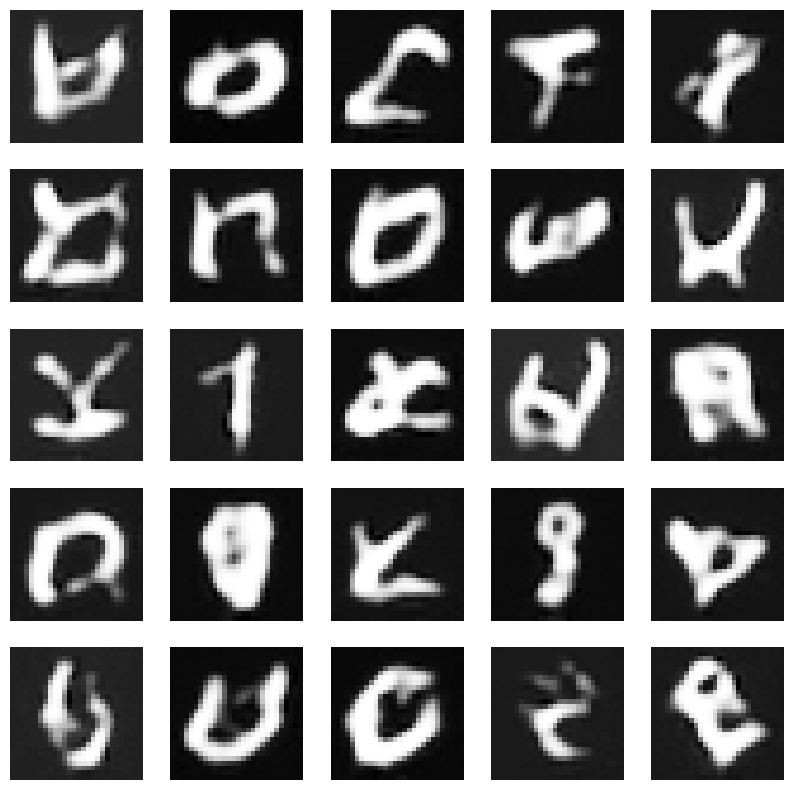

4/4 [==============================] - 0s 44ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 1180664.5421
Kernel Inception Distance: -216.5669
Epoch 2 Batch 500/659
D Loss Real: 0.5290, D Accuracy Real: 0.7054
D Loss Fake: 0.4434, D Accuracy Fake: 0.8092
G Loss: 1.8012, G Accuracy: 0.1816
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 501/659
D Loss Real: 0.5809, D Accuracy Real: 0.7275
D Loss Fake: 0.4472, D Accuracy Fake: 0.7792
G Loss: 1.4115, G Accuracy: 0.2283
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 502/659
D Loss Real: 0.4933, D Accuracy Real: 0.7074
D Loss Fake: 0.4593, D Accuracy Fake: 0.8320
G Loss: 1.7879, G Accuracy: 0.2156
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 503/659
D Loss Real: 0.5780, D Accuracy Real: 0.6851
D Loss Fake: 0.4723, D Accuracy Fake: 0.7960
G Loss: 1.6

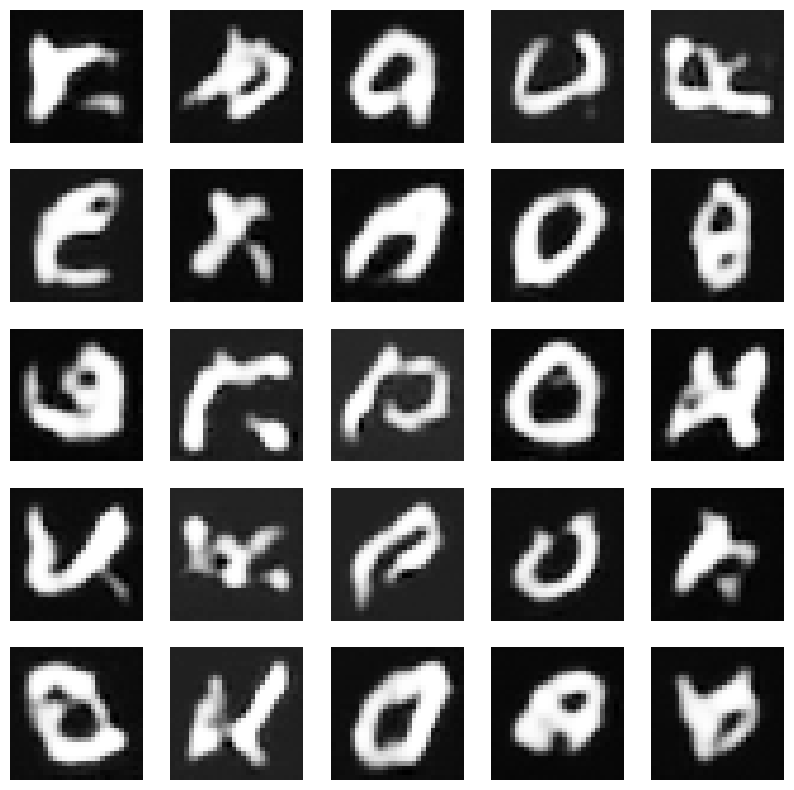

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 1055754.1261
Kernel Inception Distance: -163.6172
Epoch 2 Batch 600/659
D Loss Real: 0.5570, D Accuracy Real: 0.7309
D Loss Fake: 0.4528, D Accuracy Fake: 0.8087
G Loss: 1.3341, G Accuracy: 0.2210
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 601/659
D Loss Real: 0.4654, D Accuracy Real: 0.7310
D Loss Fake: 0.4323, D Accuracy Fake: 0.8211
G Loss: 1.5474, G Accuracy: 0.1526
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 602/659
D Loss Real: 0.5522, D Accuracy Real: 0.7443
D Loss Fake: 0.4131, D Accuracy Fake: 0.8224
G Loss: 1.4955, G Accuracy: 0.2122
4/4 [==============================] - 0s 4ms/step
Epoch 2 Batch 603/659
D Loss Real: 0.5339, D Accuracy Real: 0.7197
D Loss Fake: 0.5058, D Accuracy Fake: 0.7861
G Loss: 1.4

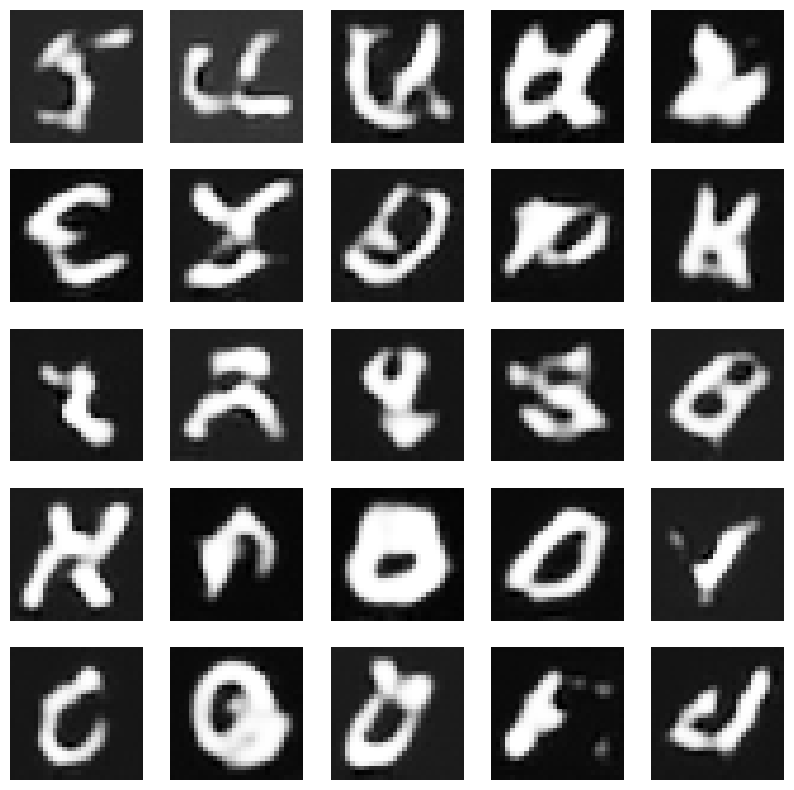

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 972058.2559
Kernel Inception Distance: -149.5830
Epoch 3 Batch 0/659
D Loss Real: 0.5742, D Accuracy Real: 0.7173
D Loss Fake: 0.4625, D Accuracy Fake: 0.7840
G Loss: 1.7279, G Accuracy: 0.2214
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 1/659
D Loss Real: 0.5210, D Accuracy Real: 0.7176
D Loss Fake: 0.4680, D Accuracy Fake: 0.7917
G Loss: 1.5748, G Accuracy: 0.1871
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 2/659
D Loss Real: 0.5758, D Accuracy Real: 0.6993
D Loss Fake: 0.4700, D Accuracy Fake: 0.7986
G Loss: 1.8455, G Accuracy: 0.2407
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 3/659
D Loss Real: 0.5621, D Accuracy Real: 0.6887
D Loss Fake: 0.5054, D Accuracy Fake: 0.7722
G Loss: 1.6148, G Ac

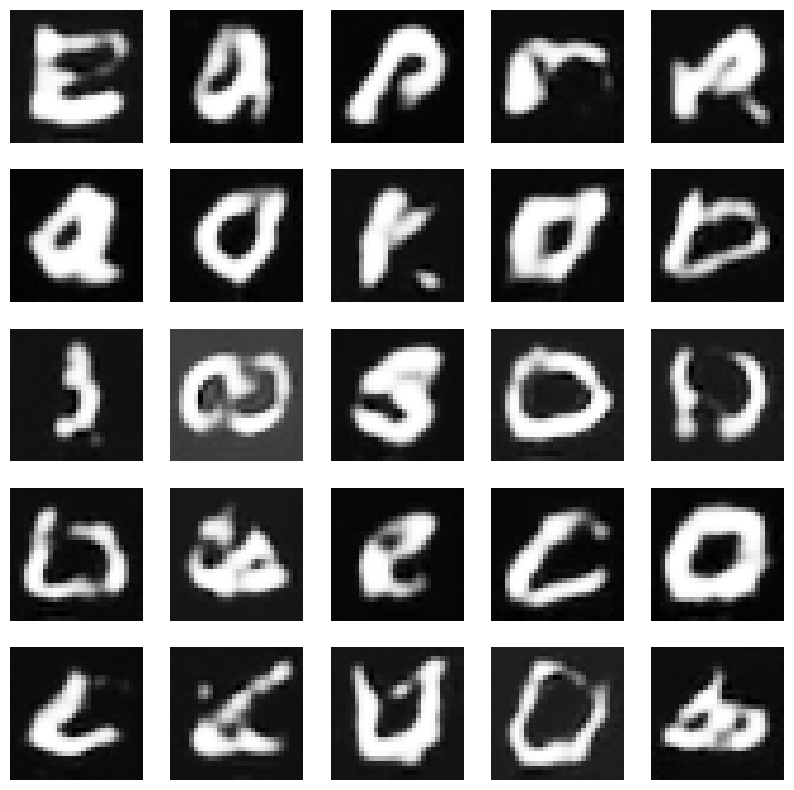

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 1057863.2683
Kernel Inception Distance: -175.0449
Epoch 3 Batch 100/659
D Loss Real: 0.5109, D Accuracy Real: 0.6985
D Loss Fake: 0.5227, D Accuracy Fake: 0.7881
G Loss: 1.6763, G Accuracy: 0.1969
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 101/659
D Loss Real: 0.5844, D Accuracy Real: 0.7176
D Loss Fake: 0.4305, D Accuracy Fake: 0.7951
G Loss: 1.4230, G Accuracy: 0.1888
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 102/659
D Loss Real: 0.4950, D Accuracy Real: 0.7452
D Loss Fake: 0.4161, D Accuracy Fake: 0.8278
G Loss: 1.5640, G Accuracy: 0.1956
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 103/659
D Loss Real: 0.5248, D Accuracy Real: 0.7357
D Loss Fake: 0.4239, D Accuracy Fake: 0.8061
G Loss: 1.6

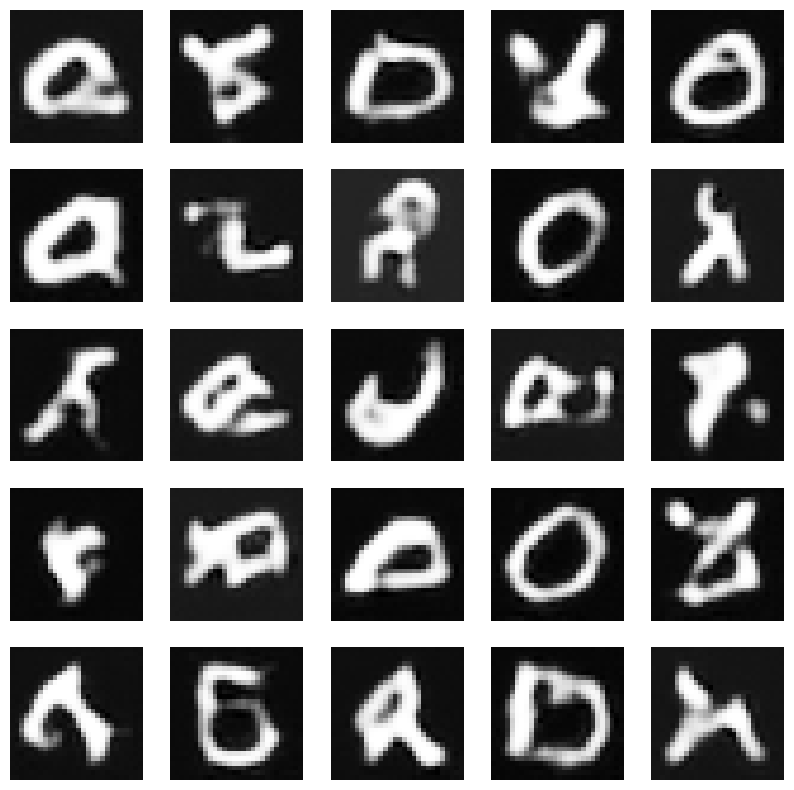

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 44ms/step
Frechet Inception Distance: 1395222.2952
Kernel Inception Distance: -242.5459
Epoch 3 Batch 200/659
D Loss Real: 0.5198, D Accuracy Real: 0.6904
D Loss Fake: 0.4664, D Accuracy Fake: 0.8090
G Loss: 1.8128, G Accuracy: 0.1789
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 201/659
D Loss Real: 0.6637, D Accuracy Real: 0.7193
D Loss Fake: 0.4802, D Accuracy Fake: 0.7520
G Loss: 1.3291, G Accuracy: 0.2384
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 202/659
D Loss Real: 0.4887, D Accuracy Real: 0.7009
D Loss Fake: 0.4678, D Accuracy Fake: 0.8345
G Loss: 1.6881, G Accuracy: 0.1945
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 203/659
D Loss Real: 0.5806, D Accuracy Real: 0.7082
D Loss Fake: 0.4173, D Accuracy Fake: 0.7996
G Loss: 1.6

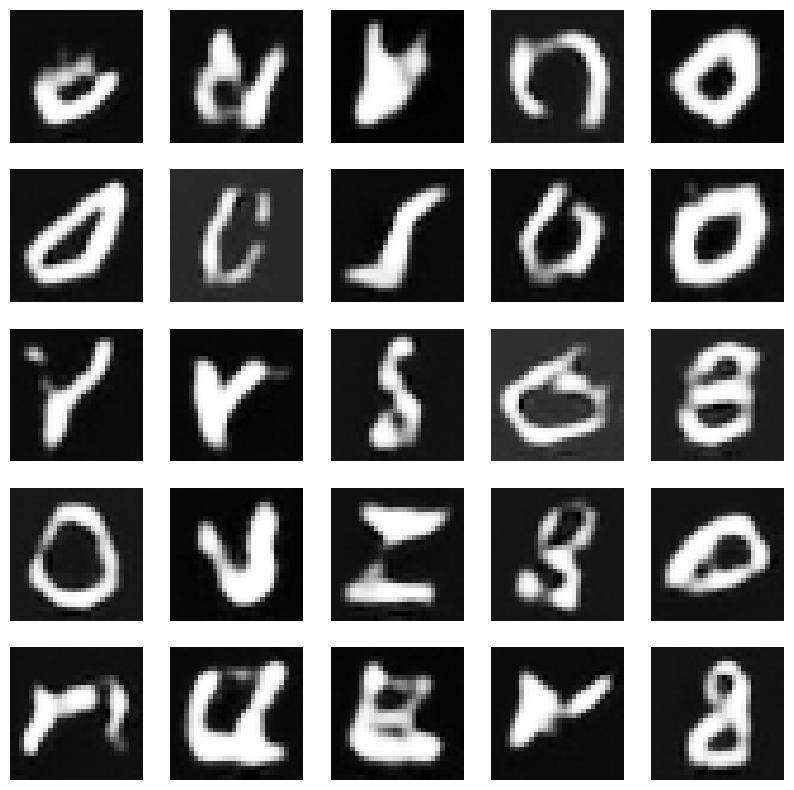

4/4 [==============================] - 0s 45ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 42ms/step
Frechet Inception Distance: 1095724.8785
Kernel Inception Distance: -164.9712
Epoch 3 Batch 300/659
D Loss Real: 0.6192, D Accuracy Real: 0.7209
D Loss Fake: 0.4388, D Accuracy Fake: 0.7943
G Loss: 1.5066, G Accuracy: 0.2673
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 301/659
D Loss Real: 0.5432, D Accuracy Real: 0.6750
D Loss Fake: 0.5550, D Accuracy Fake: 0.7764
G Loss: 1.5374, G Accuracy: 0.2227
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 302/659
D Loss Real: 0.5385, D Accuracy Real: 0.6988
D Loss Fake: 0.4526, D Accuracy Fake: 0.8022
G Loss: 1.6546, G Accuracy: 0.2142
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 303/659
D Loss Real: 0.5563, D Accuracy Real: 0.7160
D Loss Fake: 0.4802, D Accuracy Fake: 0.7861
G Loss: 1.7

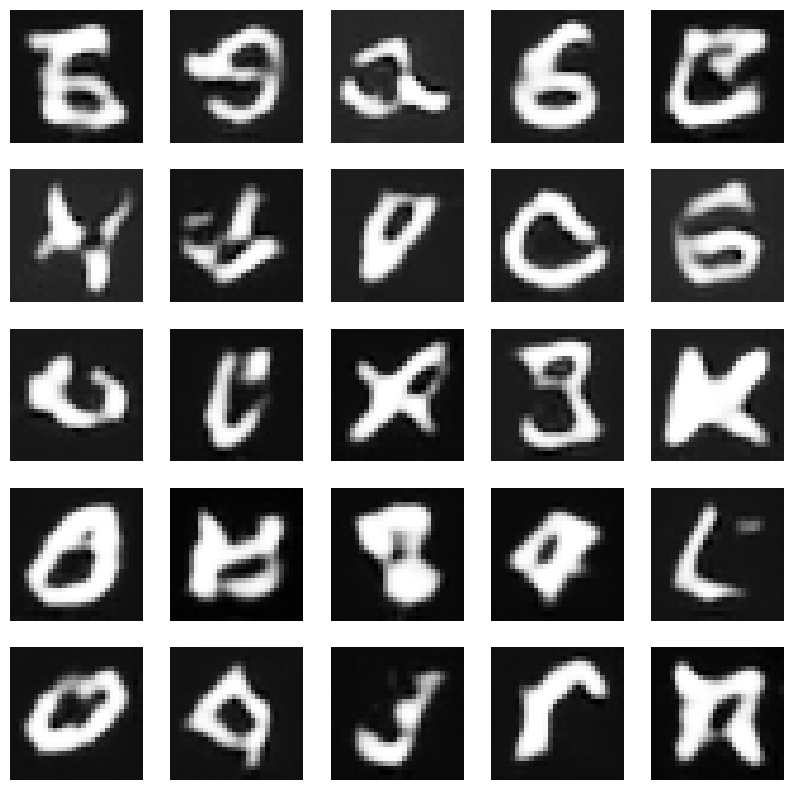

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 44ms/step
Frechet Inception Distance: 1158891.0588
Kernel Inception Distance: -195.1426
Epoch 3 Batch 400/659
D Loss Real: 0.5417, D Accuracy Real: 0.7281
D Loss Fake: 0.4382, D Accuracy Fake: 0.8071
G Loss: 1.4624, G Accuracy: 0.1898
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 401/659
D Loss Real: 0.4963, D Accuracy Real: 0.7614
D Loss Fake: 0.4148, D Accuracy Fake: 0.8091
G Loss: 1.5367, G Accuracy: 0.2471
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 402/659
D Loss Real: 0.5836, D Accuracy Real: 0.6587
D Loss Fake: 0.5703, D Accuracy Fake: 0.7846
G Loss: 1.6115, G Accuracy: 0.1515
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 403/659
D Loss Real: 0.5956, D Accuracy Real: 0.7095
D Loss Fake: 0.3995, D Accuracy Fake: 0.8234
G Loss: 1.4

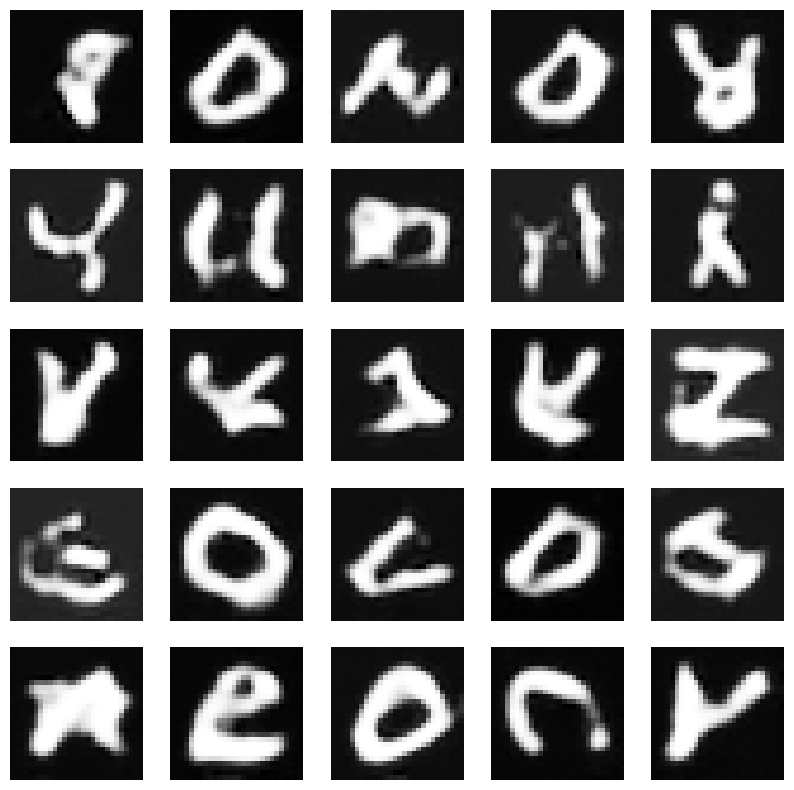

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 42ms/step
Frechet Inception Distance: 1391592.1180
Kernel Inception Distance: -254.1631
Epoch 3 Batch 500/659
D Loss Real: 0.5140, D Accuracy Real: 0.6851
D Loss Fake: 0.4916, D Accuracy Fake: 0.8020
G Loss: 1.7688, G Accuracy: 0.1825
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 501/659
D Loss Real: 0.5066, D Accuracy Real: 0.7749
D Loss Fake: 0.4042, D Accuracy Fake: 0.8203
G Loss: 1.5098, G Accuracy: 0.1681
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 502/659
D Loss Real: 0.5275, D Accuracy Real: 0.7690
D Loss Fake: 0.4001, D Accuracy Fake: 0.8255
G Loss: 1.6006, G Accuracy: 0.2499
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 503/659
D Loss Real: 0.5018, D Accuracy Real: 0.7014
D Loss Fake: 0.5005, D Accuracy Fake: 0.8062
G Loss: 1.8

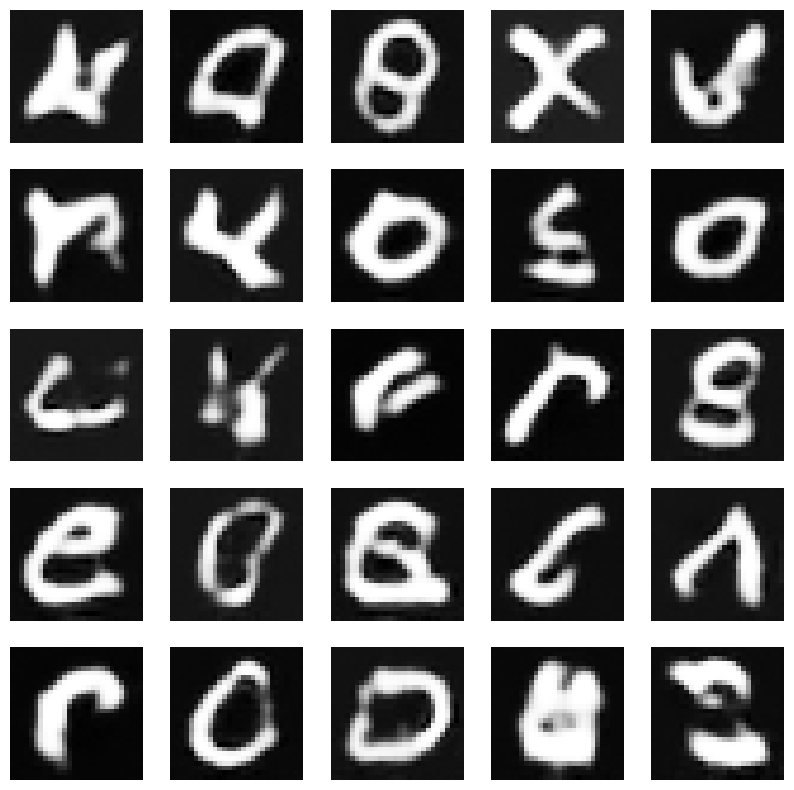

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 1019261.4898
Kernel Inception Distance: -143.7539
Epoch 3 Batch 600/659
D Loss Real: 0.5912, D Accuracy Real: 0.7209
D Loss Fake: 0.4853, D Accuracy Fake: 0.7852
G Loss: 1.6101, G Accuracy: 0.2567
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 601/659
D Loss Real: 0.5327, D Accuracy Real: 0.6622
D Loss Fake: 0.5038, D Accuracy Fake: 0.8142
G Loss: 1.7293, G Accuracy: 0.1614
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 602/659
D Loss Real: 0.6607, D Accuracy Real: 0.7149
D Loss Fake: 0.4451, D Accuracy Fake: 0.7767
G Loss: 1.6048, G Accuracy: 0.2468
4/4 [==============================] - 0s 4ms/step
Epoch 3 Batch 603/659
D Loss Real: 0.4923, D Accuracy Real: 0.7270
D Loss Fake: 0.4771, D Accuracy Fake: 0.7953
G Loss: 1.5

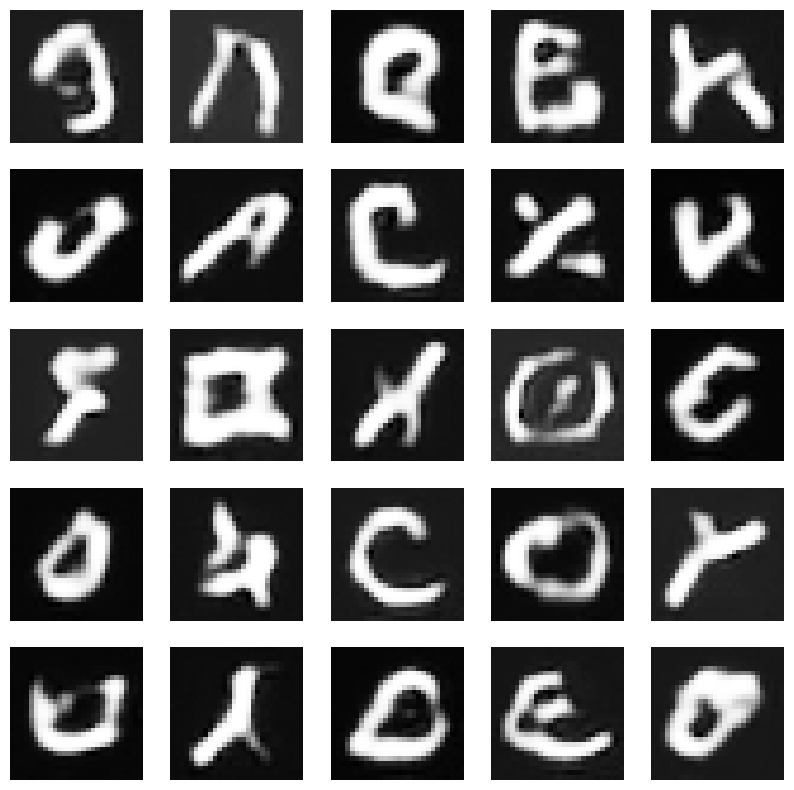

4/4 [==============================] - 0s 45ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 931697.2867
Kernel Inception Distance: -125.7246
Epoch 4 Batch 0/659
D Loss Real: 0.5770, D Accuracy Real: 0.7124
D Loss Fake: 0.4471, D Accuracy Fake: 0.8033
G Loss: 1.9727, G Accuracy: 0.2018
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 1/659
D Loss Real: 0.5931, D Accuracy Real: 0.6972
D Loss Fake: 0.4814, D Accuracy Fake: 0.7808
G Loss: 1.7466, G Accuracy: 0.2342
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 2/659
D Loss Real: 0.5618, D Accuracy Real: 0.6862
D Loss Fake: 0.4788, D Accuracy Fake: 0.7915
G Loss: 1.6100, G Accuracy: 0.1965
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 3/659
D Loss Real: 0.5722, D Accuracy Real: 0.7009
D Loss Fake: 0.4516, D Accuracy Fake: 0.8120
G Loss: 1.7768, G Ac

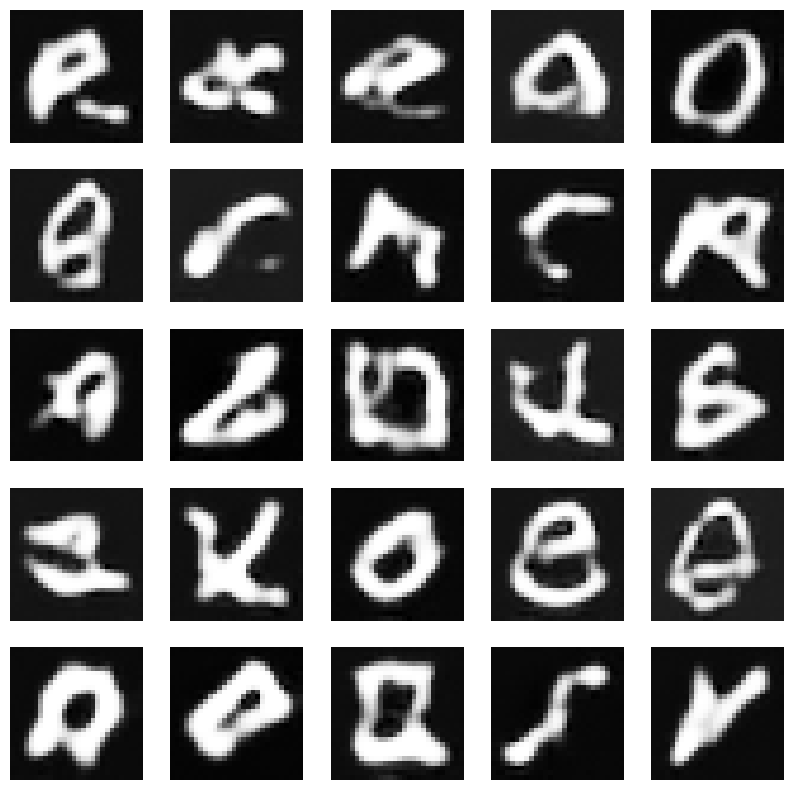

4/4 [==============================] - 0s 44ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 42ms/step
Frechet Inception Distance: 1052485.7538
Kernel Inception Distance: -166.8345
Epoch 4 Batch 100/659
D Loss Real: 0.5153, D Accuracy Real: 0.7313
D Loss Fake: 0.4353, D Accuracy Fake: 0.8173
G Loss: 1.6411, G Accuracy: 0.1913
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 101/659
D Loss Real: 0.5443, D Accuracy Real: 0.7238
D Loss Fake: 0.4445, D Accuracy Fake: 0.8095
G Loss: 1.6445, G Accuracy: 0.1813
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 102/659
D Loss Real: 0.5333, D Accuracy Real: 0.7228
D Loss Fake: 0.4437, D Accuracy Fake: 0.8116
G Loss: 1.7949, G Accuracy: 0.2210
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 103/659
D Loss Real: 0.5875, D Accuracy Real: 0.6856
D Loss Fake: 0.4841, D Accuracy Fake: 0.7872
G Loss: 1.5

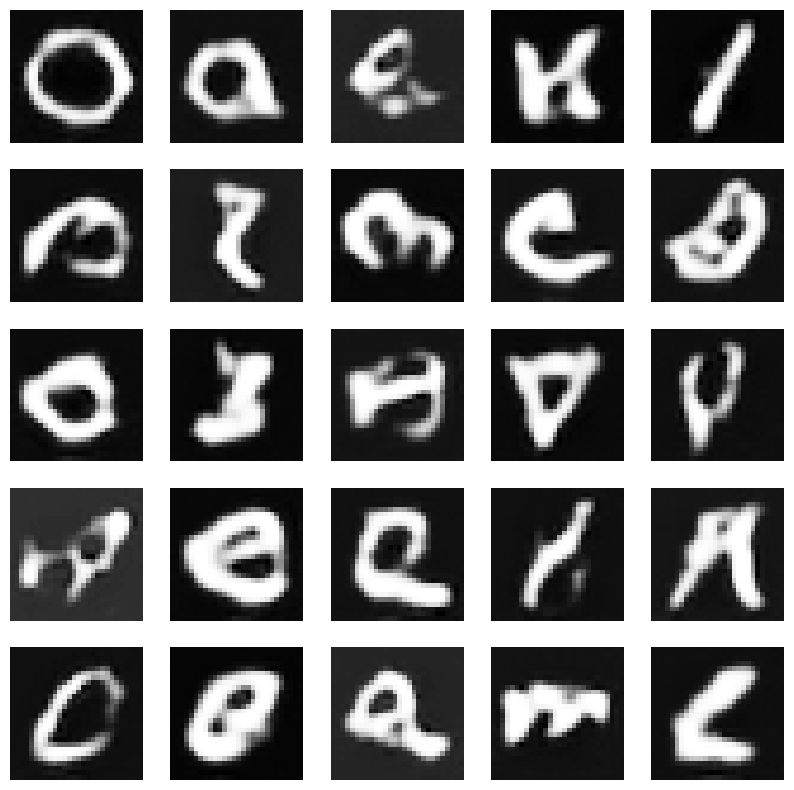

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 44ms/step
Frechet Inception Distance: 1145960.1636
Kernel Inception Distance: -196.6064
Epoch 4 Batch 200/659
D Loss Real: 0.4865, D Accuracy Real: 0.6851
D Loss Fake: 0.5195, D Accuracy Fake: 0.8059
G Loss: 1.6991, G Accuracy: 0.2160
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 201/659
D Loss Real: 0.5687, D Accuracy Real: 0.7182
D Loss Fake: 0.4224, D Accuracy Fake: 0.8151
G Loss: 1.7617, G Accuracy: 0.1996
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 202/659
D Loss Real: 0.5841, D Accuracy Real: 0.7168
D Loss Fake: 0.4725, D Accuracy Fake: 0.7935
G Loss: 1.7257, G Accuracy: 0.2278
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 203/659
D Loss Real: 0.5702, D Accuracy Real: 0.6848
D Loss Fake: 0.4650, D Accuracy Fake: 0.8063
G Loss: 1.7

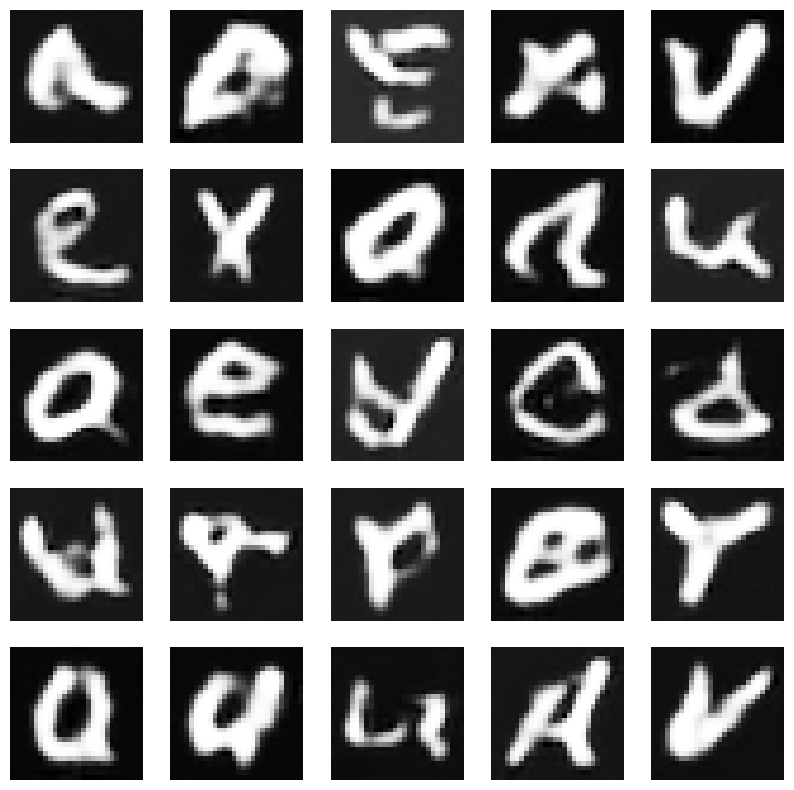

4/4 [==============================] - 0s 42ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 43ms/step
Frechet Inception Distance: 1330991.0116
Kernel Inception Distance: -236.8843
Epoch 4 Batch 300/659
D Loss Real: 0.5159, D Accuracy Real: 0.7363
D Loss Fake: 0.4522, D Accuracy Fake: 0.8004
G Loss: 1.6963, G Accuracy: 0.2097
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 301/659
D Loss Real: 0.5148, D Accuracy Real: 0.7405
D Loss Fake: 0.4375, D Accuracy Fake: 0.8168
G Loss: 1.5859, G Accuracy: 0.1486
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 302/659
D Loss Real: 0.6261, D Accuracy Real: 0.7081
D Loss Fake: 0.4241, D Accuracy Fake: 0.8253
G Loss: 1.4312, G Accuracy: 0.2175
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 303/659
D Loss Real: 0.5164, D Accuracy Real: 0.7238
D Loss Fake: 0.4645, D Accuracy Fake: 0.8037
G Loss: 1.4

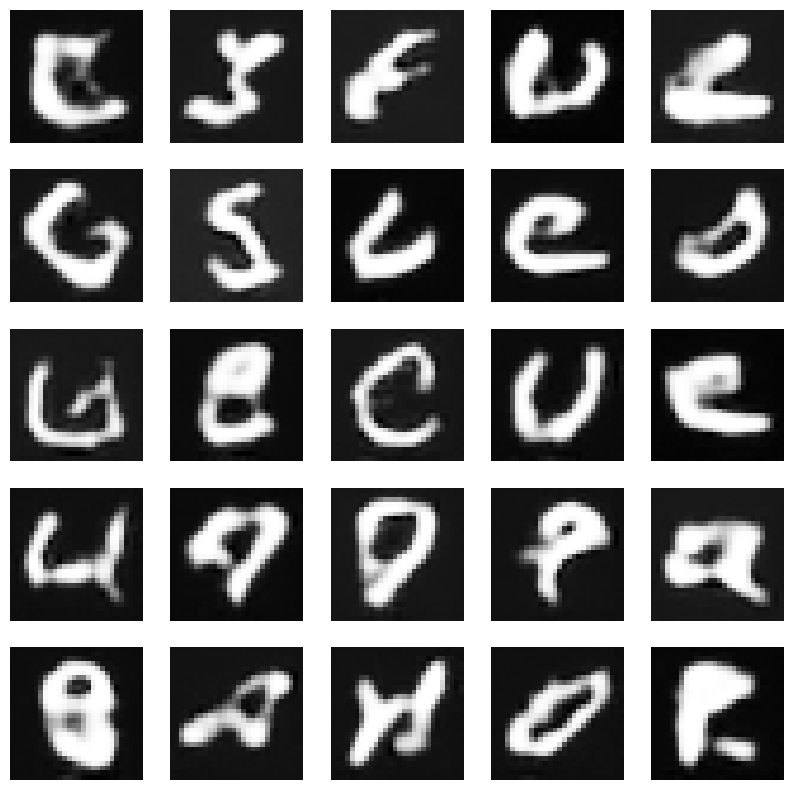

4/4 [==============================] - 0s 46ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 46ms/step
Frechet Inception Distance: 1271032.1773
Kernel Inception Distance: -227.5620
Epoch 4 Batch 400/659
D Loss Real: 0.5931, D Accuracy Real: 0.6944
D Loss Fake: 0.4373, D Accuracy Fake: 0.8244
G Loss: 1.6268, G Accuracy: 0.1591
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 401/659
D Loss Real: 0.6066, D Accuracy Real: 0.7467
D Loss Fake: 0.4331, D Accuracy Fake: 0.7835
G Loss: 1.3340, G Accuracy: 0.2846
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 402/659
D Loss Real: 0.4538, D Accuracy Real: 0.6980
D Loss Fake: 0.4952, D Accuracy Fake: 0.8195
G Loss: 1.7423, G Accuracy: 0.1699
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 403/659
D Loss Real: 0.5971, D Accuracy Real: 0.7116
D Loss Fake: 0.4276, D Accuracy Fake: 0.8087
G Loss: 1.7

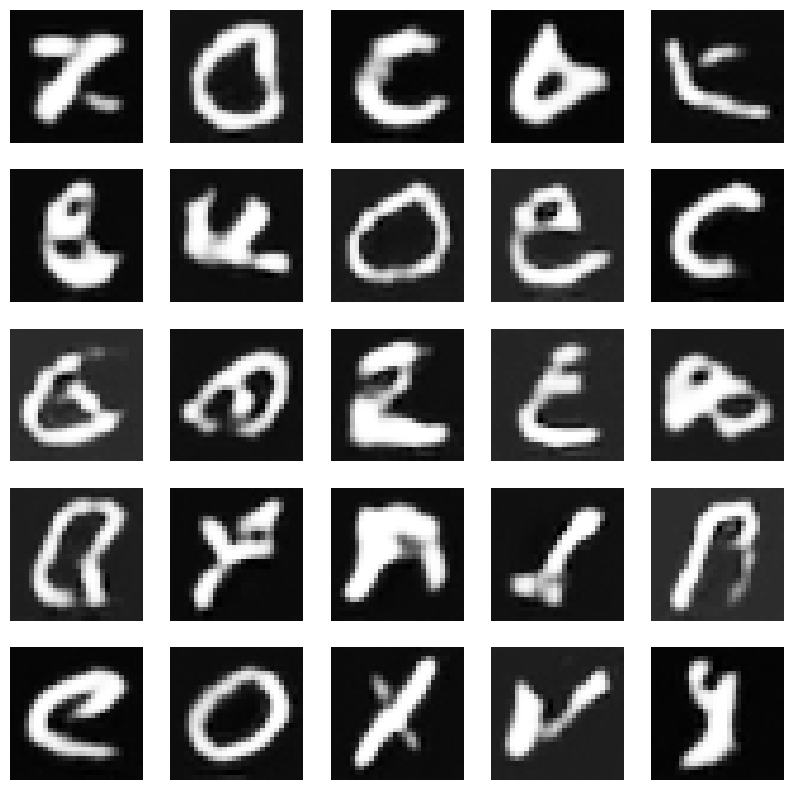

4/4 [==============================] - 0s 43ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 44ms/step
Frechet Inception Distance: 907917.1892
Kernel Inception Distance: -128.2290
Epoch 4 Batch 500/659
D Loss Real: 0.5936, D Accuracy Real: 0.7193
D Loss Fake: 0.4607, D Accuracy Fake: 0.7753
G Loss: 1.4517, G Accuracy: 0.2430
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 501/659
D Loss Real: 0.5601, D Accuracy Real: 0.6726
D Loss Fake: 0.5099, D Accuracy Fake: 0.8149
G Loss: 1.7195, G Accuracy: 0.1939
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 502/659
D Loss Real: 0.5890, D Accuracy Real: 0.7084
D Loss Fake: 0.4326, D Accuracy Fake: 0.7967
G Loss: 1.7342, G Accuracy: 0.2231
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 503/659
D Loss Real: 0.5347, D Accuracy Real: 0.7343
D Loss Fake: 0.4619, D Accuracy Fake: 0.7880
G Loss: 1.53

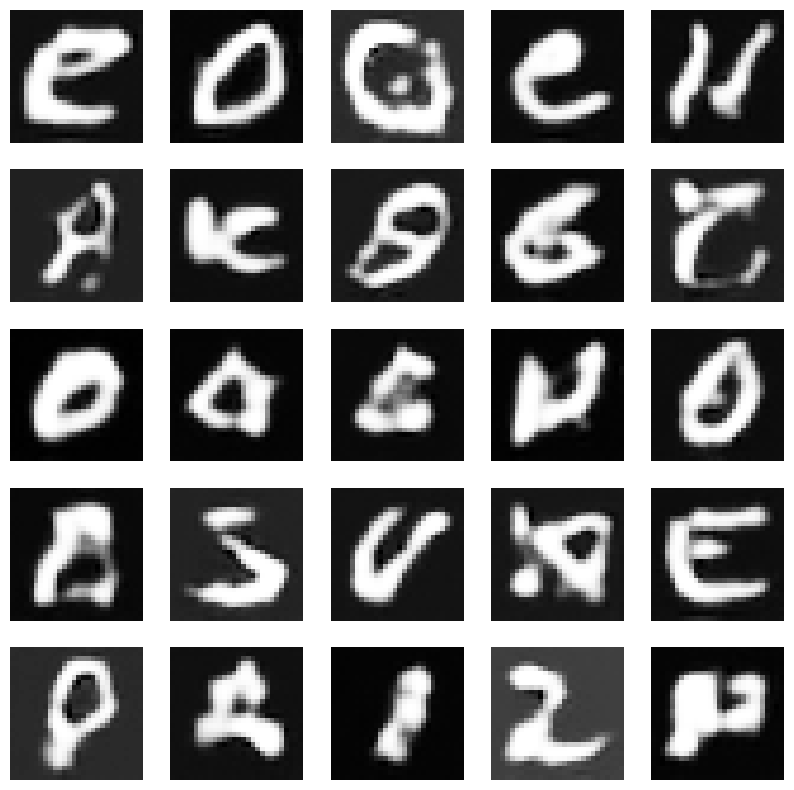

4/4 [==============================] - 0s 44ms/step
Shape of real_features after reshape: (4440, 2048)
Shape of fake_features after reshape: (128, 2048)
4/4 [==============================] - 0s 44ms/step
Frechet Inception Distance: 941731.0745
Kernel Inception Distance: -144.3394
Epoch 4 Batch 600/659
D Loss Real: 0.4761, D Accuracy Real: 0.7342
D Loss Fake: 0.4887, D Accuracy Fake: 0.8026
G Loss: 1.4538, G Accuracy: 0.2121
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 601/659
D Loss Real: 0.5186, D Accuracy Real: 0.6800
D Loss Fake: 0.4521, D Accuracy Fake: 0.8387
G Loss: 1.6968, G Accuracy: 0.1576
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 602/659
D Loss Real: 0.6120, D Accuracy Real: 0.7640
D Loss Fake: 0.4238, D Accuracy Fake: 0.7889
G Loss: 1.4314, G Accuracy: 0.2747
4/4 [==============================] - 0s 4ms/step
Epoch 4 Batch 603/659
D Loss Real: 0.5208, D Accuracy Real: 0.6681
D Loss Fake: 0.5448, D Accuracy Fake: 0.8164
G Loss: 1.74

In [14]:

# GAN model parameters
noise_dim = 100
width, height, channel = 28, 28, 1
batch_size = 64
epochs = 5
steps_per_epoch = images.shape[0] // batch_size
gen_optimizer = Adam(0.0002, 0.5)
disc_optimizer = Adam(0.0002, 0.5)

# Load pre-trained Inception model
inception_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(75, 75, 3))
inception_model.trainable = False

# Generator model
def buildGenerator():
    model = Sequential()
    model.add(Dense(1024, input_dim=noise_dim))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Dense(6272))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Reshape((7, 7, 128)))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (2, 2), padding='same', kernel_initializer=RandomNormal(0, 0.02)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(0.2))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(channel, (3, 3), padding='same', activation="tanh", kernel_initializer=RandomNormal(0, 0.02)))
    return model

# Discriminator model
def buildDiscriminator():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=2, padding='same', kernel_initializer=RandomNormal(0, 0.02), input_shape=(width, height, channel)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (5, 5), strides=2, kernel_initializer=RandomNormal(0, 0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=disc_optimizer, metrics=['accuracy'])
    return model

# Function to build and compile the GAN model
def build_gan(generator, discriminator):
    noise = Input(shape=(noise_dim,))
    fake_data = generator(noise)
    discriminator.trainable = False
    output = discriminator(fake_data)
    gan = Model(noise, output)
    gan.compile(loss='binary_crossentropy', optimizer=gen_optimizer, metrics=['accuracy'])
    return gan

# Function to resize images
def resize_images(images, size=(75, 75)):
    resized_images = np.array([np.array(Image.fromarray((img * 255).astype(np.uint8)).resize(size)) for img in images])
    return resized_images

# Function to preprocess images for Inception model
def preprocess_images(images):
    images = (images + 1) / 2
    images = np.repeat(images, 3, axis=-1)
    resized_images = resize_images(images)
    return preprocess_input(resized_images * 255.0)


# Function to calculate Frechet Inception Distance
def calculate_fid(real_images, generated_images):
    processed_real = preprocess_images(real_images)
    processed_fake = preprocess_images(generated_images)
    real_features = inception_model.predict(processed_real)
    fake_features = inception_model.predict(processed_fake)

    # Ensure features are 2D
    real_features = real_features.reshape(real_features.shape[0], -1)
    fake_features = fake_features.reshape(fake_features.shape[0], -1)

    print("Shape of real_features after reshape:", real_features.shape)
    print("Shape of fake_features after reshape:", fake_features.shape)

    mu_real, sigma_real = np.mean(real_features, axis=0), np.cov(real_features, rowvar=False)
    mu_fake, sigma_fake = np.mean(fake_features, axis=0), np.cov(fake_features, rowvar=False)

    ssdiff = np.sum((mu_real - mu_fake) ** 2.0)
    sqrt_sigma = sqrtm(sigma_real.dot(sigma_fake))

    # Check and correct imaginary numbers
    if np.iscomplexobj(sqrt_sigma):
        sqrt_sigma = sqrt_sigma.real

    fid = ssdiff + np.trace(sigma_real + sigma_fake - 2.0 * sqrt_sigma)
    return fid

# Function to calculate Kernel Inception Distance
def calculate_kid(real_images, generated_images):
    processed_real = preprocess_images(real_images)
    processed_fake = preprocess_images(generated_images)
    real_features = inception_model.predict(processed_real)
    fake_features = inception_model.predict(processed_fake)

    # Ensure features are 2D
    real_features = real_features.reshape(real_features.shape[0], -1)
    fake_features = fake_features.reshape(fake_features.shape[0], -1)

    real_distances = pairwise_distances(real_features, real_features, metric='euclidean')
    fake_distances = pairwise_distances(fake_features, fake_features, metric='euclidean')
    cross_distances = pairwise_distances(real_features, fake_features, metric='euclidean')

    kid = np.mean(real_distances) + np.mean(fake_distances) - 2 * np.mean(cross_distances)
    return kid

# Function to save and display images
def save_and_display_images(epoch, generator, latent_dim, save_interval=100):
    print(f"Saving and displaying images for epoch {epoch}")
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5
    fig, axs = plt.subplots(r, c, figsize=(10, 10))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    if not os.path.exists('gan_images'):
        os.makedirs('gan_images')
    fig.savefig(f"gan_images/gan_generated_image_{epoch}.png")
    plt.show()
    plt.close()

def train_gan(generator, discriminator, gan, epochs, batch_size, images, test_images):
    steps_per_epoch = images.shape[0] // batch_size
    for epoch in range(epochs):
        for batch in range(steps_per_epoch):
            # Train Discriminator
            input_gen = np.random.normal(0, 1, size=(batch_size, noise_dim))
            fake_data = generator.predict(input_gen)
            real_data = images[np.random.randint(0, images.shape[0], size=batch_size)]
            input_disc = np.concatenate((real_data, fake_data))
            label_disc = np.zeros(2 * batch_size)
            label_disc[:batch_size] = 0.9
            label_disc[batch_size:] = 0.1

            # Train on real data
            d_loss_real, _ = discriminator.train_on_batch(real_data, label_disc[:batch_size])
            # Train on fake data
            d_loss_fake, _ = discriminator.train_on_batch(fake_data, label_disc[batch_size:])

            # Update discriminator accuracy based on confidence
            predictions_real = discriminator.predict(real_data).flatten()
            predictions_fake = discriminator.predict(fake_data).flatten()
            accuracy_real = np.mean(predictions_real)
            accuracy_fake = np.mean(1 - predictions_fake)

            # Train Generator
            input_gen = np.random.normal(0, 1, size=(batch_size, noise_dim))
            label_gen = np.ones(batch_size)
            g_loss, _ = gan.train_on_batch(input_gen, label_gen)

            # Update generator accuracy based on confidence
            generated_images = generator.predict(np.random.normal(0, 1, size=(batch_size, noise_dim)))
            predictions_generated = discriminator.predict(generated_images).flatten()
            accuracy_gen = np.mean(predictions_generated)

            if batch % 100 == 0:
                save_and_display_images(epoch, generator, noise_dim)
                # Calculate metrics using test data
                generated_images = generator.predict(np.random.normal(0, 1, size=(batch_size, noise_dim)))
                fid = calculate_fid(test_images, generated_images)
                kid = calculate_kid(test_images, generated_images)
                print(f"Frechet Inception Distance: {fid:.4f}")
                print(f"Kernel Inception Distance: {kid:.4f}")

            print(f"Epoch {epoch} Batch {batch}/{steps_per_epoch}")
            print(f"D Loss Real: {d_loss_real:.4f}, D Accuracy Real: {accuracy_real:.4f}")
            print(f"D Loss Fake: {d_loss_fake:.4f}, D Accuracy Fake: {accuracy_fake:.4f}")
            print(f"G Loss: {g_loss:.4f}, G Accuracy: {accuracy_gen:.4f}")

# Initialize and compile models
generator = buildGenerator()
discriminator = buildDiscriminator()
gan = build_gan(generator, discriminator)

# Start training
train_gan(generator, discriminator, gan, epochs=5, batch_size=128, images=images, test_images=test_images)

https://towardsdatascience.com/alphabet-gan-ai-generates-english-letters-589637068808

In [15]:
# Display model architectures
print("Generator Architecture:")
generator.summary()

print("\nDiscriminator Architecture:")
discriminator.summary()


Generator Architecture:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              103424    
                                                                 
 batch_normalization_94 (Ba  (None, 1024)              4096      
 tchNormalization)                                               
                                                                 
 activation_94 (Activation)  (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 6272)              6428800   
                                                                 
 batch_normalization_95 (Ba  (None, 6272)              25088     
 tchNormalization)                                               
                                                                 
 activation_95 (Activation)  (No

## Generator Architecture

The Generator in this GAN architecture is designed to produce images from random noise. Here’s a detailed breakdown:

1. **Dense Layer (Input Layer)**
   - **Layer**: `Dense`
   - **Output Units**: 1024
   - **Input Dimension**: `noise_dim`
   - **Purpose**: Expands the input noise vector into a larger dimension.

2. **Batch Normalization**
   - **Layer**: `BatchNormalization`
   - **Momentum**: 0.8
   - **Purpose**: Normalizes activations to stabilize the learning process.

3. **Activation Layer**
   - **Layer**: `Activation`
   - **Function**: `relu`
   - **Purpose**: Applies the ReLU activation function to introduce non-linearity.

4. **Dense Layer**
   - **Layer**: `Dense`
   - **Output Units**: 6272
   - **Purpose**: Further expands the transformed noise vector into a size suitable for reshaping into an image.

5. **Batch Normalization**
   - **Layer**: `BatchNormalization`
   - **Momentum**: 0.8

6. **Activation Layer**
   - **Layer**: `Activation`
   - **Function**: `relu`

7. **Reshape Layer**
   - **Layer**: `Reshape`
   - **Target Shape**: (7, 7, 128)
   - **Purpose**: Reshapes the output into a 3D tensor to be processed by convolutional layers.

8. **UpSampling2D Layer**
   - **Layer**: `UpSampling2D`
   - **Size**: (2, 2)
   - **Purpose**: Upsamples the image to 14x14 dimensions.

9. **Convolutional Layer**
   - **Layer**: `Conv2D`
   - **Filters**: 64
   - **Kernel Size**: (2, 2)
   - **Padding**: `same`
   - **Kernel Initializer**: `RandomNormal(0, 0.02)`
   - **Purpose**: Applies convolution to refine features.

10. **Batch Normalization**
    - **Layer**: `BatchNormalization`
    - **Momentum**: 0.8

11. **LeakyReLU Activation**
    - **Layer**: `LeakyReLU`
    - **Alpha**: 0.2
    - **Purpose**: Introduces non-linearity while allowing small gradients for inactive units.

12. **UpSampling2D Layer**
    - **Layer**: `UpSampling2D`
    - **Size**: (2, 2)
    - **Purpose**: Upsamples the image to 28x28 dimensions.

13. **Final Convolutional Layer**
    - **Layer**: `Conv2D`
    - **Filters**: `channel` (1 for grayscale images)
    - **Kernel Size**: (3, 3)
    - **Padding**: `same`
    - **Activation**: `tanh`
    - **Kernel Initializer**: `RandomNormal(0, 0.02)`
    - **Purpose**: Produces the final image with pixel values in the range of [-1, 1].

## Discriminator Architecture

The Discriminator's role is to classify images as real or fake. Here’s how it’s structured:

1. **Convolutional Layer (Input Layer)**
   - **Layer**: `Conv2D`
   - **Filters**: 64
   - **Kernel Size**: (5, 5)
   - **Strides**: 2
   - **Padding**: `same`
   - **Kernel Initializer**: `RandomNormal(0, 0.02)`
   - **Input Shape**: (width, height, channel) (28x28x1 for grayscale images)
   - **Purpose**: Extracts features from the input image.

2. **LeakyReLU Activation**
   - **Layer**: `LeakyReLU`
   - **Alpha**: 0.2

3. **Convolutional Layer**
   - **Layer**: `Conv2D`
   - **Filters**: 128
   - **Kernel Size**: (5, 5)
   - **Strides**: 2
   - **Kernel Initializer**: `RandomNormal(0, 0.02)`
   - **Purpose**: Further extracts features and reduces spatial dimensions.

4. **LeakyReLU Activation**
   - **Layer**: `LeakyReLU`
   - **Alpha**: 0.2

5. **Flatten Layer**
   - **Layer**: `Flatten`
   - **Purpose**: Flattens the 3D tensor into a 1D vector for the fully connected layers.

6. **Dense Layer**
   - **Layer**: `Dense`
   - **Units**: 256
   - **Purpose**: Fully connected layer to combine features.

7. **LeakyReLU Activation**
   - **Layer**: `LeakyReLU`
   - **Alpha**: 0.2

8. **Dropout Layer**
   - **Layer**: `Dropout`
   - **Rate**: 0.5
   - **Purpose**: Reduces overfitting by randomly dropping units during training.

9. **Final Dense Layer**
   - **Layer**: `Dense`
   - **Units**: 1
   - **Activation**: `sigmoid`
   - **Purpose**: Outputs a probability that the input image is real.

10. **Compilation**
    - **Loss Function**: `binary_crossentropy`
    - **Optimizer**: `disc_optimizer`
    - **Metrics**: `accuracy`
    - **Purpose**: Compiles the model with the specified loss function and optimizer.

<h2>Step 4: tuning and model improvement</h2>

Now i will be using keras tuner random search to tune the hyperparameters

## Reasons i use Kernel inception distance

1. **Unbiased Estimator**:
   - KID is an unbiased estimator, providing a more accurate assessment of the true distance between real and generated image distributions, especially for smaller sample sizes.

2. **Computational Efficiency**:
   - KID is generally more computationally efficient than FID, particularly for larger datasets, as it does not require estimating and inverting covariance matrices.

3. **Sensitivity to Differences**:
   - KID is often more sensitive to subtle differences between real and generated images, making it better at detecting small improvements in model performance.

4. **No Distribution Assumptions**:
   - Unlike FID, which assumes that feature embeddings follow a multivariate Gaussian distribution, KID makes no such assumptions, making it more robust across different types of data distributions.

5. **Interpretable Units**:
   - KID scores are in more interpretable units compared to IS and FID, where lower KID scores directly indicate more similar distributions between real and generated images.

6. **Consistency Across Architectures**:
   - KID tends to be more consistent across different neural network architectures used for feature extraction, while IS and FID can be more sensitive to the specific architecture employed.

7. **Better for Model Comparison**:
   - Due to its properties, KID is often considered more reliable for comparing different generative models, especially when dealing with diverse image types or smaller datasets.

8. **Captures Higher-Order Statistics**:
   - KID can capture higher-order statistics of the distributions, potentially providing a more comprehensive comparison than FID, which only considers first and second-order statistics.

In [16]:
# Define hyperparameters
noise_dim = 100
width, height, channel = 28, 28, 1
batch_size = 64
epochs = 5

# Load pre-trained Inception model
inception_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(75, 75, 3))
inception_model.trainable = False

def resize_images(images, size=(75, 75)):
    resized_images = np.array([np.array(Image.fromarray((img * 255).astype(np.uint8)).resize(size)) for img in images])
    return resized_images

def preprocess_images(images):
    images = (images + 1) / 2
    images = np.repeat(images, 3, axis=-1)
    resized_images = resize_images(images)
    return preprocess_input(resized_images)

def calculate_kid(real_images, generated_images):
    processed_real = preprocess_images(real_images)
    processed_fake = preprocess_images(generated_images)
    real_features = inception_model.predict(processed_real)
    fake_features = inception_model.predict(processed_fake)

    # Ensure features are 2D
    real_features = real_features.reshape(real_features.shape[0], -1)
    fake_features = fake_features.reshape(fake_features.shape[0], -1)

    real_distances = pairwise_distances(real_features, real_features, metric='euclidean')
    fake_distances = pairwise_distances(fake_features, fake_features, metric='euclidean')
    cross_distances = pairwise_distances(real_features, fake_features, metric='euclidean')

    kid = np.mean(real_distances) + np.mean(fake_distances) - 2 * np.mean(cross_distances)
    return kid

# Define Generator model
def buildGenerator(hp):
    model = Sequential()
    model.add(Dense(hp.Int('dense_1', min_value=512, max_value=2048, step=512), input_dim=noise_dim))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Dense(7 * 7 * hp.Int('reshape_channels', min_value=64, max_value=128, step=64)))  # Fixed output size
    model.add(BatchNormalization(momentum=0.8))
    model.add(Activation("relu"))
    model.add(Reshape((7, 7, hp.Int('reshape_channels', min_value=64, max_value=128, step=64))))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(hp.Int('conv_1', min_value=32, max_value=128, step=32), (2, 2), padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(0, 0.02)))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(0.2))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(channel, (3, 3), padding='same', activation="tanh", kernel_initializer=tf.keras.initializers.RandomNormal(0, 0.02)))
    return model

# Define Discriminator model
def buildDiscriminator(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('disc_conv_1', min_value=64, max_value=128, step=64), (5, 5), strides=2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(0, 0.02), input_shape=(width, height, channel)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(hp.Int('disc_conv_2', min_value=128, max_value=256, step=64), (5, 5), strides=2, kernel_initializer=tf.keras.initializers.RandomNormal(0, 0.02)))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp.Float('disc_lr', min_value=1e-5, max_value=1e-2, sampling='log')), metrics=['accuracy'])
    return model

# Define GAN model
def build_gan(generator, discriminator):
    noise = Input(shape=(noise_dim,))
    fake_data = generator(noise)
    discriminator.trainable = False
    output = discriminator(fake_data)
    gan = Model(noise, output)
    gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002), metrics=['accuracy'])
    return gan

class GANHyperModel(kt.HyperModel):
    def build(self, hp):
        self.generator = buildGenerator(hp)
        self.discriminator = buildDiscriminator(hp)
        self.gan = build_gan(self.generator, self.discriminator)
        return self.gan

    def fit(self, hp, model, x, y, validation_data, **kwargs):
        images = x
        test_images, _ = validation_data
        best_kid = float('inf')
        for epoch in range(epochs):
            steps_per_epoch = images.shape[0] // batch_size
            for batch in range(steps_per_epoch):
                input_gen = np.random.normal(0, 1, size=(batch_size, noise_dim))
                fake_data = self.generator.predict(input_gen)
                real_data = images[np.random.randint(0, images.shape[0], size=batch_size)]
                input_disc = np.concatenate((real_data, fake_data))
                label_disc = np.zeros(2 * batch_size)
                label_disc[:batch_size] = 0.9
                label_disc[batch_size:] = 0.1

                d_loss_real, _ = self.discriminator.train_on_batch(real_data, label_disc[:batch_size])
                d_loss_fake, _ = self.discriminator.train_on_batch(fake_data, label_disc[batch_size:])

                input_gen = np.random.normal(0, 1, size=(batch_size, noise_dim))
                label_gen = np.ones(batch_size)
                g_loss, _ = self.gan.train_on_batch(input_gen, label_gen)

                if batch % 100 == 0:
                    generated_images = self.generator.predict(np.random.normal(0, 1, size=(batch_size, noise_dim)))
                    kid = calculate_kid(test_images, generated_images)
                    if kid < best_kid:
                        best_kid = kid
                        # Save the best model
                        self.generator.save(f'best_generator_{hp.values}.h5')
                    print(f"Epoch {epoch} Batch {batch}/{steps_per_epoch}")
                    print(f"KID: {kid:.4f}")

        return best_kid

# Initialize Keras Tuner
tuner = kt.RandomSearch(
    GANHyperModel(),
    objective=kt.Objective("kid", direction="min"),
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='gan_tuning'
)

# Perform hyperparameter search
sample_size = int(0.2 * images.shape[0])  # Using 20% of the dataset
tuner.search(x=images[:sample_size], y=np.zeros((sample_size, 1)), epochs=3, validation_data=(test_images[:sample_size], np.zeros((sample_size, 1))))

# Save the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 06m 43s]
kid: -34.91562271118164

Best kid So Far: -34.91562271118164
Total elapsed time: 00h 40m 40s


https://medium.com/@siraj.hatoum/gan-hyperparameter-tuning-with-keras-tuner-81e00ad1d6be

play with optimizers and parameters

<h2>Step 5: evaluation</h2>

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 7ms/step
Epoch 17/20 - Discriminator Loss: [0.3199544847011566, 0.0] - Generator Loss: [1.30315101146698, 0.203125]
2/2 [==============================] - 0s 7ms/step
Epoch 18/20 - Discriminator Loss: [0.32770878076553345, 0.0] - Generator Loss: [2.237950325012207, 0.015625]
2/2 [==============================] - 0s 7ms/step
Epoch 19/20 - Discriminator Loss: [0.3425373435020447, 0.0] - Generator Loss: [0.7862015962600708, 0.46875]
2/2 [==============================] - 0s 7ms/step
Epoch 20/20 - Discriminator Loss: [0.19124598801136017, 0.0] - Generator Loss: [1.3926279544830322, 0.09375]
9/9 [==============================] - 0s 6ms/step


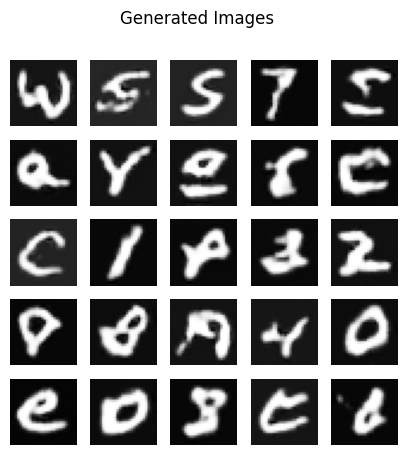

Saved 260 generated images to generated_images


In [17]:
# Define the best hyperparameters from the first section
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Rebuild the best models
best_generator = buildGenerator(best_hps)
best_discriminator = buildDiscriminator(best_hps)
best_gan = build_gan(best_generator, best_discriminator)

# Load the best generator weights
best_generator.load_weights(f'best_generator_{best_hps.values}.h5')

# Function to train the model with the best hyperparameters
def train_gan(generator, discriminator, gan, epochs, batch_size, images):
    steps_per_epoch = images.shape[0] // batch_size
    for epoch in range(epochs):
        for step in range(steps_per_epoch):
            # Train Discriminator
            real_images = images[np.random.randint(0, images.shape[0], batch_size)]
            noise = np.random.normal(0, 1, (batch_size, noise_dim))
            generated_images = generator.predict(noise)
            combined_images = np.concatenate([real_images, generated_images])
            labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            labels += 0.05 * np.random.random(labels.shape)  # Add some noise to the labels

            d_loss = discriminator.train_on_batch(combined_images, labels)

            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, noise_dim))
            misleading_labels = np.ones((batch_size, 1))
            g_loss = gan.train_on_batch(noise, misleading_labels)

        print(f"Epoch {epoch + 1}/{epochs} - Discriminator Loss: {d_loss} - Generator Loss: {g_loss}")

# Continue training the model for additional epochs
additional_epochs = 20
train_gan(best_generator, best_discriminator, best_gan, additional_epochs, batch_size, images)

# Generate 260 images
num_images = 260
noise = np.random.normal(0, 1, (num_images, noise_dim))
generated_images = best_generator.predict(noise)

# Display some generated images
def plot_images(images, n_cols, n_rows, title=None):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows))
    for i, ax in enumerate(axes.flat):
        if i < images.shape[0]:
            ax.imshow(images[i, :, :, 0], cmap='gray')
            ax.axis('off')
    if title:
        fig.suptitle(title)
    plt.show()

# Display the first 25 generated images in a 5x5 grid
plot_images(generated_images, 5, 5, title='Generated Images')

# Save the generated images
output_dir = 'generated_images'
os.makedirs(output_dir, exist_ok=True)
for i, img in enumerate(generated_images):
    img = (img * 127.5 + 127.5).astype(np.uint8)  # Rescale from [-1, 1] to [0, 255]
    img = Image.fromarray(img[:, :, 0], 'L')  # Convert to grayscale image
    img.save(os.path.join(output_dir, f'image_{i+1}.png'))

print(f"Saved {num_images} generated images to {output_dir}")

###Conclusion
Here we can see the final results of all the modelling. the results are satisfactory, with moth images looking similar to the training dataset.
<br>
Key findings:
<br>
the models we developed were fairly successful in achieveing the end goal of creating realistic looking images from the minst dataset.
<br>
challenges:
<br>
some challenges we faced is the etrics as they were unexpectedly high or negative, which made the training process a little confusing. however they were still helpful as a metric to help hyperparameter tune the model.
<br>
another challenge we faced is getting the cGAN to work which we unfortunately were not able to solve. this may be due to us using a similar architechture for both the cgan and the dcgan which may not be suitable or cGAN image generation.

<h4>overall this project demonstrated the effectiveness of dcgans in image generation tasks and it signifies the possibility of using GANs for image generation tasks and typography.</h4>